In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

In [13]:
data =  pd.read_csv("Avocado.csv")

data


,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [14]:
data.drop("Unnamed: 0",axis=1,inplace=True)

In [15]:
data['Date']=pd.to_datetime(data['Date'])


In [18]:
data

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


# Avacado Project
## Problem Statement:

Avocado is a fruit consumed by people heavily in the United States. 

Content
This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV. 

The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. 

Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. 

The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

Some relevant columns in the dataset:

Date - The date of the observation
AveragePrice - the average price of a single avocado
type - conventional or organic
year - the year
Region - the city or region of the observation
Total Volume - Total number of avocados sold
4046 - Total number of avocados with PLU 4046 sold
4225 - Total number of avocados with PLU 4225 sold
4770 - Total number of avocados with PLU 4770 sold


Inspiration /Label 

The dataset can be seen in two angles to find the region and find the average price .

Task: One of Classification and other of Regression

In [19]:
data.columns

Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region'],
      dtype='object')

## Above are the column names in the dataset after dropping "unnames=0" column as it is not one of the relevant columns mentioned in the question.

In [20]:
data.nunique()

Date              169
AveragePrice      259
Total Volume    18237
4046            17702
4225            18103
4770            12071
Total Bags      18097
Small Bags      17321
Large Bags      15082
XLarge Bags      5588
type                2
year                4
region             54
dtype: int64

# Above are the unique values present in the dataset.

# Input data/columns present in classification are :
## 'Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770','Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year'

# Output data in Classification is :
## 'Region'

# Input data/columns present in Regression are:
## 'Date', 'Total Volume', '4046', '4225', '4770','Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year','region'

# Output data in regression is:
## 'AveragePrice'

In [21]:
data

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


# Defining each feature

### Date : Price and other details of Avocados on that particular day.

### Average price : Average price per Avocado.

### Total volume : Total number of Avocados sold.

### 4046 : The Product Lookup code which is 4 or 5 digits used by supermarkets.

### 4225 : The Product Lookup code which is 4 or 5 digits  used by supermarkets.

### 4770 : The Product Lookup code which is 4 or 5 digits  used by supermarkets.

### Total Bags : Total number of bags used to sell Avocados.

### Small Bags : Total number of small bags used to sell Avocados.

### Large Bags : Total number of large bags used to sell Avocados.

### XLarge Bags : Total number of XLarge bags used to sell Avocados.

### type : Type of Avocados.

### year : Year 

### region : Region where Avocados were sold.

In [22]:
data.isnull().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

# There are no null values in the dataset.

# Checking for first 5 elements in the dataset

In [23]:
data.head(7)

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
5,2015-11-22,1.26,55979.78,1184.27,48067.99,43.61,6683.91,6556.47,127.44,0.0,conventional,2015,Albany
6,2015-11-15,0.99,83453.76,1368.92,73672.72,93.26,8318.86,8196.81,122.05,0.0,conventional,2015,Albany


# Checking for last 5 elements in the dataset

In [24]:
data.tail(7)

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
18242,2018-02-18,1.56,17597.12,1892.05,1928.36,0.00,13776.71,13553.53,223.18,0.0,organic,2018,WestTexNewMexico
18243,2018-02-11,1.57,15986.17,1924.28,1368.32,0.00,12693.57,12437.35,256.22,0.0,organic,2018,WestTexNewMexico
18244,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico
18248,2018-01-07,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,organic,2018,WestTexNewMexico


In [25]:
data.sample(7)

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
10082,2015-08-09,1.29,14996.12,13102.08,114.04,0.00,1780.00,1773.33,6.67,0.00,organic,2015,Houston
7436,2017-08-27,1.28,106686.99,43026.01,26492.95,1743.95,35424.08,27608.32,7352.42,463.34,conventional,2017,Pittsburgh
10695,2015-10-25,1.61,7858.07,8.31,84.27,0.00,7765.49,7765.49,0.00,0.00,organic,2015,NorthernNewEngland
9678,2015-05-17,1.21,4754.70,560.26,2085.96,0.00,2108.48,605.53,1502.95,0.00,organic,2015,Columbus
14607,2016-07-24,1.65,919489.84,159151.31,343780.56,8612.44,407945.53,329530.26,78415.27,0.00,organic,2016,TotalUS
8619,2018-01-21,0.85,1437239.09,728035.00,216211.98,6291.83,486700.28,410340.65,76287.17,72.46,conventional,2018,DallasFtWorth
17557,2017-11-12,1.80,15670.44,1743.38,2795.92,0.00,11131.14,10827.23,303.91,0.00,organic,2017,WestTexNewMexico


# Checking shape of the data set i.e rows and columns

In [26]:
data.shape

(18249, 13)

## There are 18249 rows and 13 columns in the dataset

# Checking data types present in the data set

In [27]:
data.dtypes

Date            datetime64[ns]
AveragePrice           float64
Total Volume           float64
4046                   float64
4225                   float64
4770                   float64
Total Bags             float64
Small Bags             float64
Large Bags             float64
XLarge Bags            float64
type                    object
year                     int64
region                  object
dtype: object

# Dataset has all the columns in float type except for date, type, region which has object type and year which has integer type.

# Checking for   total non null value  count and data type

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          18249 non-null  datetime64[ns]
 1   AveragePrice  18249 non-null  float64       
 2   Total Volume  18249 non-null  float64       
 3   4046          18249 non-null  float64       
 4   4225          18249 non-null  float64       
 5   4770          18249 non-null  float64       
 6   Total Bags    18249 non-null  float64       
 7   Small Bags    18249 non-null  float64       
 8   Large Bags    18249 non-null  float64       
 9   XLarge Bags   18249 non-null  float64       
 10  type          18249 non-null  object        
 11  year          18249 non-null  int64         
 12  region        18249 non-null  object        
dtypes: datetime64[ns](1), float64(9), int64(1), object(2)
memory usage: 1.8+ MB


# Descriptive statistics

## Describing the datasets

In [29]:
data.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


### In the above dataset, AveragePrice's mean is negligibly higher than median which means there is negligible skewness. Also, standard deviation is close to 1 but there's a little difference between 75th percentile and maximum value, outliers are present. 

### Total Volume's mean is higher than median which means there is skewness. Also, since the standard deviation is nowhere close to 1  and there's a large difference between 75th percentile and maximum value, outliers are present.

### 4046's mean is lesser than median which means there is no skewness. Also, standard deviation is close to 1 but there's a little difference between 75th percentile and maximum value, outliers are present. 

### 4225's mean is negligibly higher than median which means there is negligible skewness. Also, standard deviation is close to 1 but there's a little difference between 75th percentile and maximum value, outliers are present. 

### 4770's mean is higher than median which means there is skewness. Also, since the standard deviation is nowhere close to 1  and there's a little difference between 75th percentile and maximum value, outliers are present.

### Total Bags's mean is lesser than median which means there is no skewness. Also, since the standard deviation is nowhere close to 1  and there's a little difference between 75th percentile and maximum value, outliers are present.

### Small Bag's  mean is lesser than median which means there is no skewness. Also, since the standard deviation is nowhere close to 1  and there's a large difference between 75th percentile and maximum value, outliers are present.

### Large Bag's  mean is higher than median which means there is skewness. Also, since the standard deviation is nowhere close to 1  and there's a little difference between 75th percentile and maximum value, outliers are present.

### XLarge Bag's mean is higher than median which means there is skewness. Also, since the standard deviation is nowhere close to 1  and there's a large difference between 75th percentile and maximum value, outliers are present.

### year's mean is negligibly higher than median which means there is negligible skewness. Also, standard deviation is close to 1 but there's a large difference between 75th percentile and maximum value, outliers are present. 

## Finding IQR (Inter quartile Range)

In [30]:
data.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


### IQR for AveragePrice

In [31]:
Q3 = 1.660000
Q1 = 1.100000
IQR = Q3-Q1
IQR

0.5599999999999998

### IQR for Total Volume

In [32]:
Q3 = 4.329623e+05
Q1 = 1.083858e+04
IQR = Q3-Q1
IQR

422123.72

### IQR for 4046

In [33]:
Q3=1.110202e+05
Q1=8.540700e+02
IQR=Q3-Q1
IQR

110166.12999999999

### IQR for 4225

In [34]:
Q3=1.502069e+05
Q1=3.008780e+03
IQR=Q3-Q1
IQR

147198.12

### IQR for 4770

In [35]:
Q3=6.243420e+03
Q1=0.000000e+00	
IQR=Q3-Q1
IQR

6243.42

### IQR for Total Bags

In [36]:
Q3=1.107834e+05
Q1=5.088640e+03
IQR=Q3-Q1
IQR

105694.76

### IQR for Small Bags

In [37]:
Q3=8.333767e+04
Q1=2.849420e+03
IQR=Q3-Q1
IQR

80488.25

### IQR for Large Bags

In [38]:
Q3=2.202925e+04
Q1=1.274700e+02	
IQR=Q3-Q1
IQR

21901.78

### IQR for XLarge Bags

In [39]:
Q3=132.500000
Q1=0.000000	
IQR=Q3-Q1
IQR

132.5

### IQR for year

In [40]:
Q3=2017.000000
Q1=2015.000000
IQR=Q3-Q1
IQR

2.0

# Making data frame for nomial data

In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          18249 non-null  datetime64[ns]
 1   AveragePrice  18249 non-null  float64       
 2   Total Volume  18249 non-null  float64       
 3   4046          18249 non-null  float64       
 4   4225          18249 non-null  float64       
 5   4770          18249 non-null  float64       
 6   Total Bags    18249 non-null  float64       
 7   Small Bags    18249 non-null  float64       
 8   Large Bags    18249 non-null  float64       
 9   XLarge Bags   18249 non-null  float64       
 10  type          18249 non-null  object        
 11  year          18249 non-null  int64         
 12  region        18249 non-null  object        
dtypes: datetime64[ns](1), float64(9), int64(1), object(2)
memory usage: 1.8+ MB


In [42]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
for i in data.columns:
    if data[i].dtypes == "object":
        data[i] = enc.fit_transform(data[i].values.reshape(-1,1))

In [43]:
data

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0.0,2015,0.0
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0.0,2015,0.0
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0.0,2015,0.0
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0.0,2015,0.0
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0.0,2015,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1.0,2018,53.0
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1.0,2018,53.0
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1.0,2018,53.0
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1.0,2018,53.0


# Checking for duplicate data

In [44]:
data.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
18244    False
18245    False
18246    False
18247    False
18248    False
Length: 18249, dtype: bool

# No rows are duplicated

In [45]:
data.columns

Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region'],
      dtype='object')

# Bivariate for Classification

<AxesSubplot:xlabel='region', ylabel='AveragePrice'>

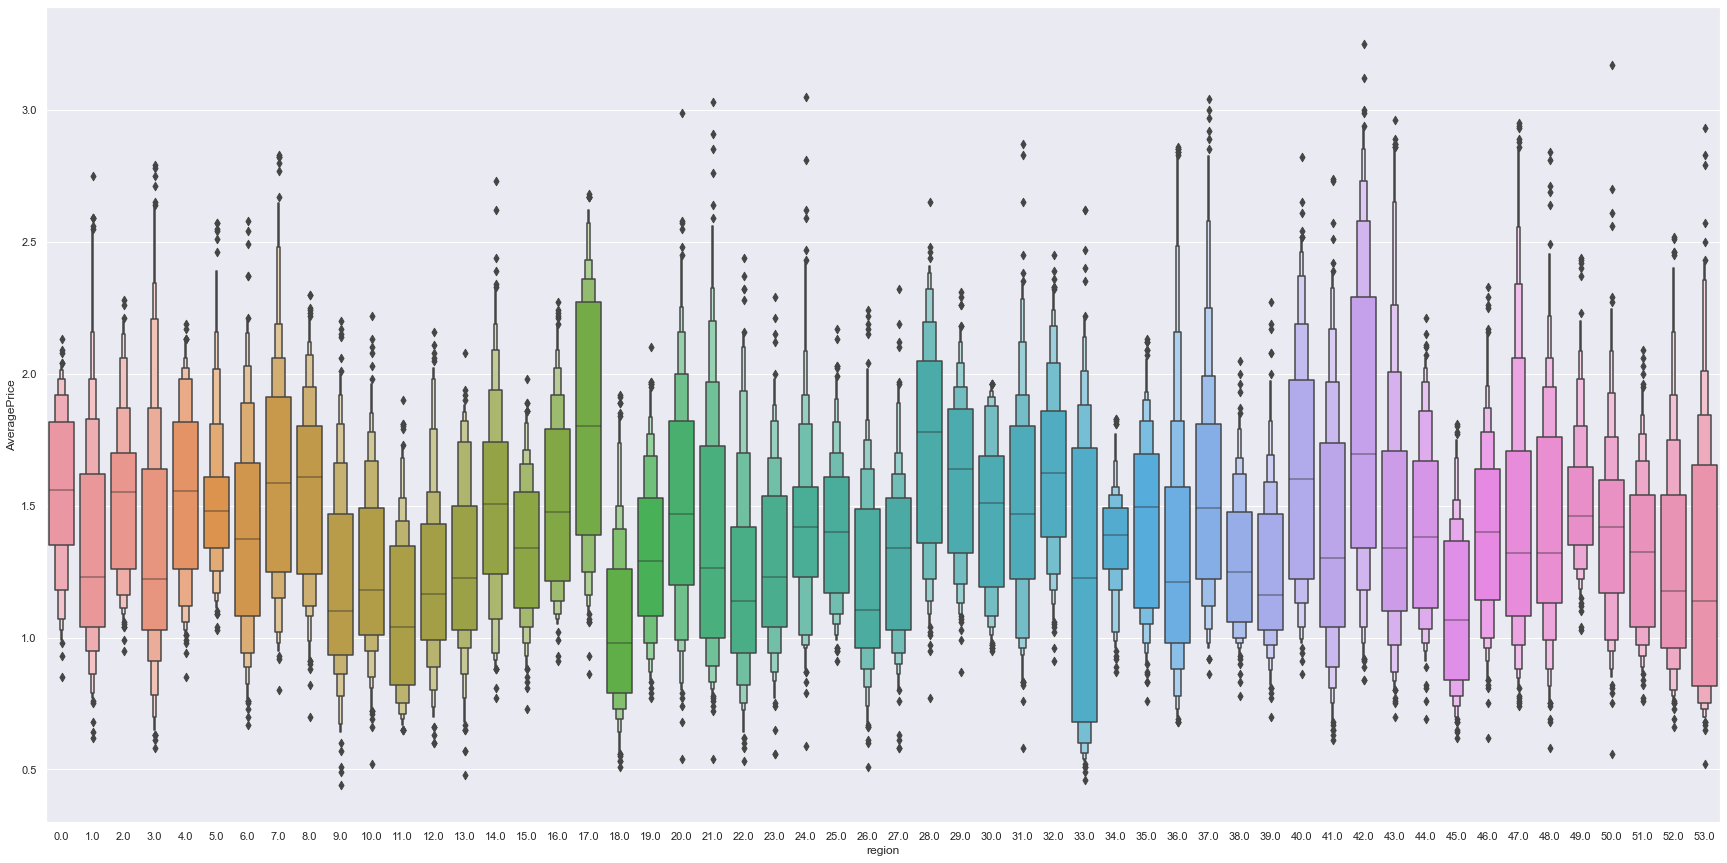

In [46]:
sns.set(rc={'figure.figsize':(30,15)})
sns.boxenplot(x = "region",y = "AveragePrice",data = data)

## We can see that at region 42, the average price is highest. 

<AxesSubplot:xlabel='region', ylabel='Date'>

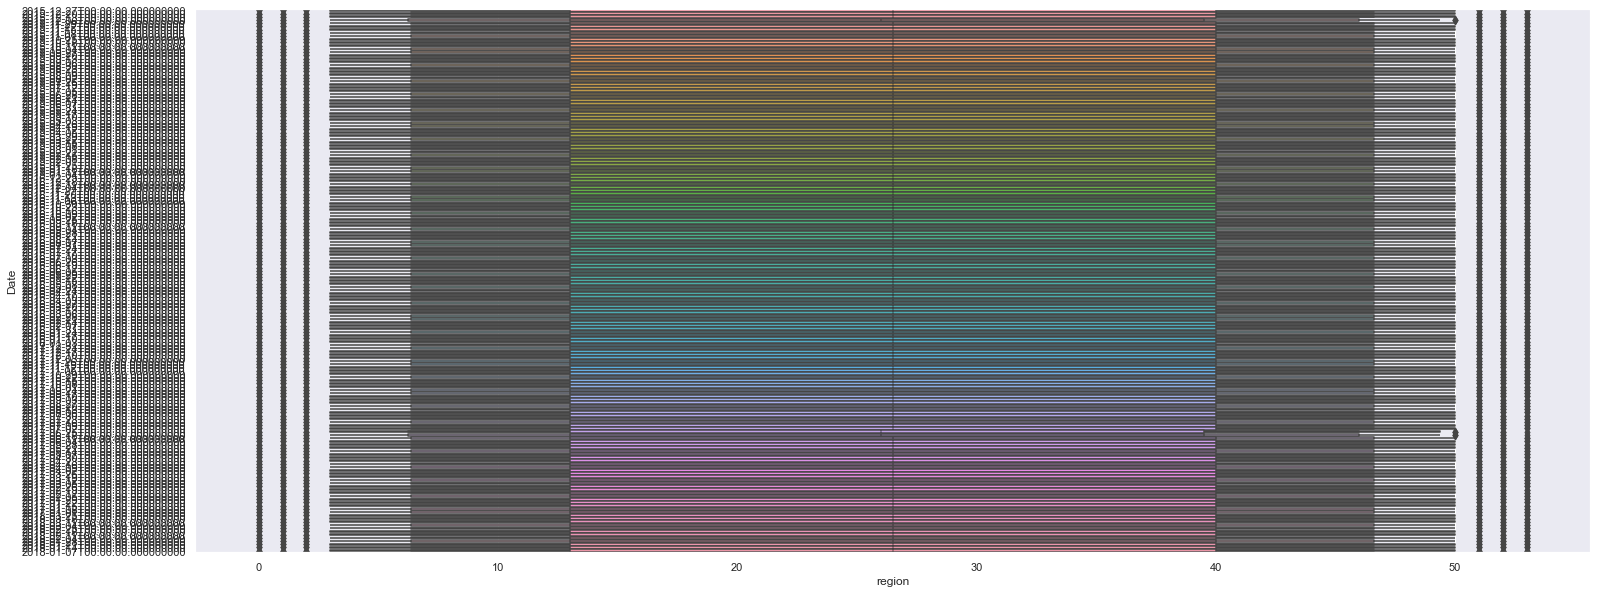

In [47]:
sns.set(rc={'figure.figsize':(25,10)})
sns.boxenplot(x = "region",y = "Date",data = data)

## Through the graph it is clear that every region is selling same amount of avocados. 

<AxesSubplot:xlabel='region', ylabel='Total Volume'>

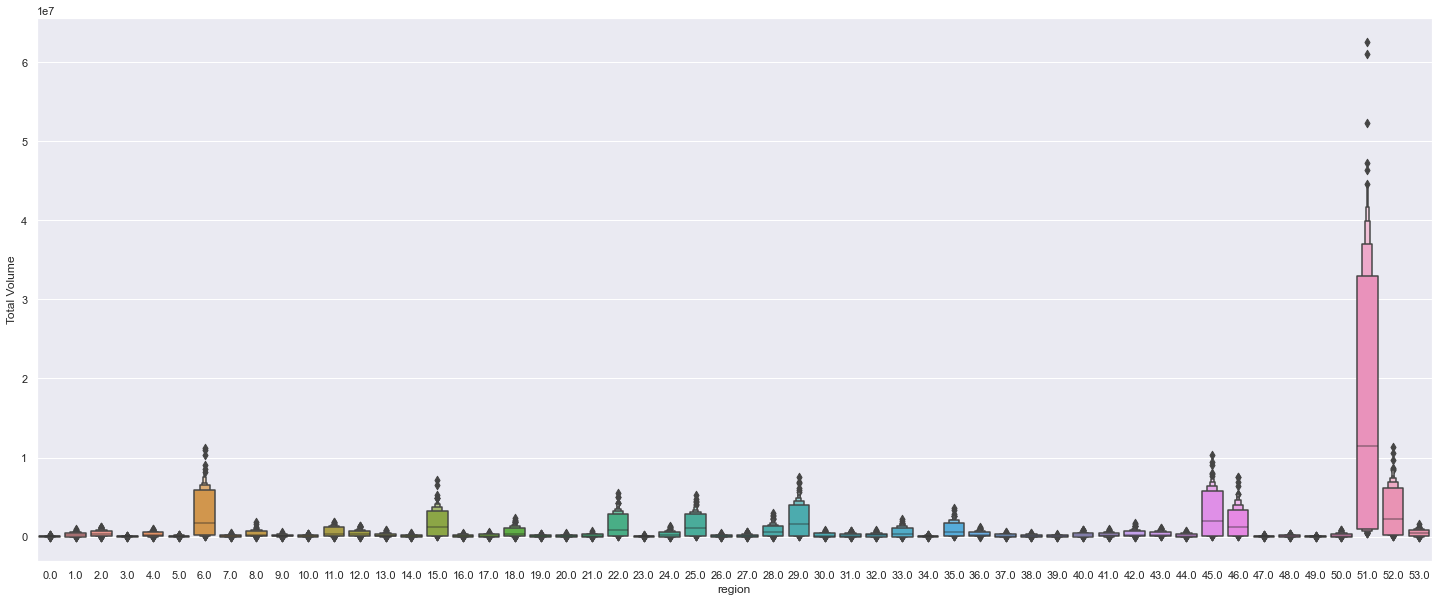

In [48]:
sns.set(rc={'figure.figsize':(25,10)})
sns.boxenplot(x = "region",y = "Total Volume",data = data)

## Total volume of Avocados is highest at region 51

<AxesSubplot:xlabel='region', ylabel='4046'>

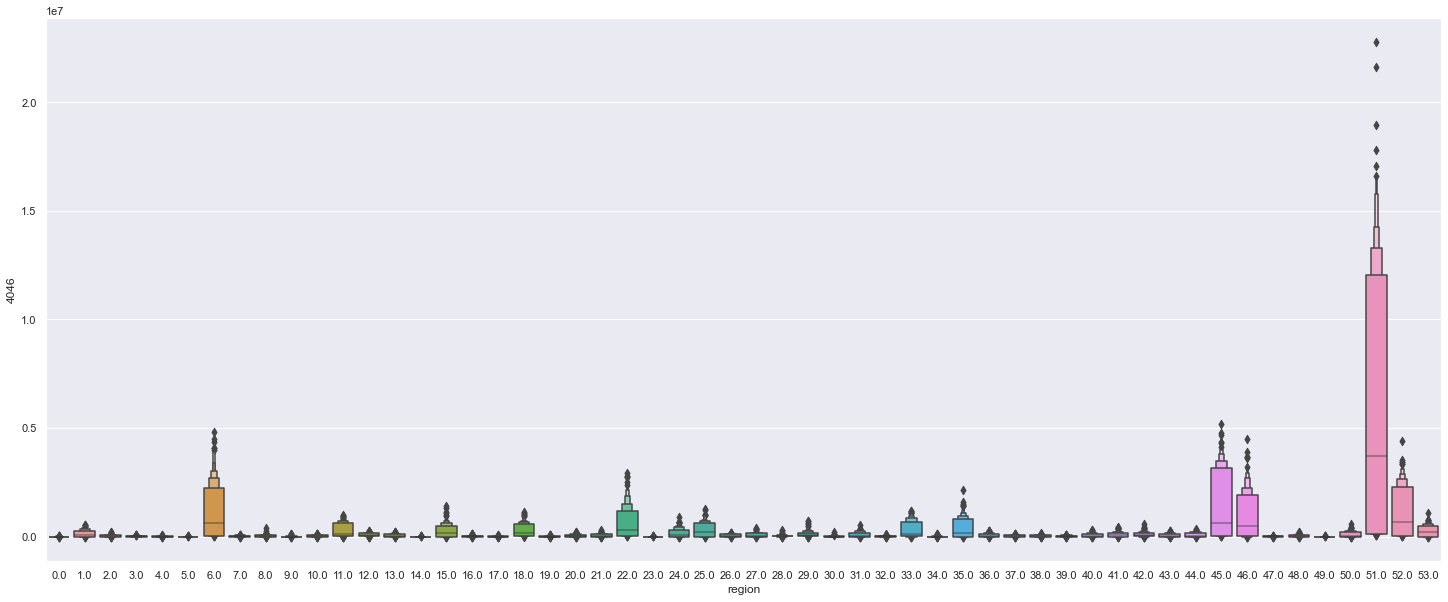

In [49]:
sns.set(rc={'figure.figsize':(25,10)})
sns.boxenplot(x = "region",y = "4046",data = data)

## PLU 4046 is highest at region 51.

<AxesSubplot:xlabel='region', ylabel='4225'>

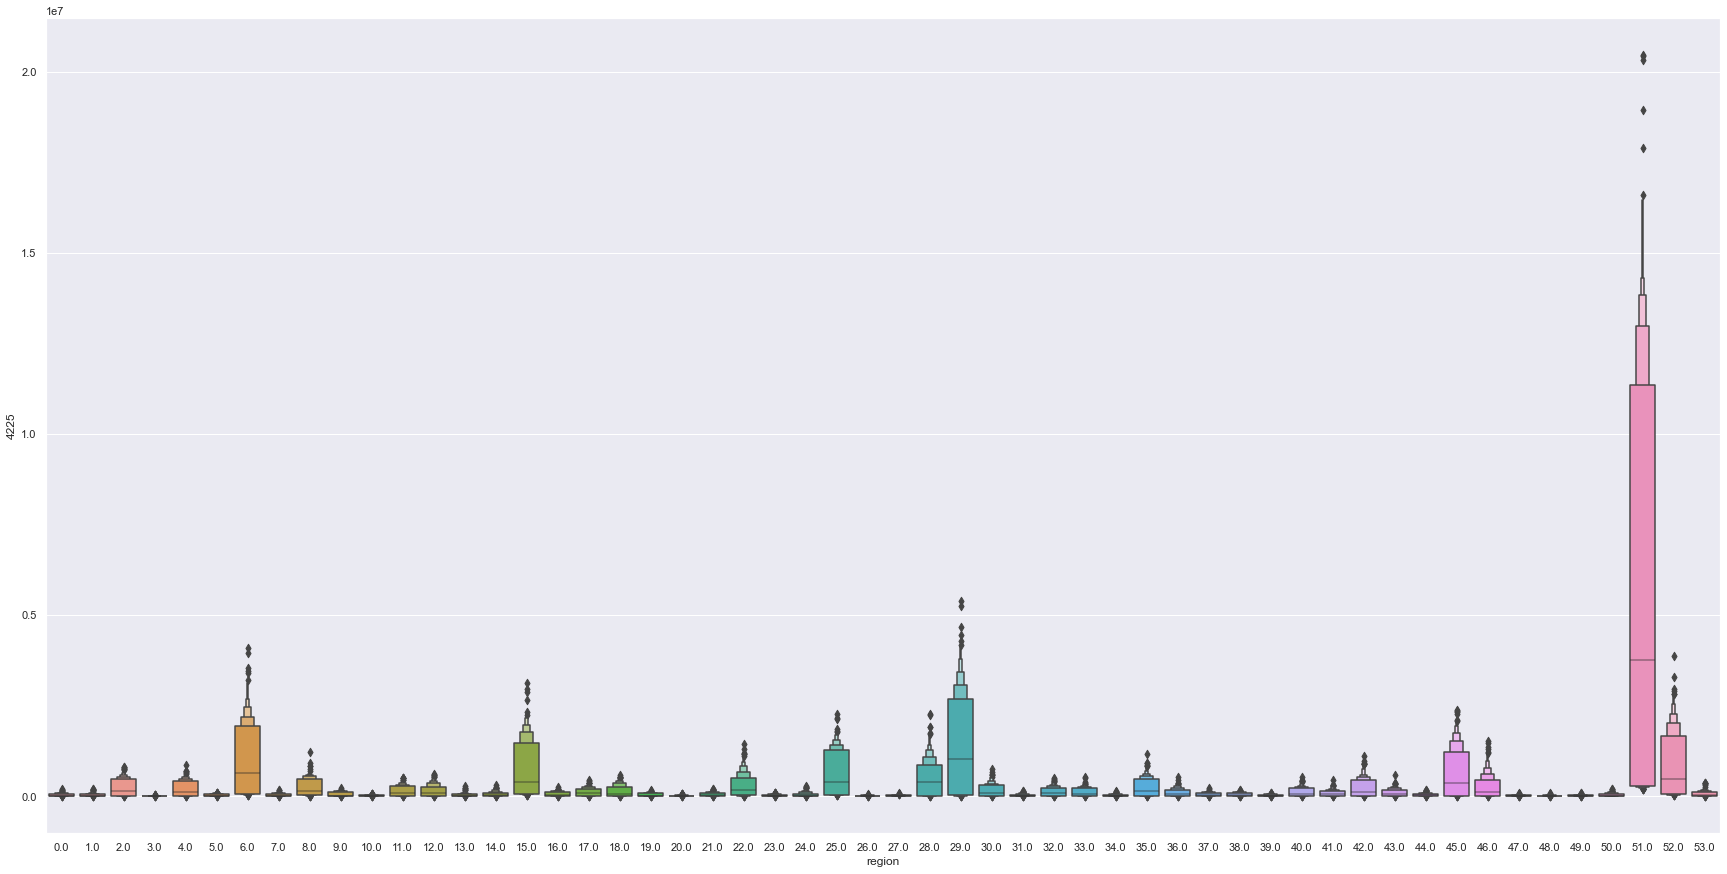

In [50]:
sns.set(rc={'figure.figsize':(30,15)})
sns.boxenplot(x = "region",y = "4225",data = data)

## PLU 4225 is highest at region 51.

<AxesSubplot:xlabel='region', ylabel='4770'>

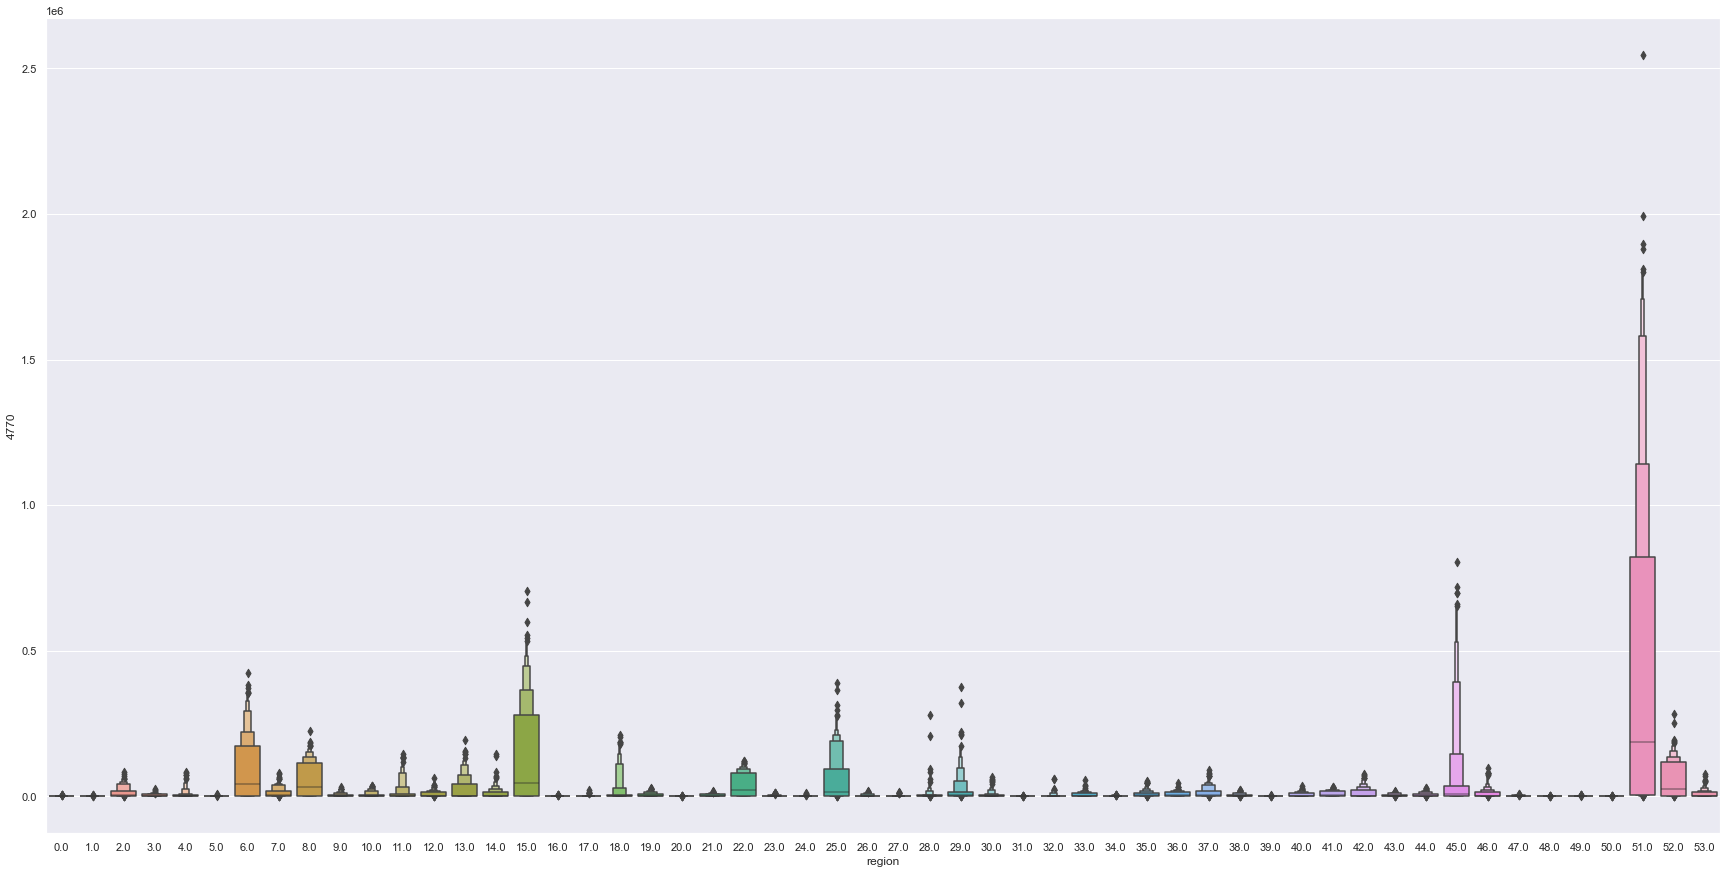

In [51]:
sns.set(rc={'figure.figsize':(30,15)})
sns.boxenplot(x = "region",y = "4770",data = data)

## PLU 4770 is highest at region 51.

<AxesSubplot:xlabel='region', ylabel='Total Bags'>

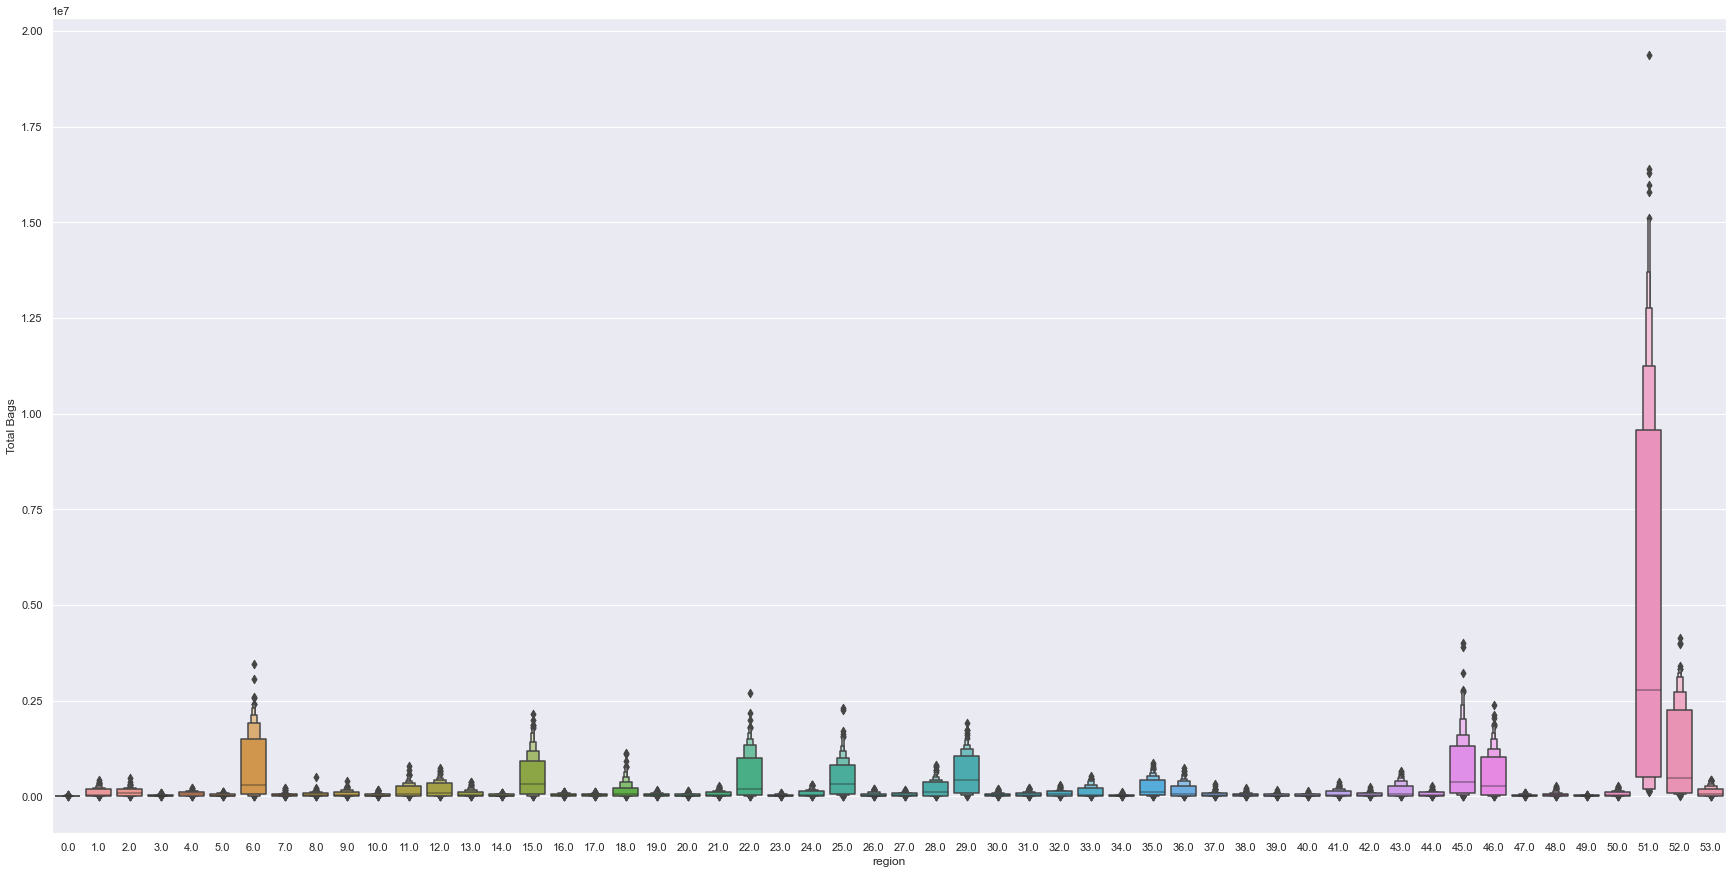

In [52]:
sns.set(rc={'figure.figsize':(30,15)})
sns.boxenplot(x = "region",y = "Total Bags",data = data)

## Total number of bags of Avocados is highest at region 51.

<AxesSubplot:xlabel='region', ylabel='Small Bags'>

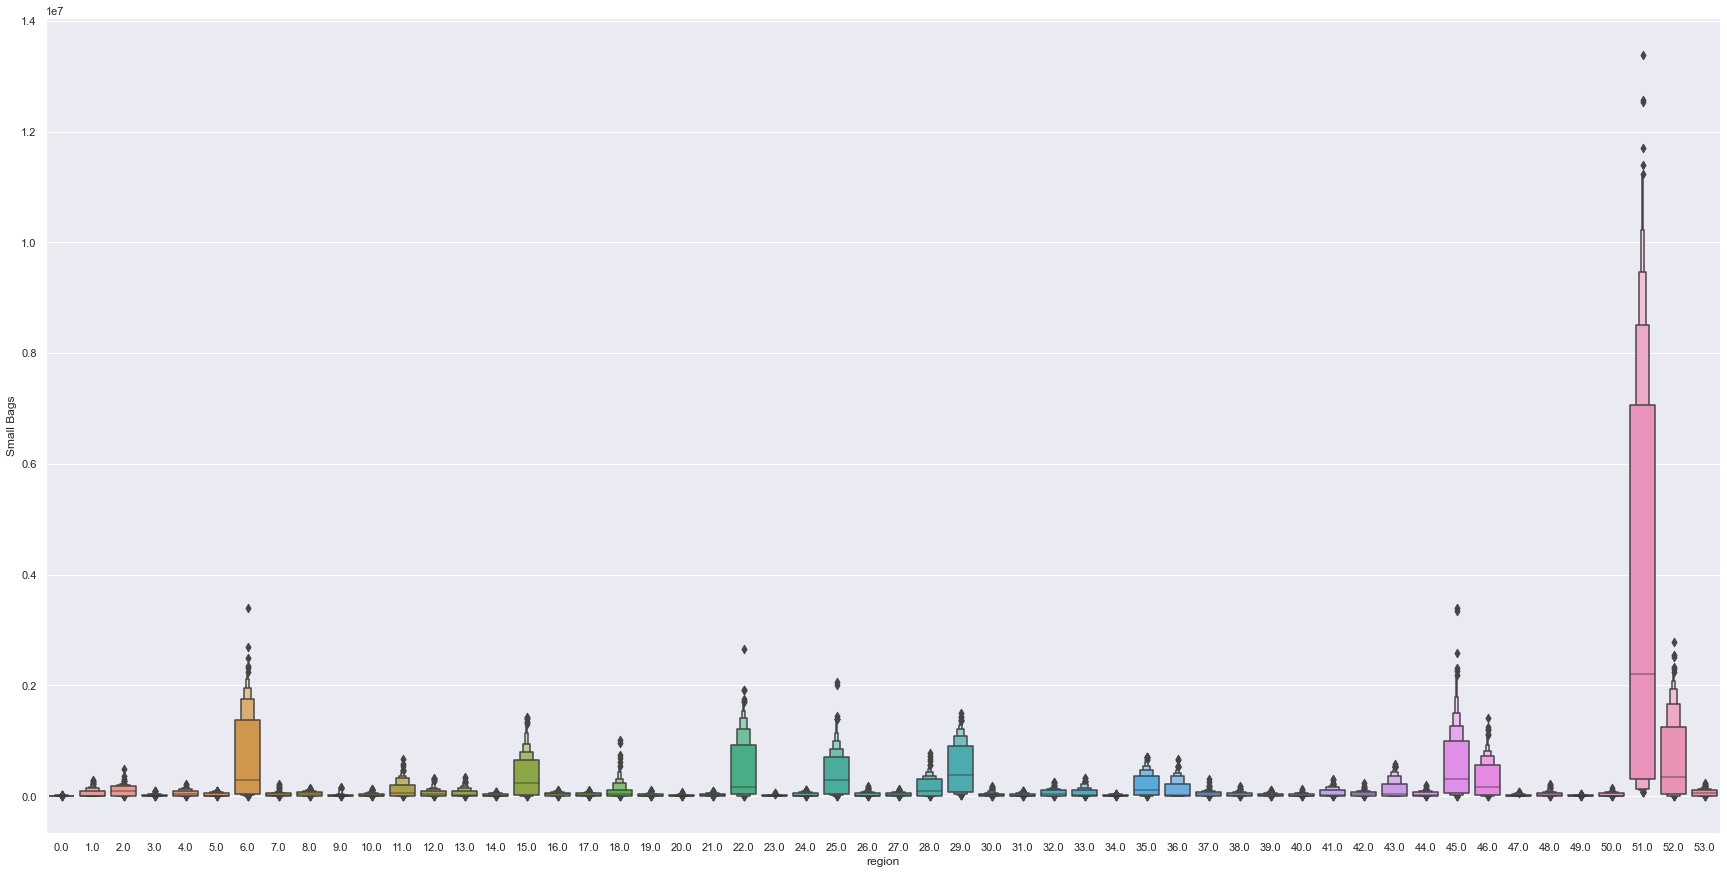

In [53]:
sns.set(rc={'figure.figsize':(30,15)})
sns.boxenplot(x = "region",y = "Small Bags",data = data)

## Total number small bags of Avocados is highest at region 51.

<AxesSubplot:xlabel='region', ylabel='Large Bags'>

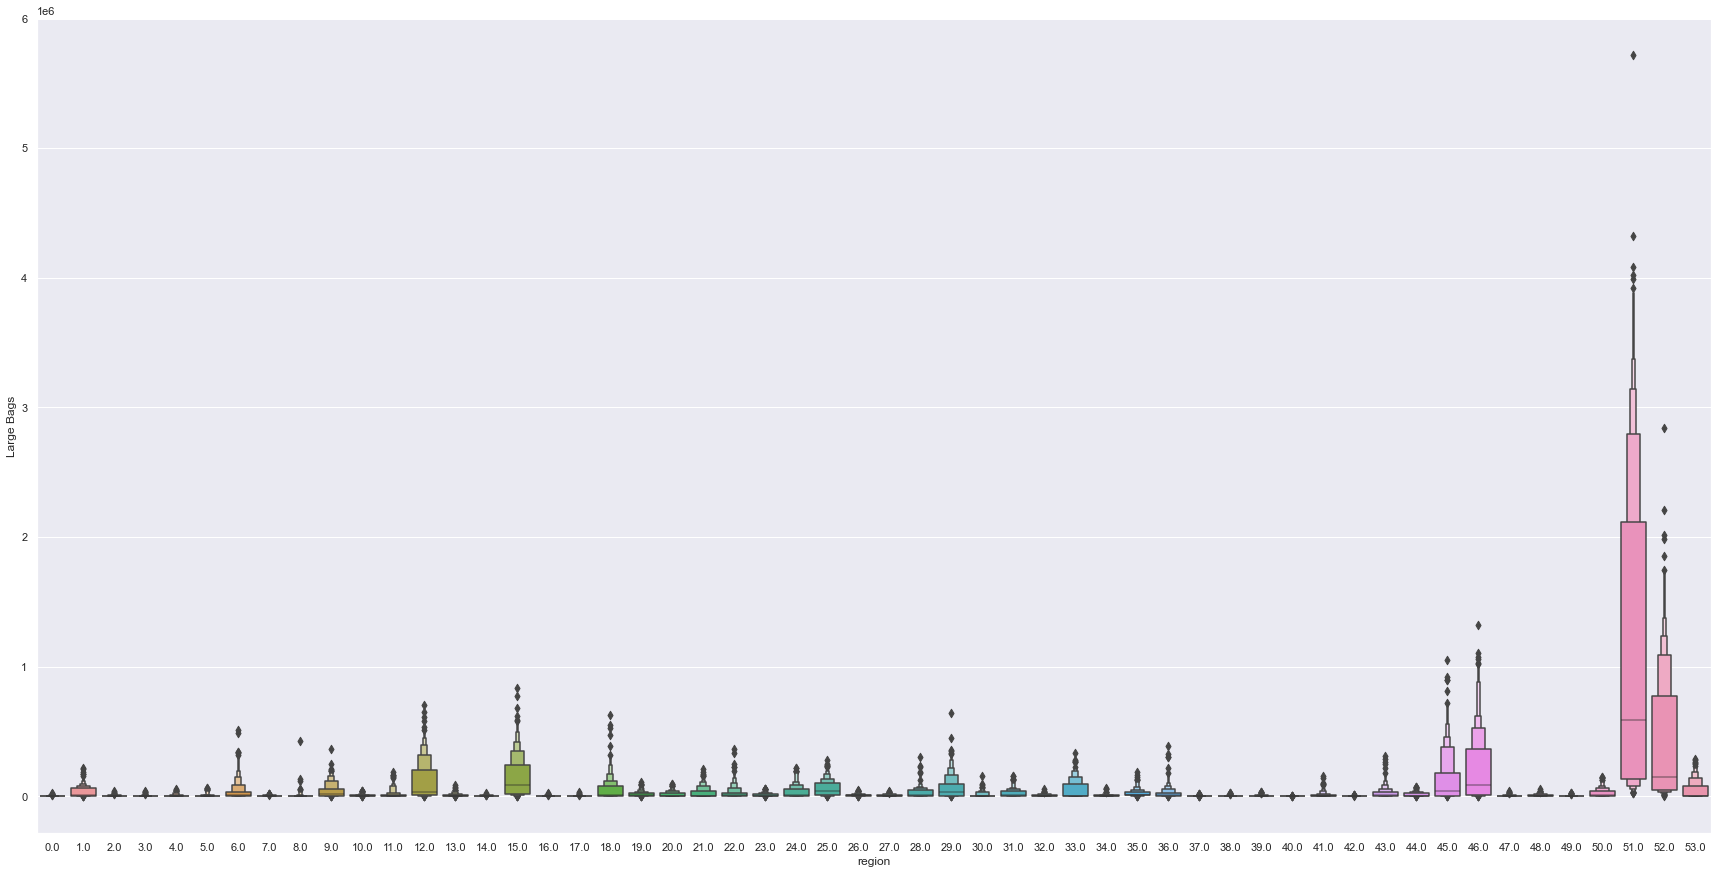

In [54]:
sns.set(rc={'figure.figsize':(30,15)})
sns.boxenplot(x = "region",y = "Large Bags",data = data)

## Total number large bags of Avocados is highest at region 51.

<AxesSubplot:xlabel='region', ylabel='XLarge Bags'>

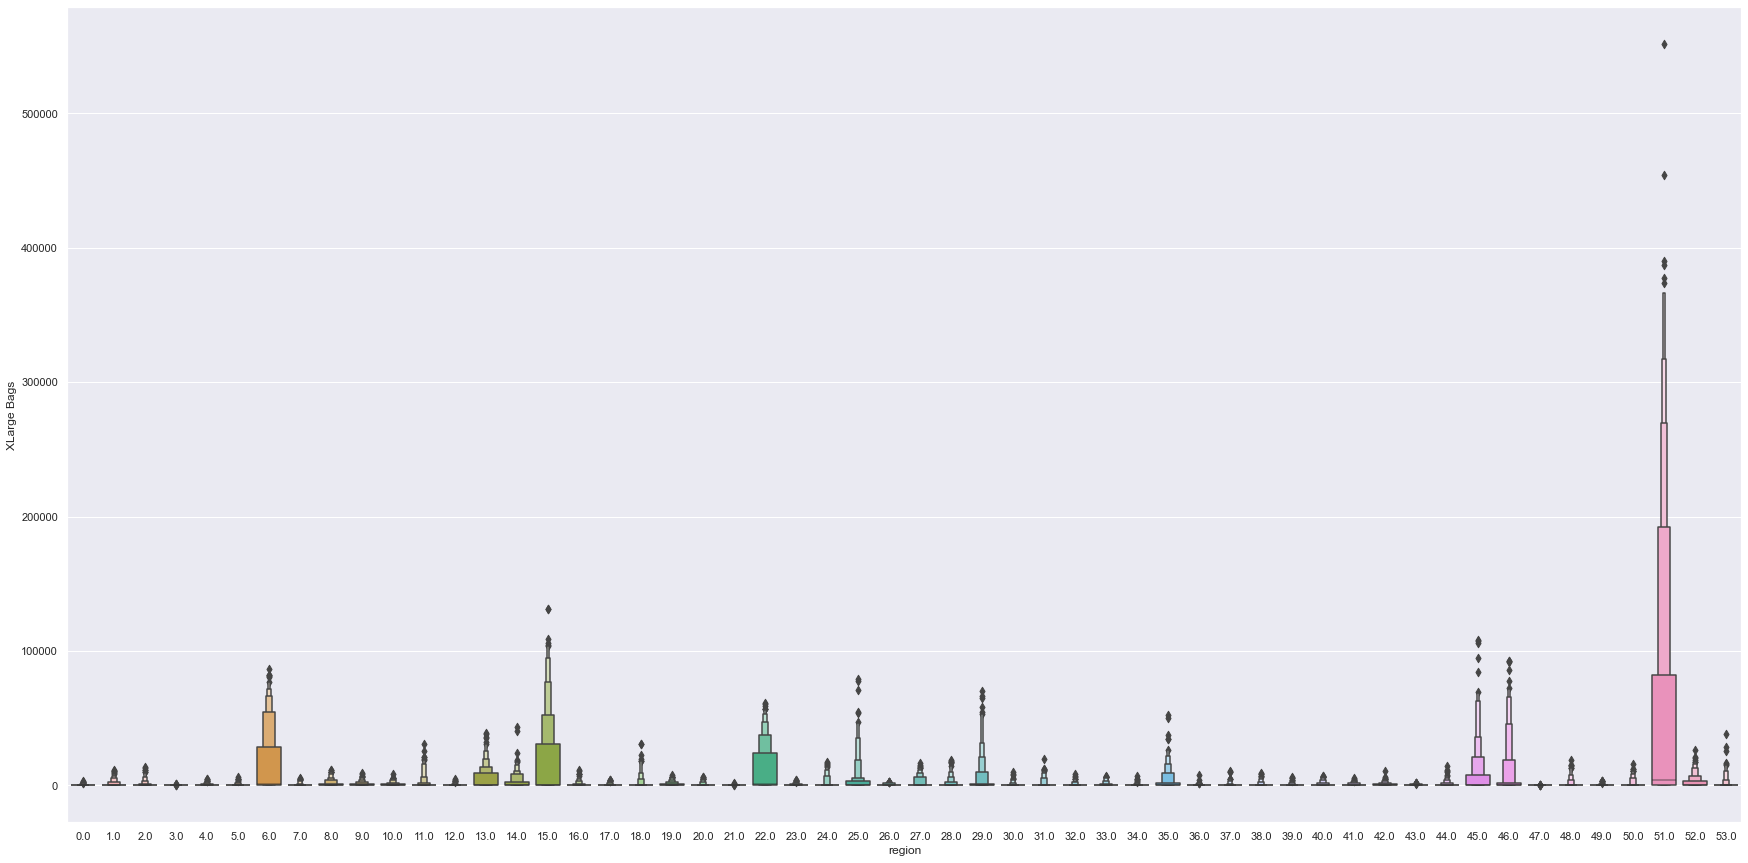

In [55]:
sns.set(rc={'figure.figsize':(30,15)})
sns.boxenplot(x = "region",y = "XLarge Bags",data = data)

## Total number XLarge bags of Avocados is highest at region 51.

# Plotting boxenplot, scatterplot, countplot for region vs type for better understanding. 

<AxesSubplot:xlabel='region', ylabel='type'>

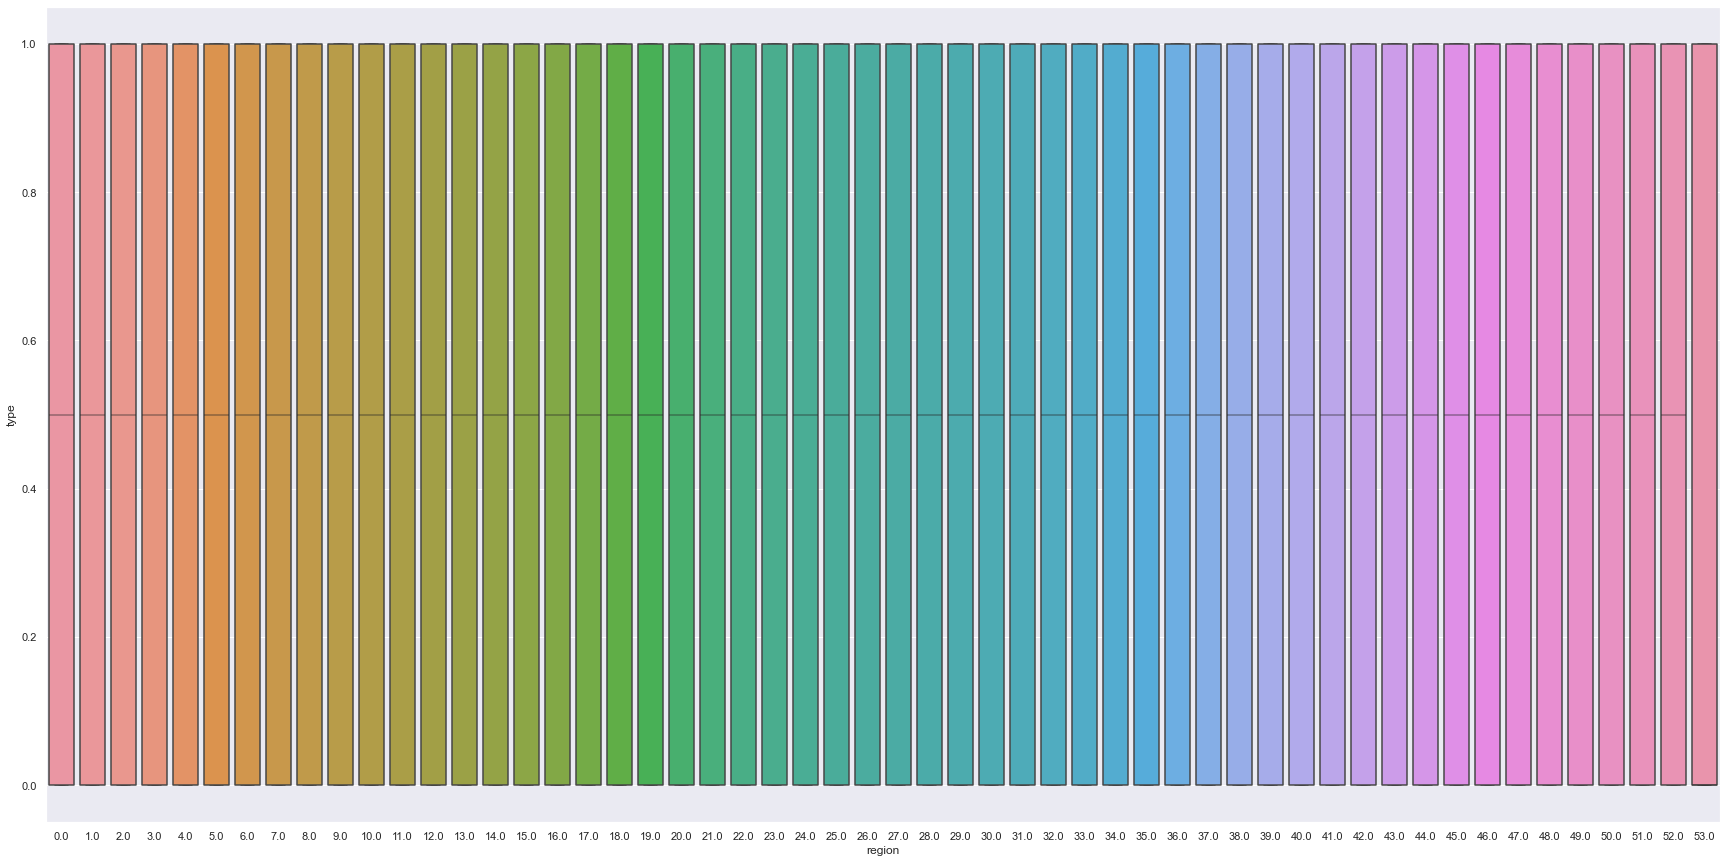

In [56]:
sns.set(rc={'figure.figsize':(30,15)})
sns.boxenplot(x = "region",y = "type",data = data)

<AxesSubplot:xlabel='region', ylabel='type'>

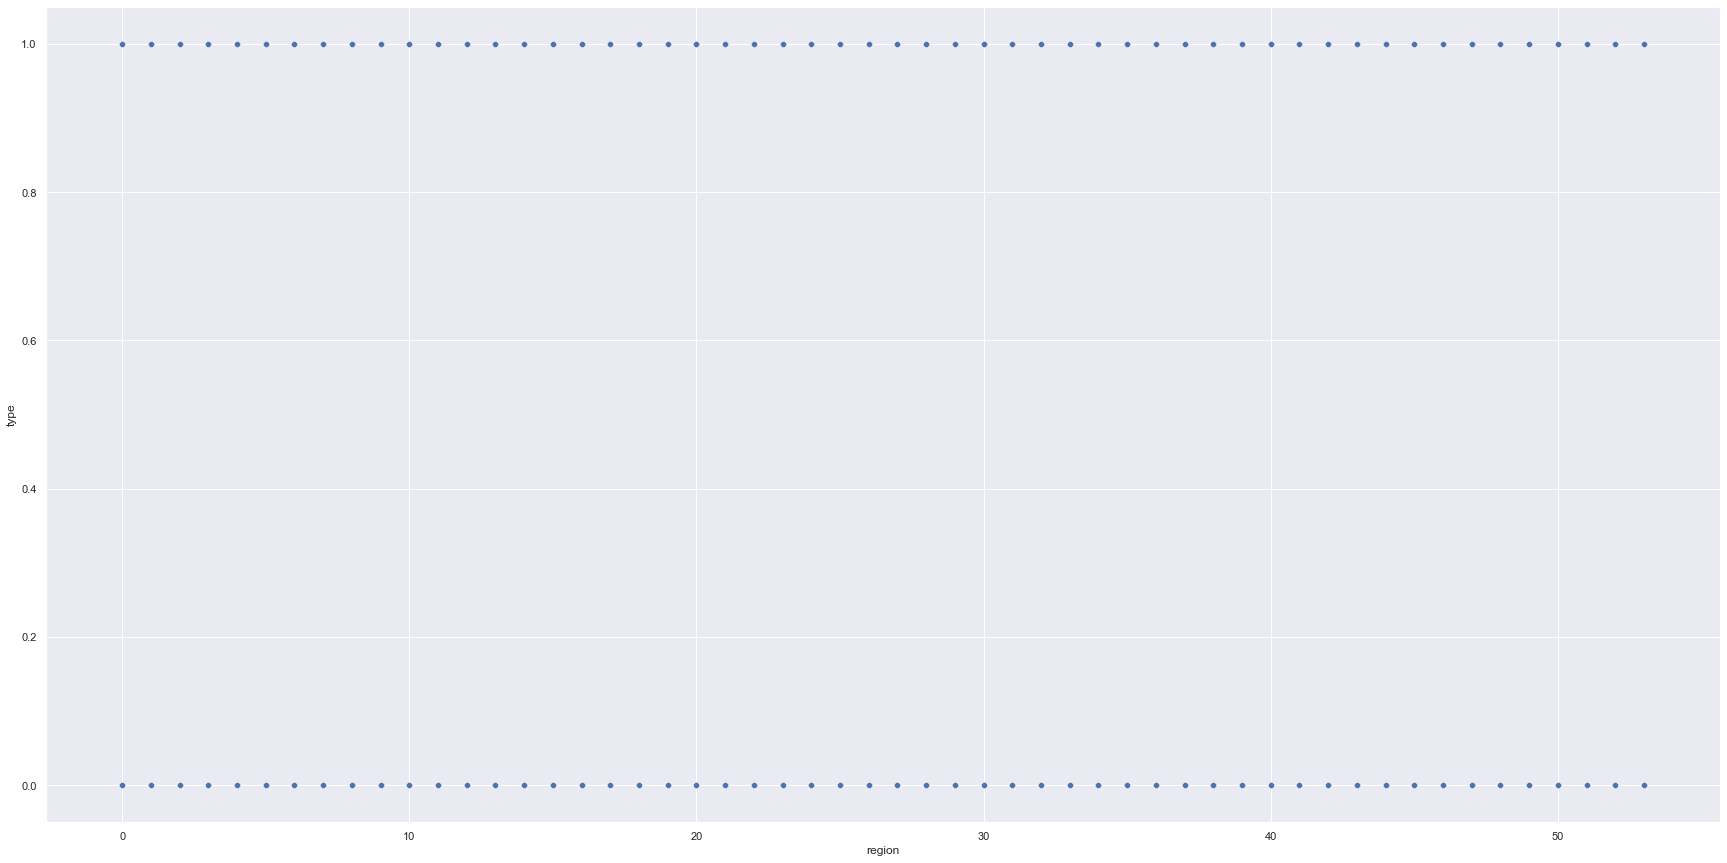

In [57]:
sns.set(rc={'figure.figsize':(30,15)})
sns.scatterplot(x = "region",y = "type",data = data)

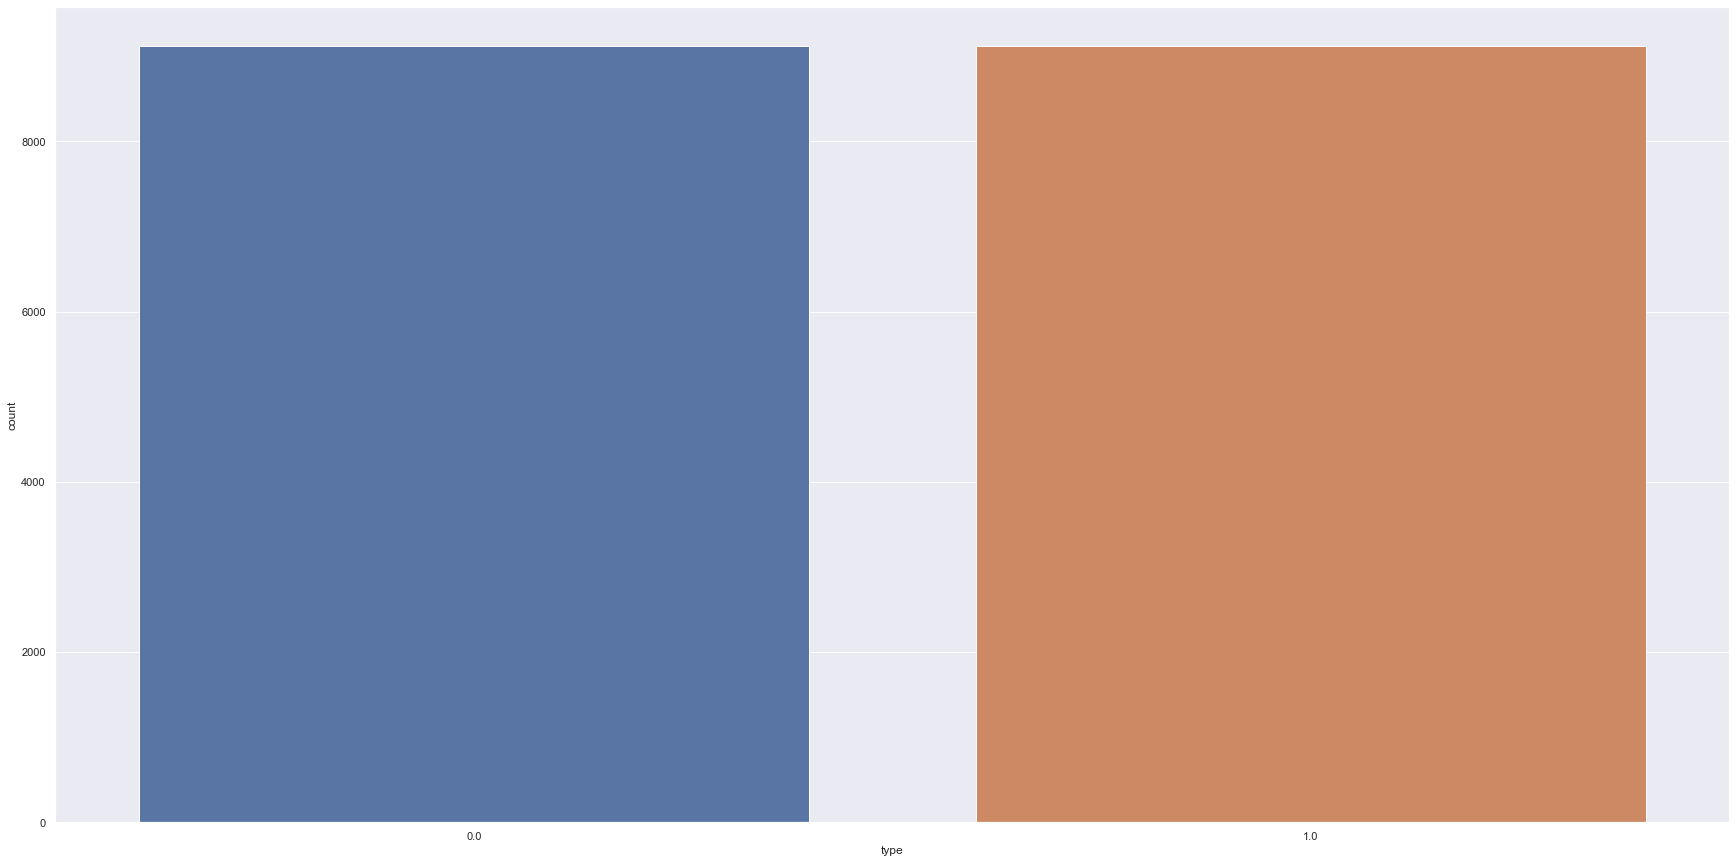

0.0    9126
1.0    9123
Name: type, dtype: int64

In [58]:
sns.countplot(x='type', data =data)
plt.show()
data["type"].value_counts()

## Through the above 3 graphs of region vs type, it is clear that both conventional and organic avocados are sold equally. 

# Plotting boxenplot and countplot for region vs year for better understanding. 

<AxesSubplot:xlabel='region', ylabel='year'>

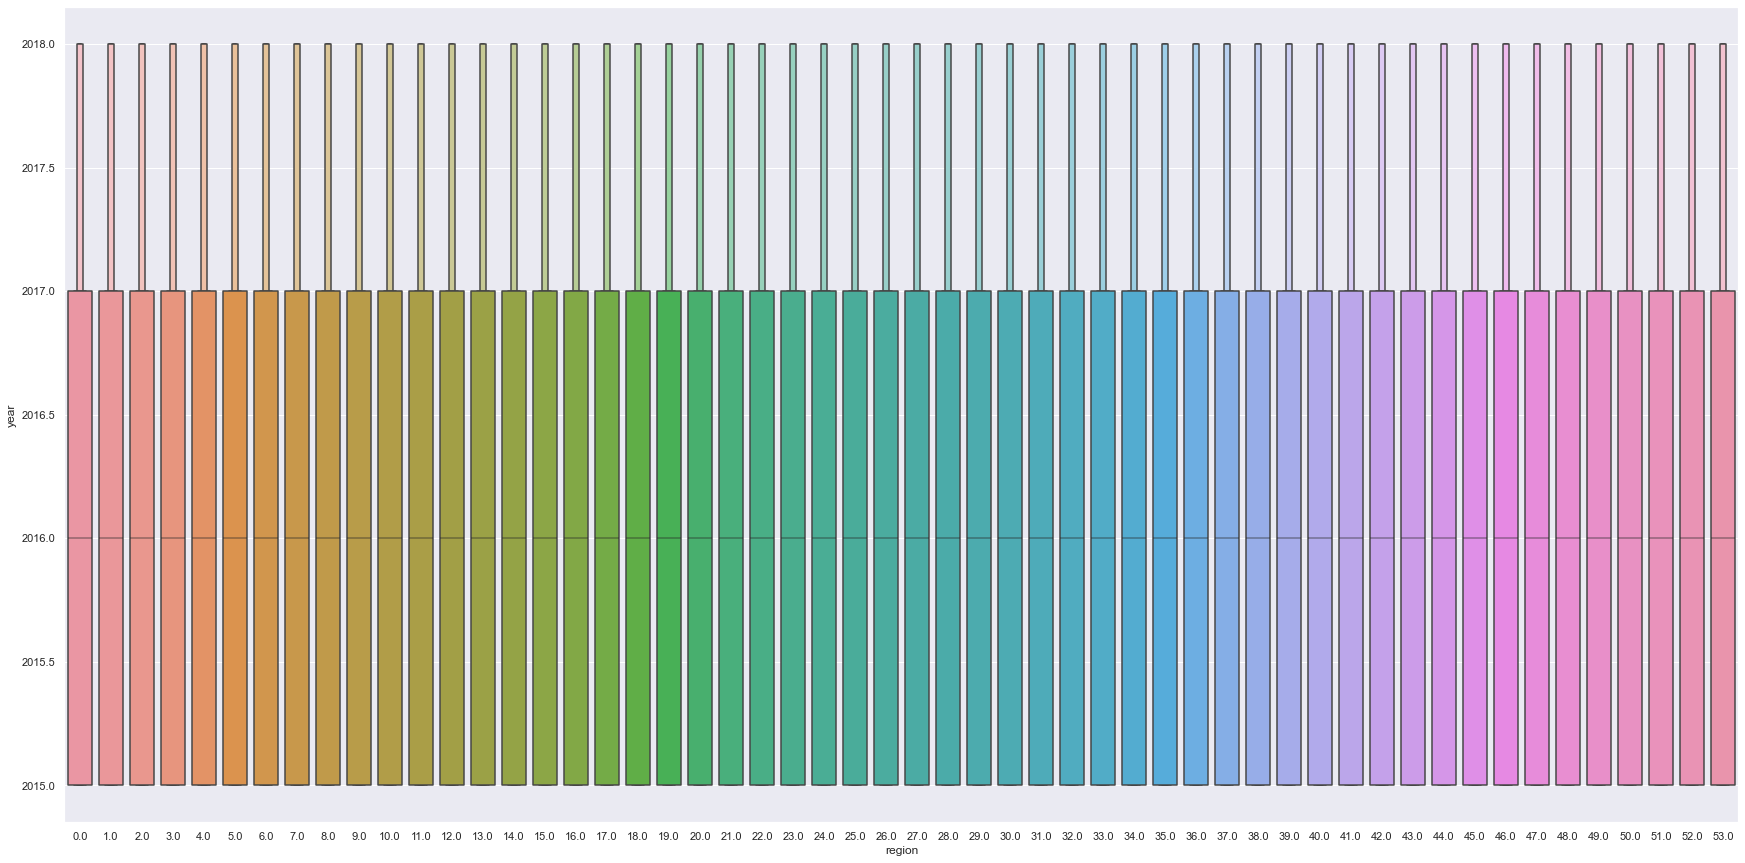

In [59]:
sns.set(rc={'figure.figsize':(30,15)})
sns.boxenplot(x = "region",y = "year",data = data)

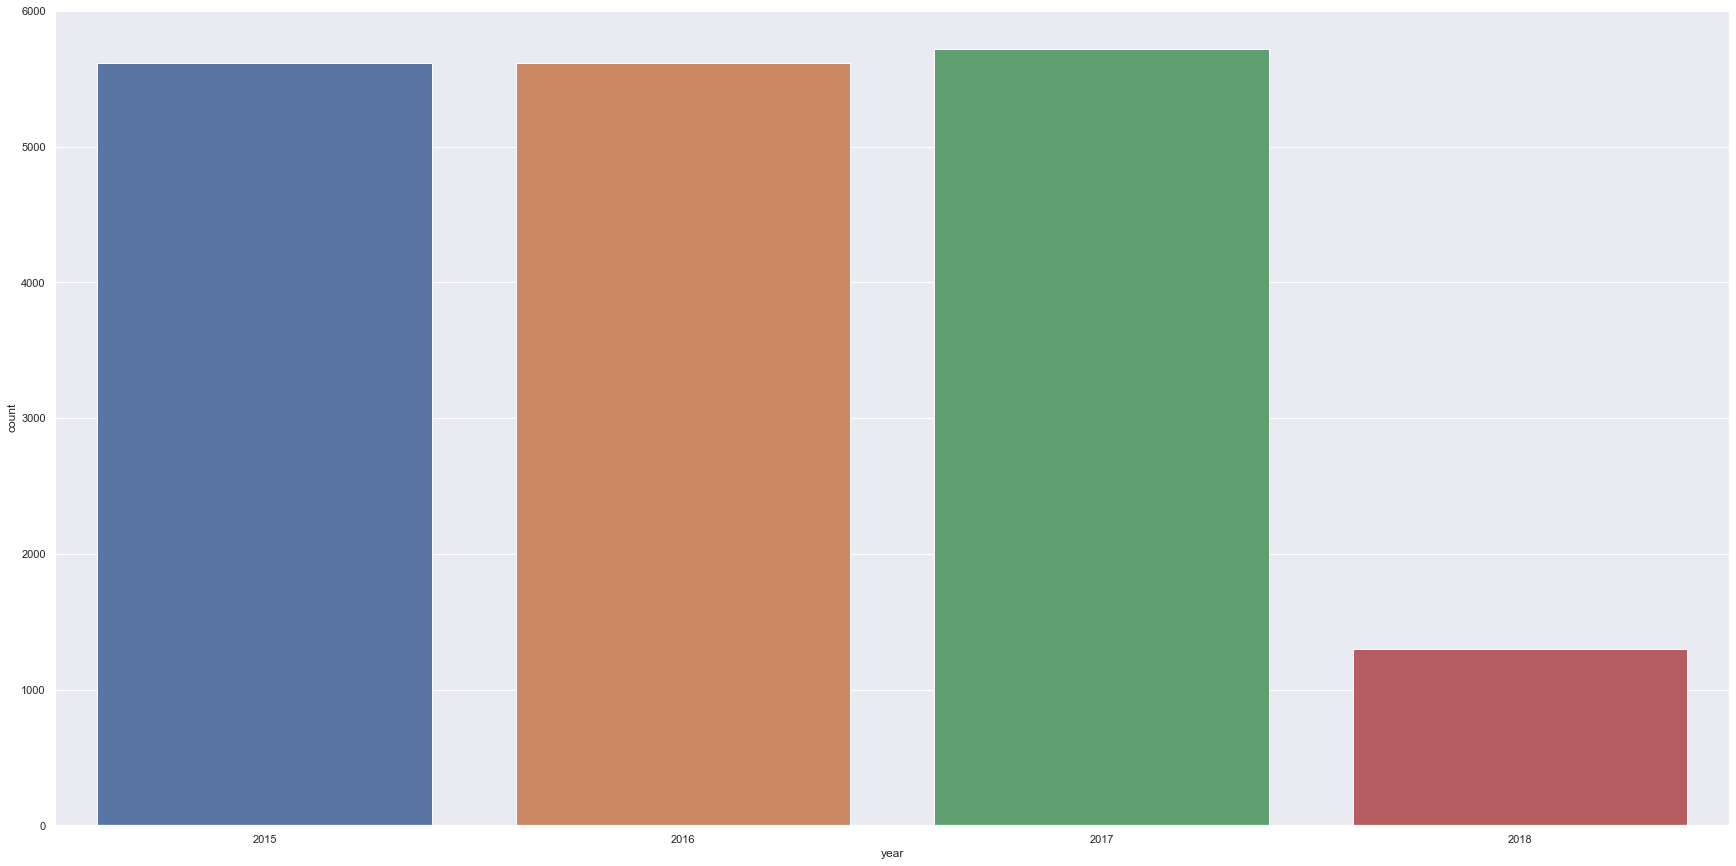

2017    5722
2016    5616
2015    5615
2018    1296
Name: year, dtype: int64

In [60]:
sns.countplot(x='year', data =data)
plt.show()
data["year"].value_counts()

## Through the above 2 graphs of region vs year, it is clear that in 2017 5772 avocados were sold. IOn 2016 5616 avocados were sold.In 2015 5615 Avocados were sold. In 2018 1296 Avocados were sold.

# Bivariate for Regression

In [61]:
data.columns

Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region'],
      dtype='object')

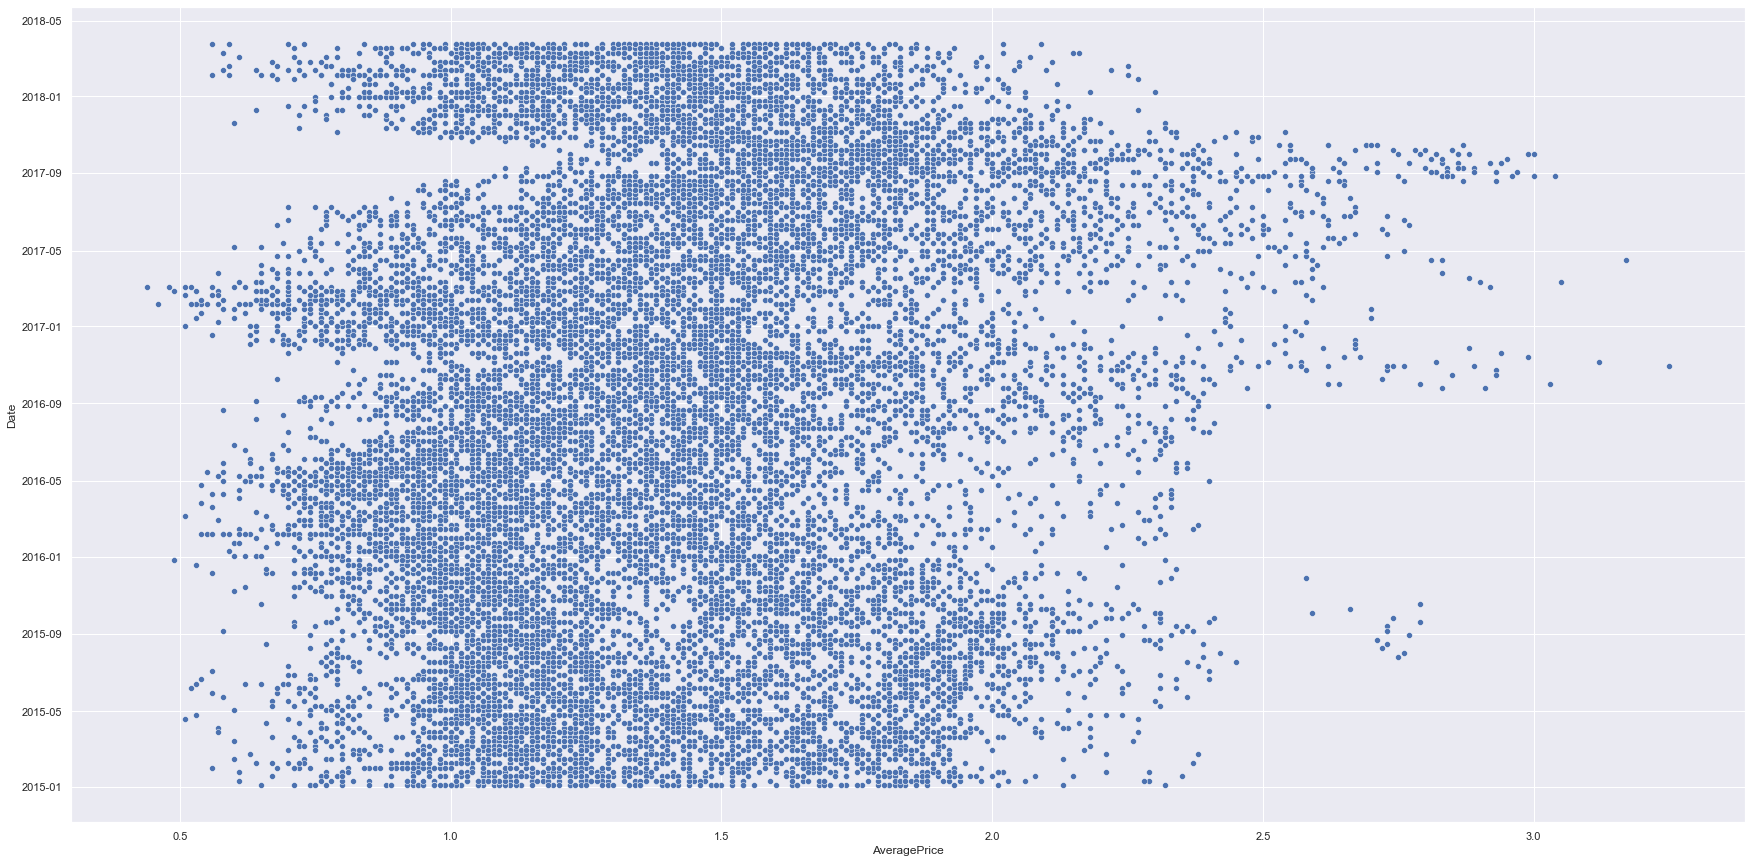

In [62]:
sns.scatterplot("AveragePrice","Date" , data = data)
plt.show()

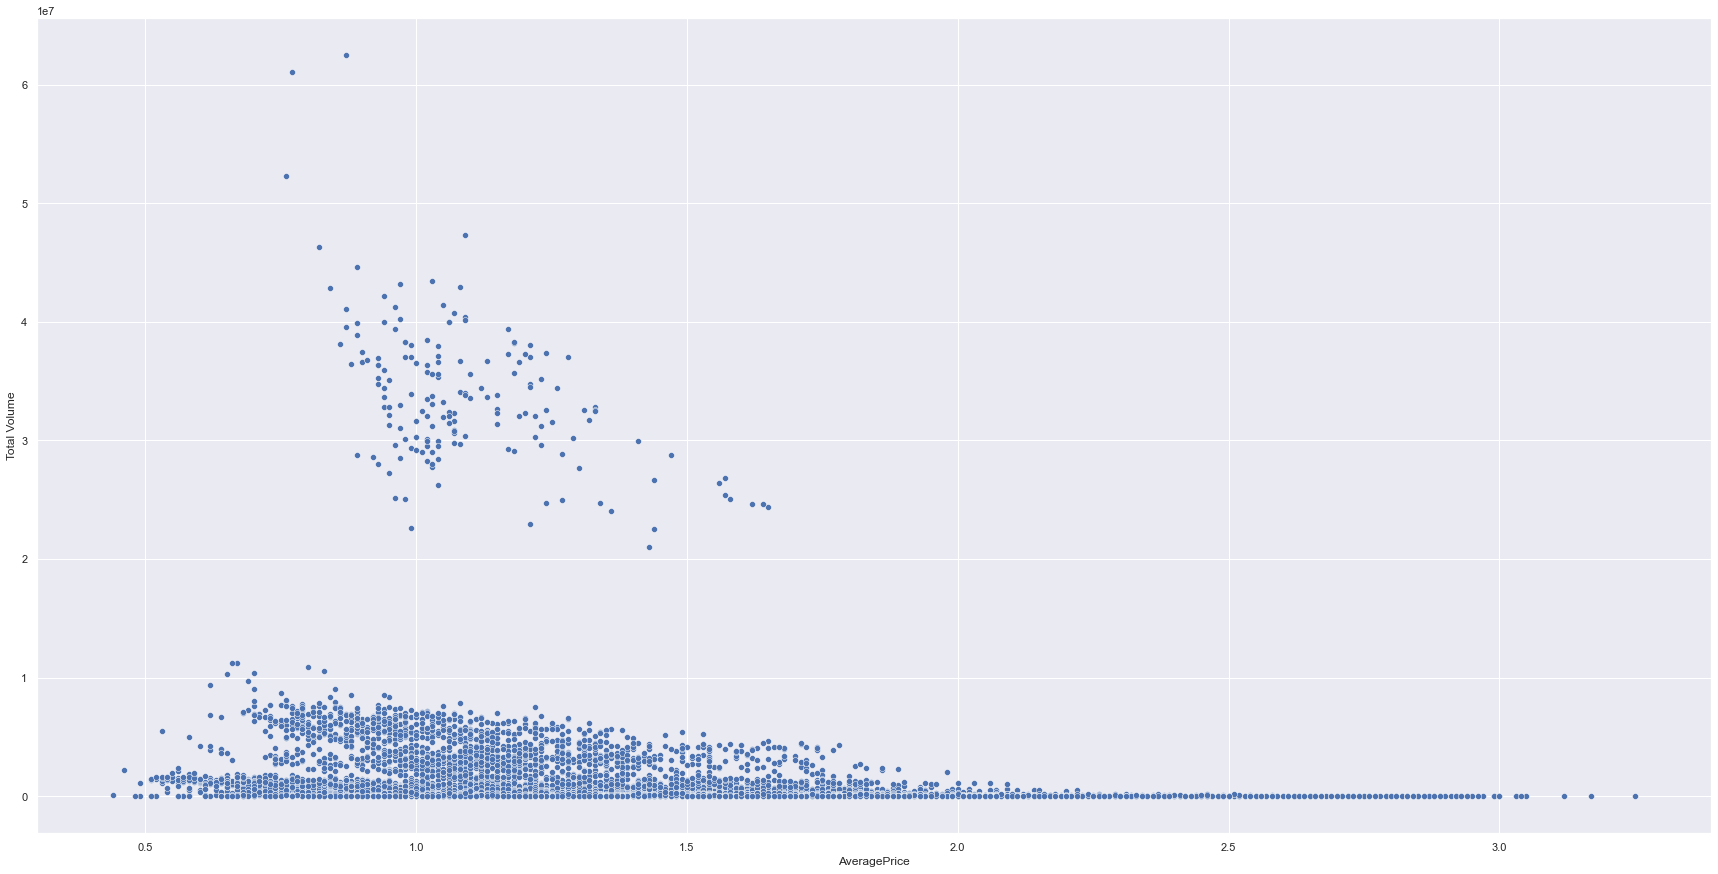

In [63]:
sns.scatterplot("AveragePrice","Total Volume" , data = data)
plt.show()

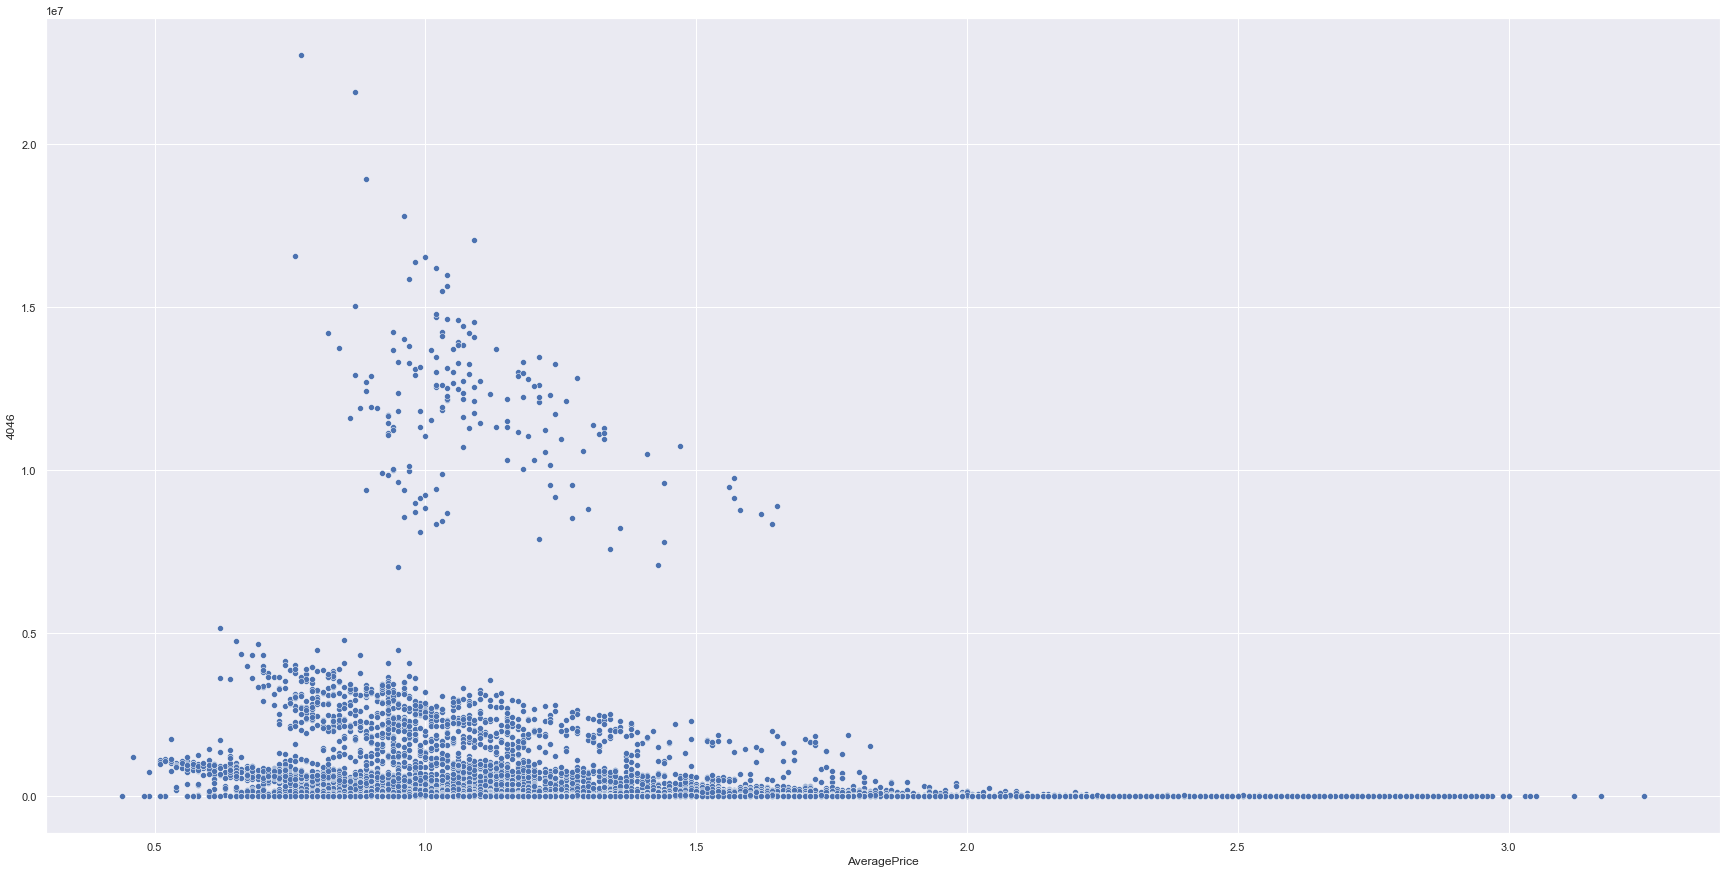

In [64]:
sns.scatterplot("AveragePrice","4046" , data = data)
plt.show()

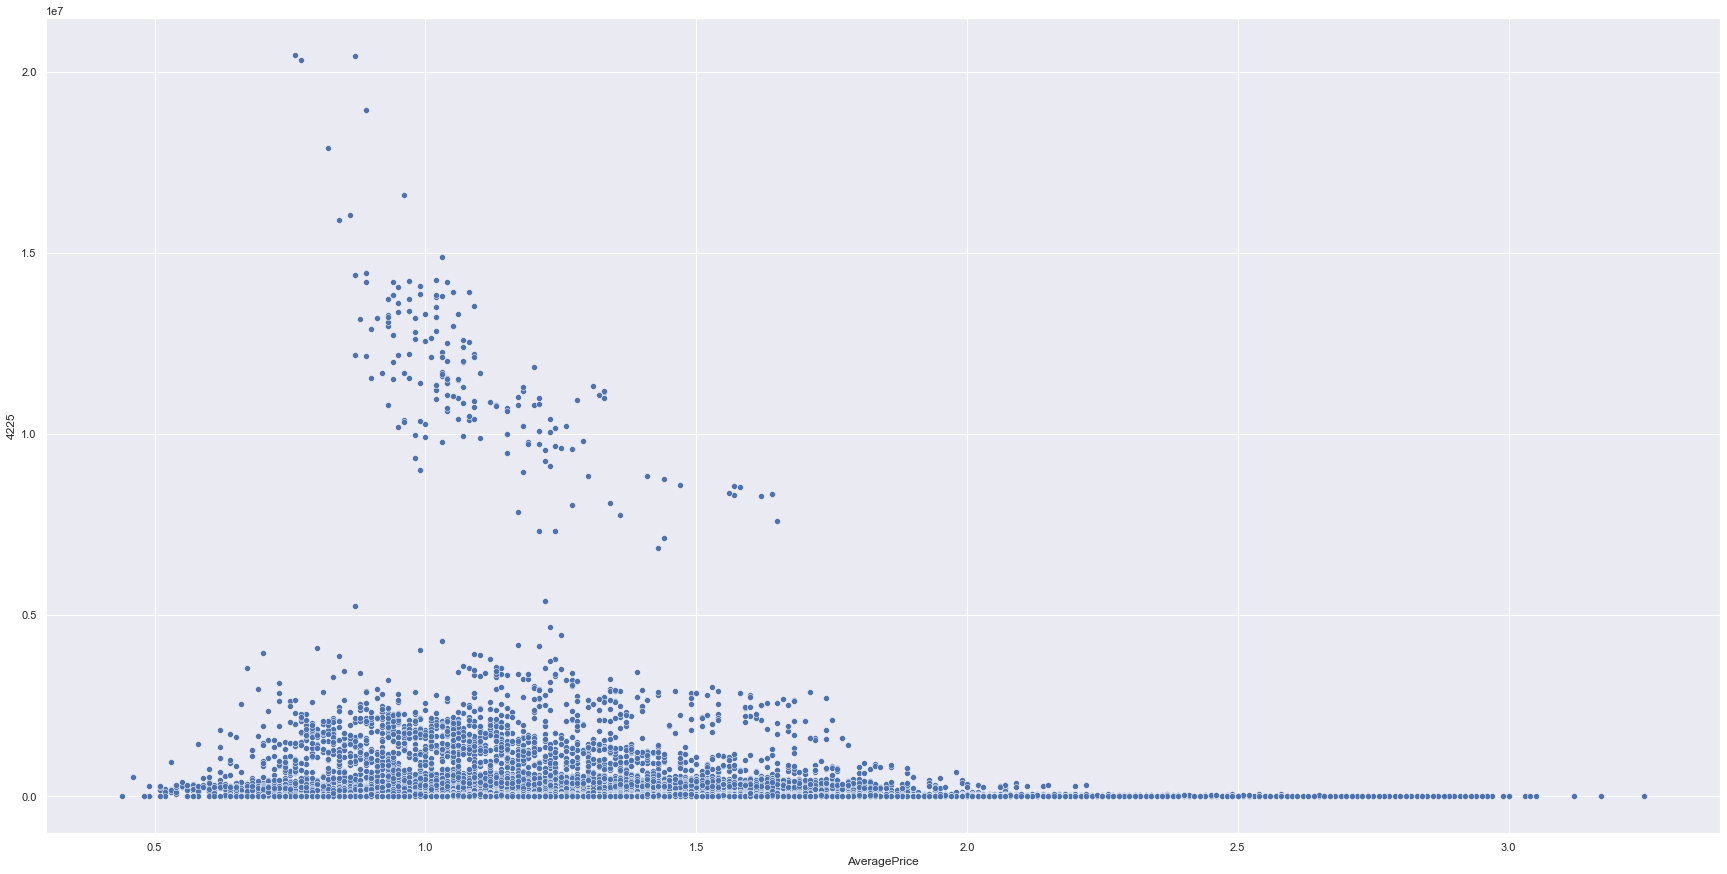

In [65]:
sns.scatterplot("AveragePrice","4225" , data = data)
plt.show()

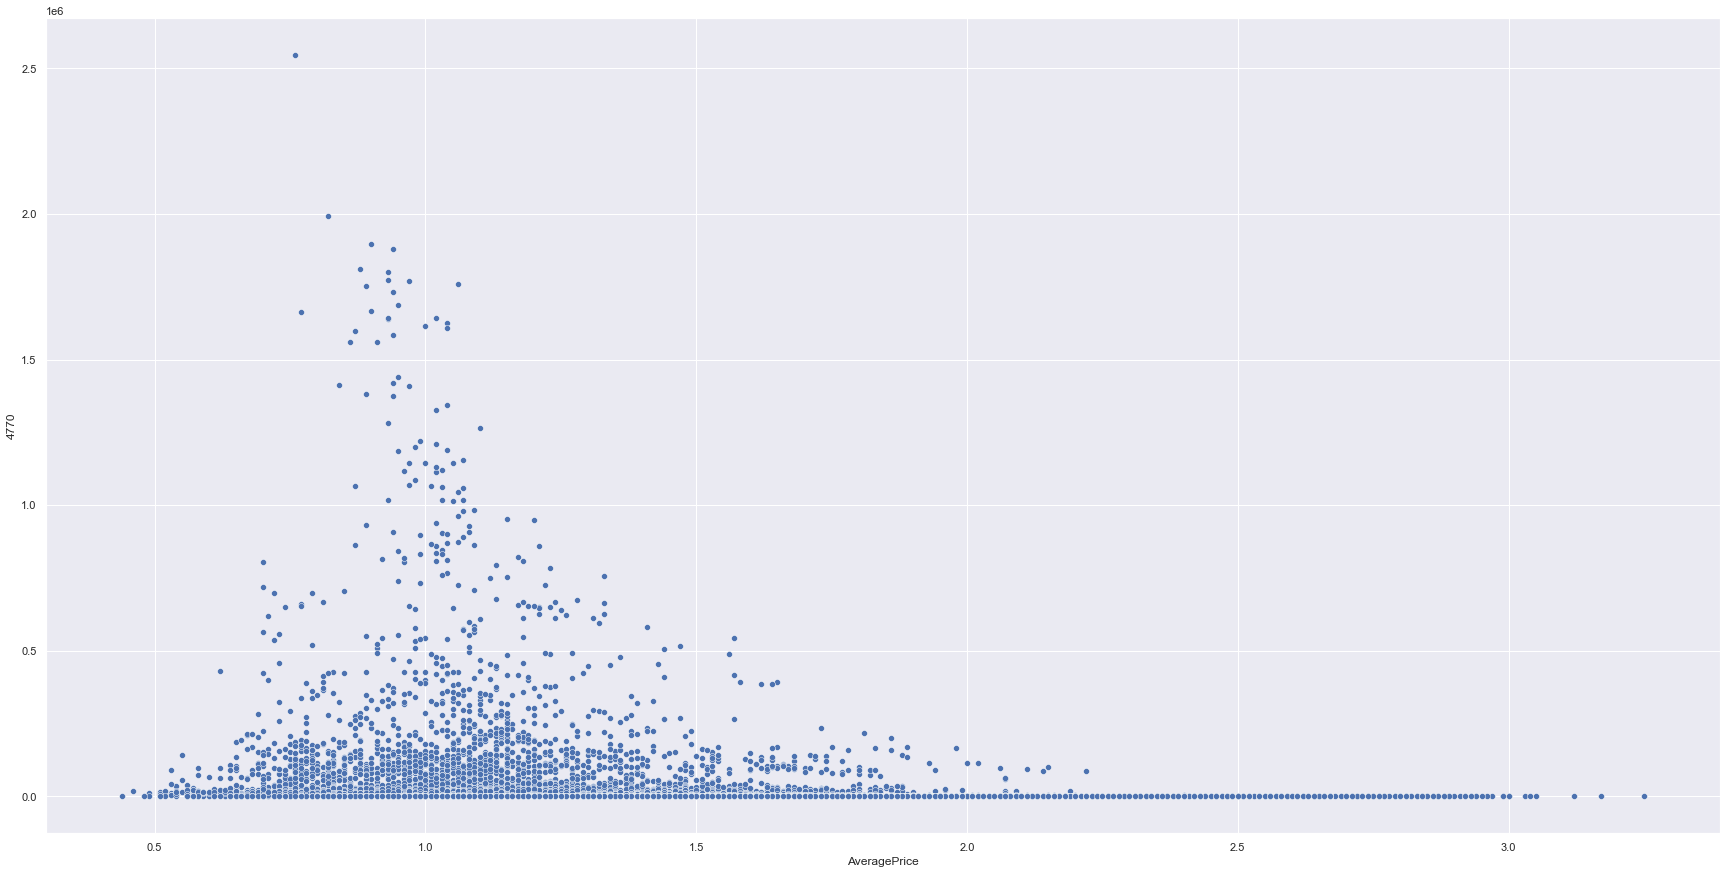

In [66]:
sns.scatterplot("AveragePrice","4770" , data = data)
plt.show()

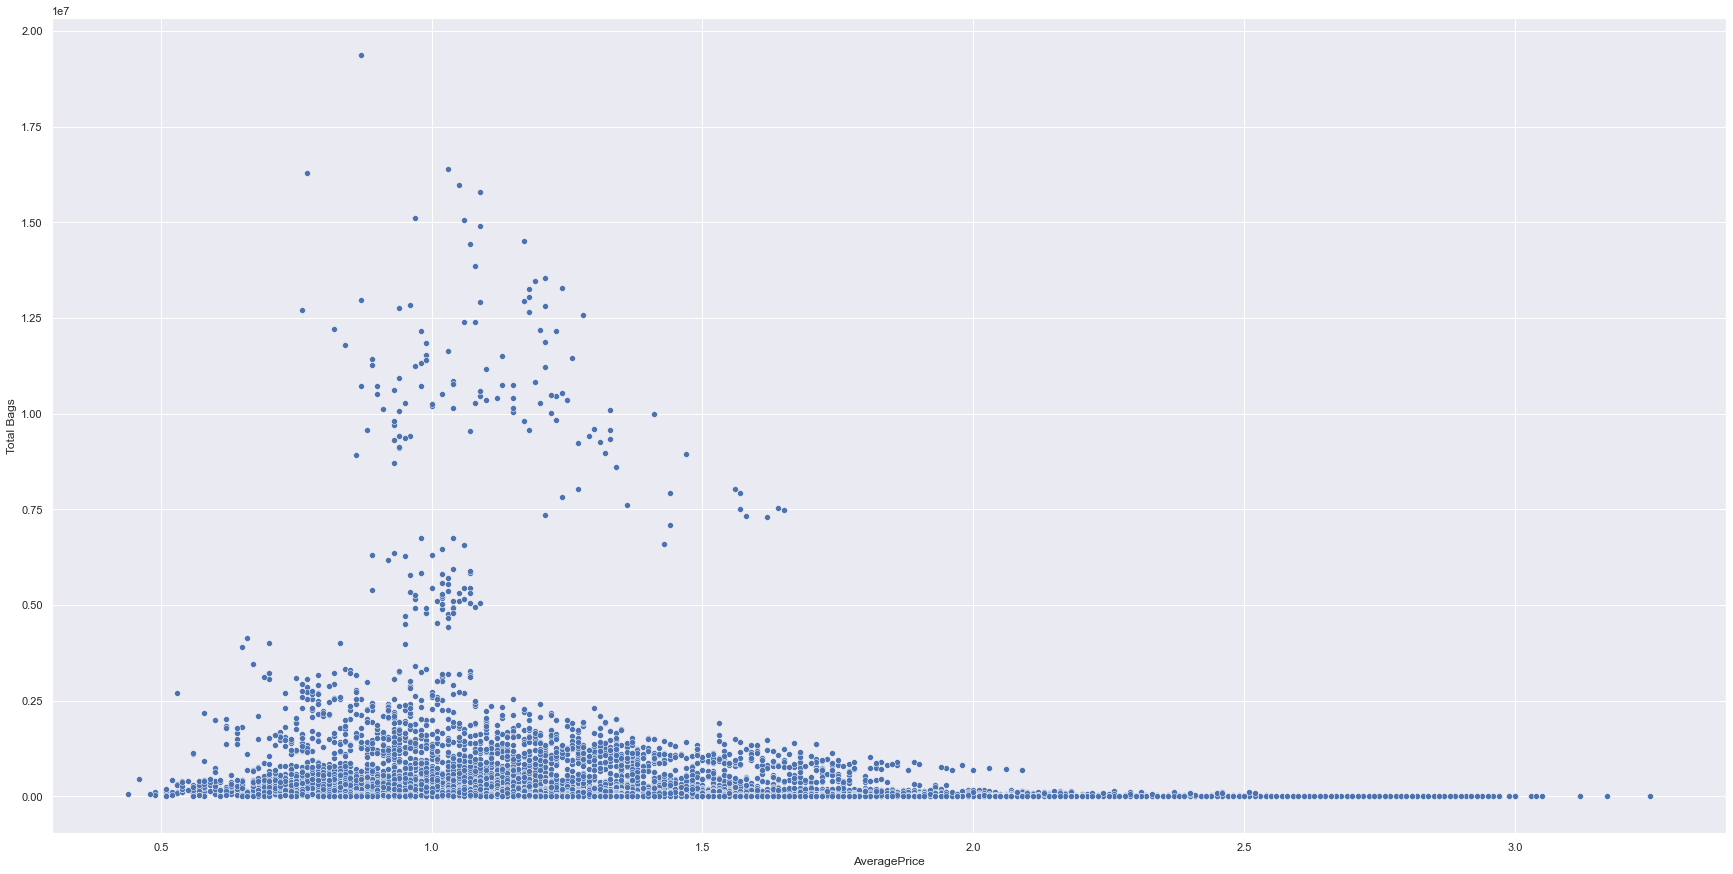

In [67]:
sns.scatterplot("AveragePrice","Total Bags" , data = data)
plt.show()

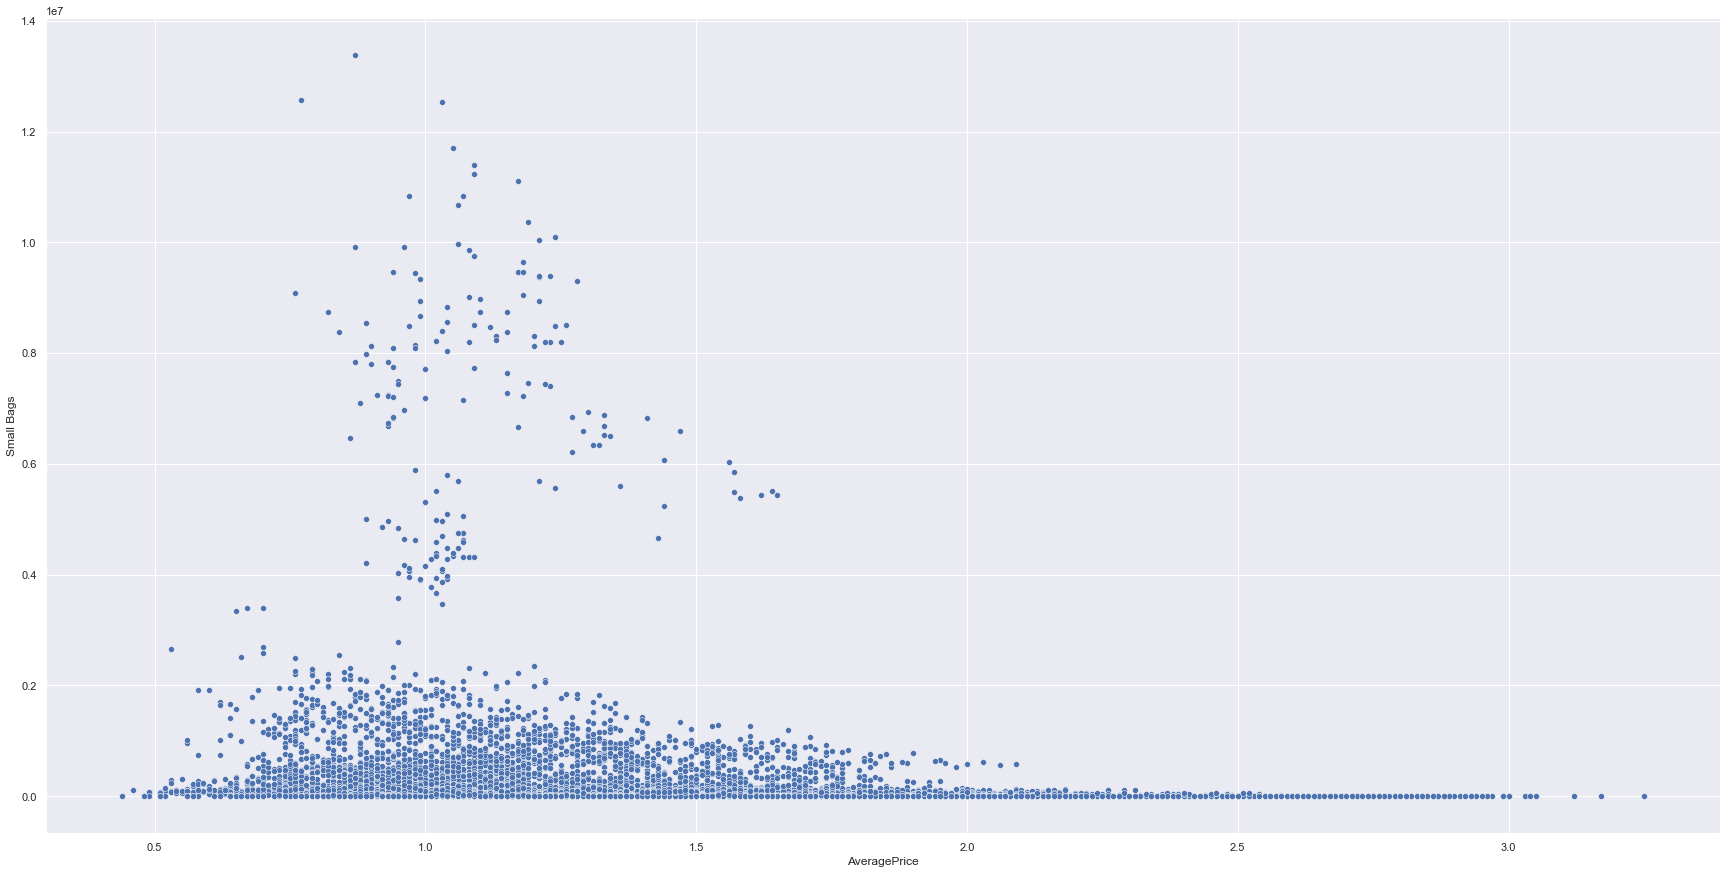

In [68]:
sns.scatterplot("AveragePrice","Small Bags" , data = data)
plt.show()

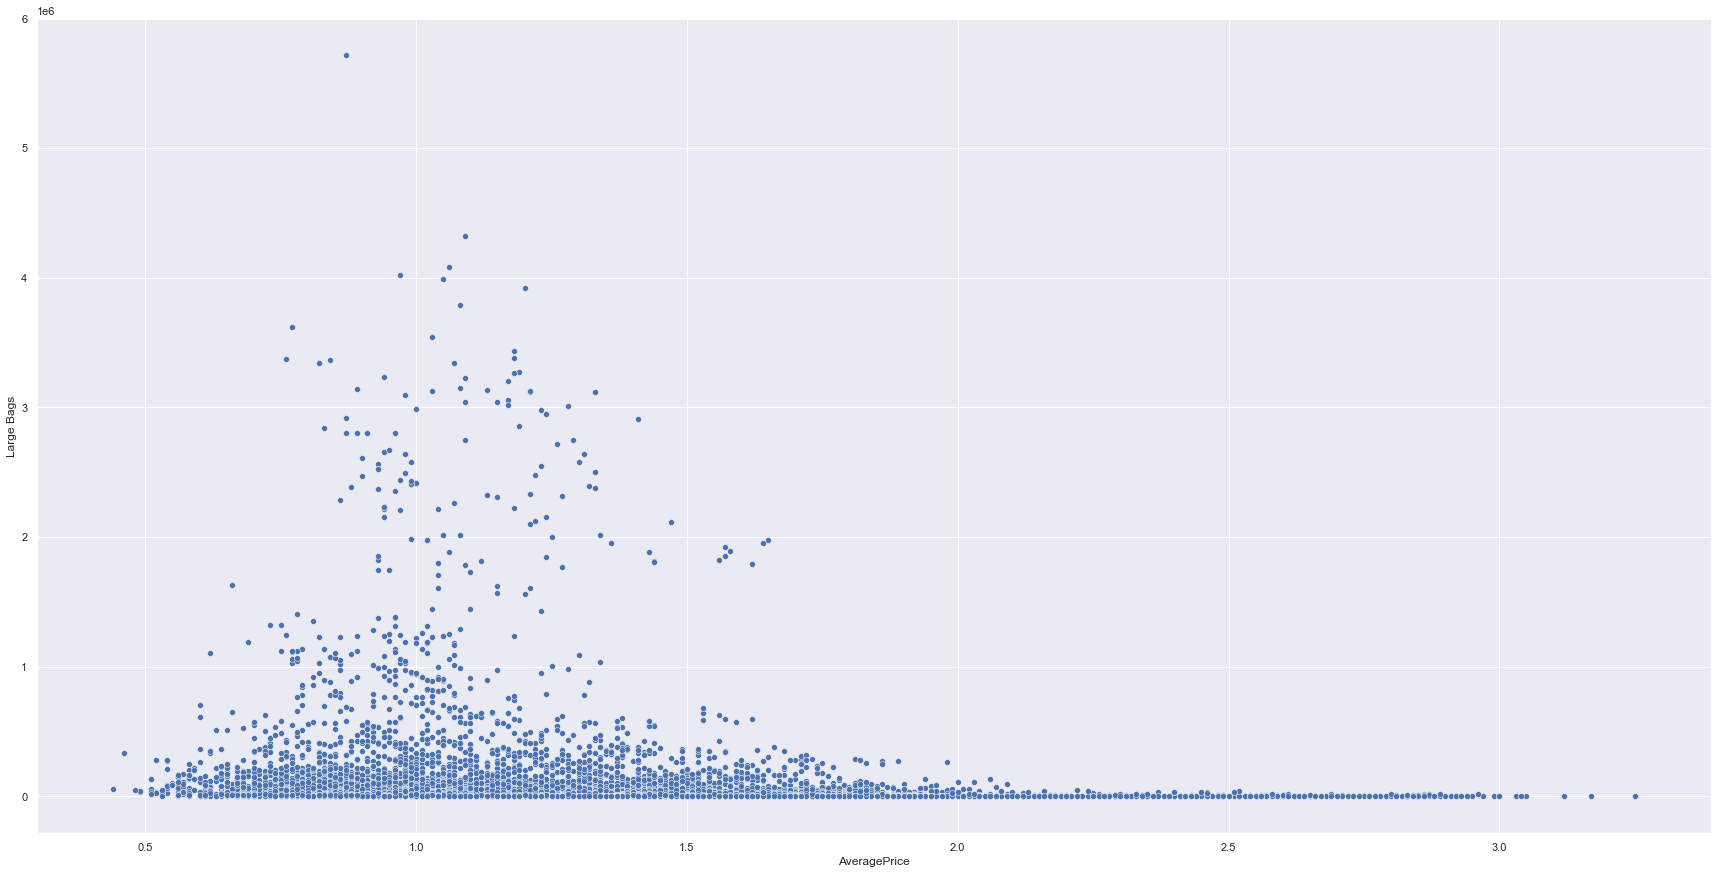

In [69]:
sns.scatterplot("AveragePrice","Large Bags" , data = data)
plt.show()

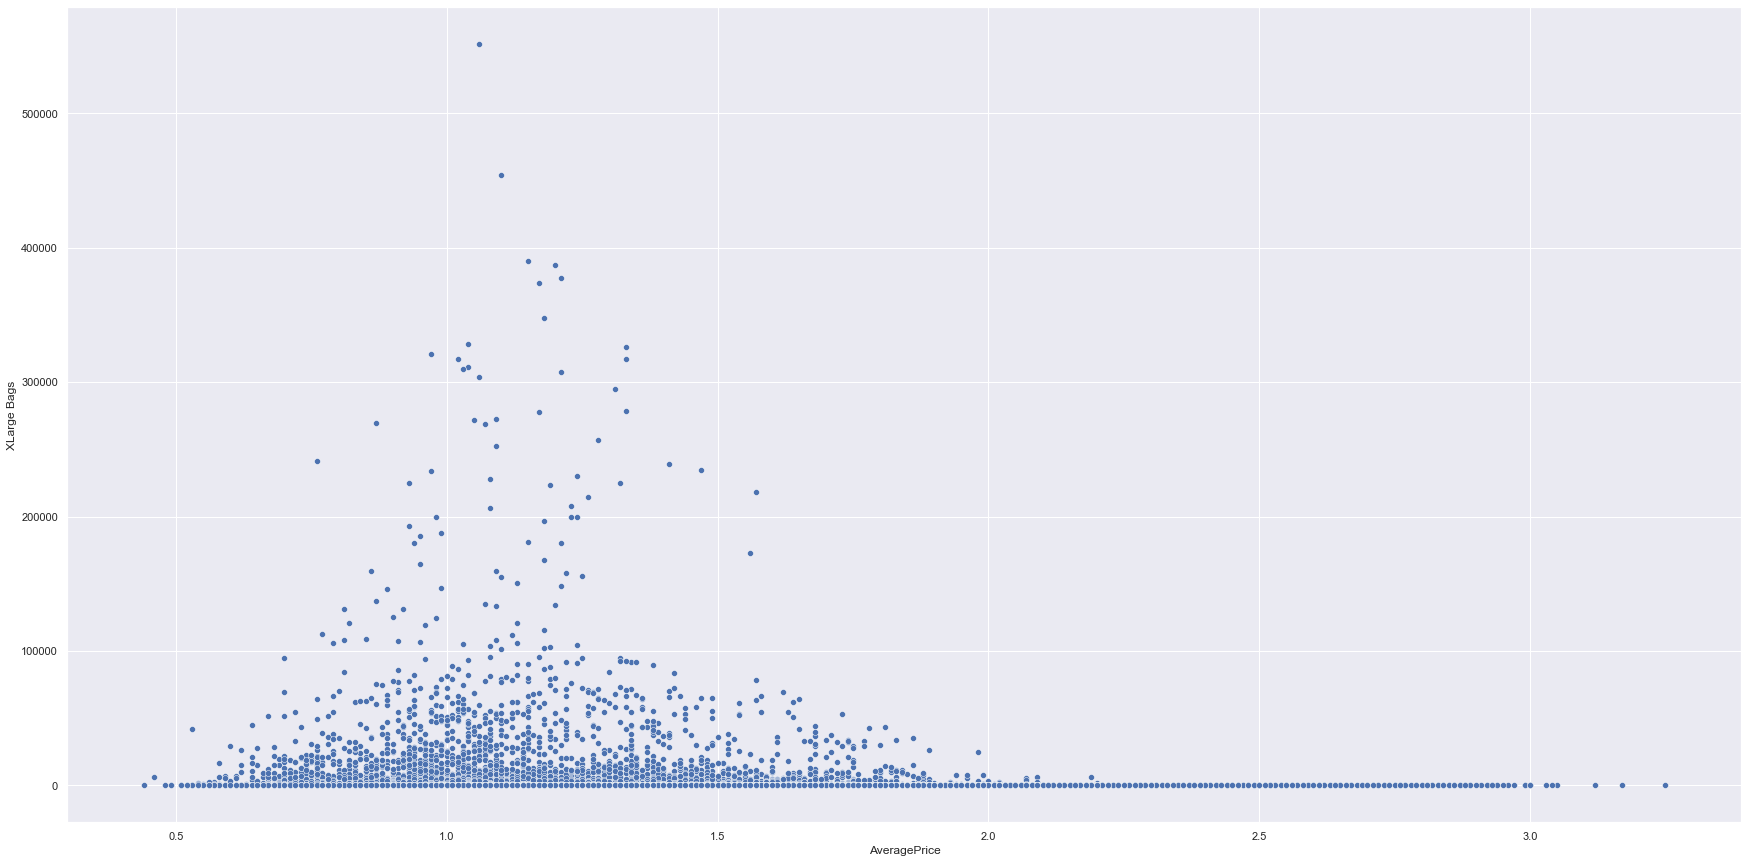

In [70]:
sns.scatterplot("AveragePrice","XLarge Bags" , data = data)
plt.show()

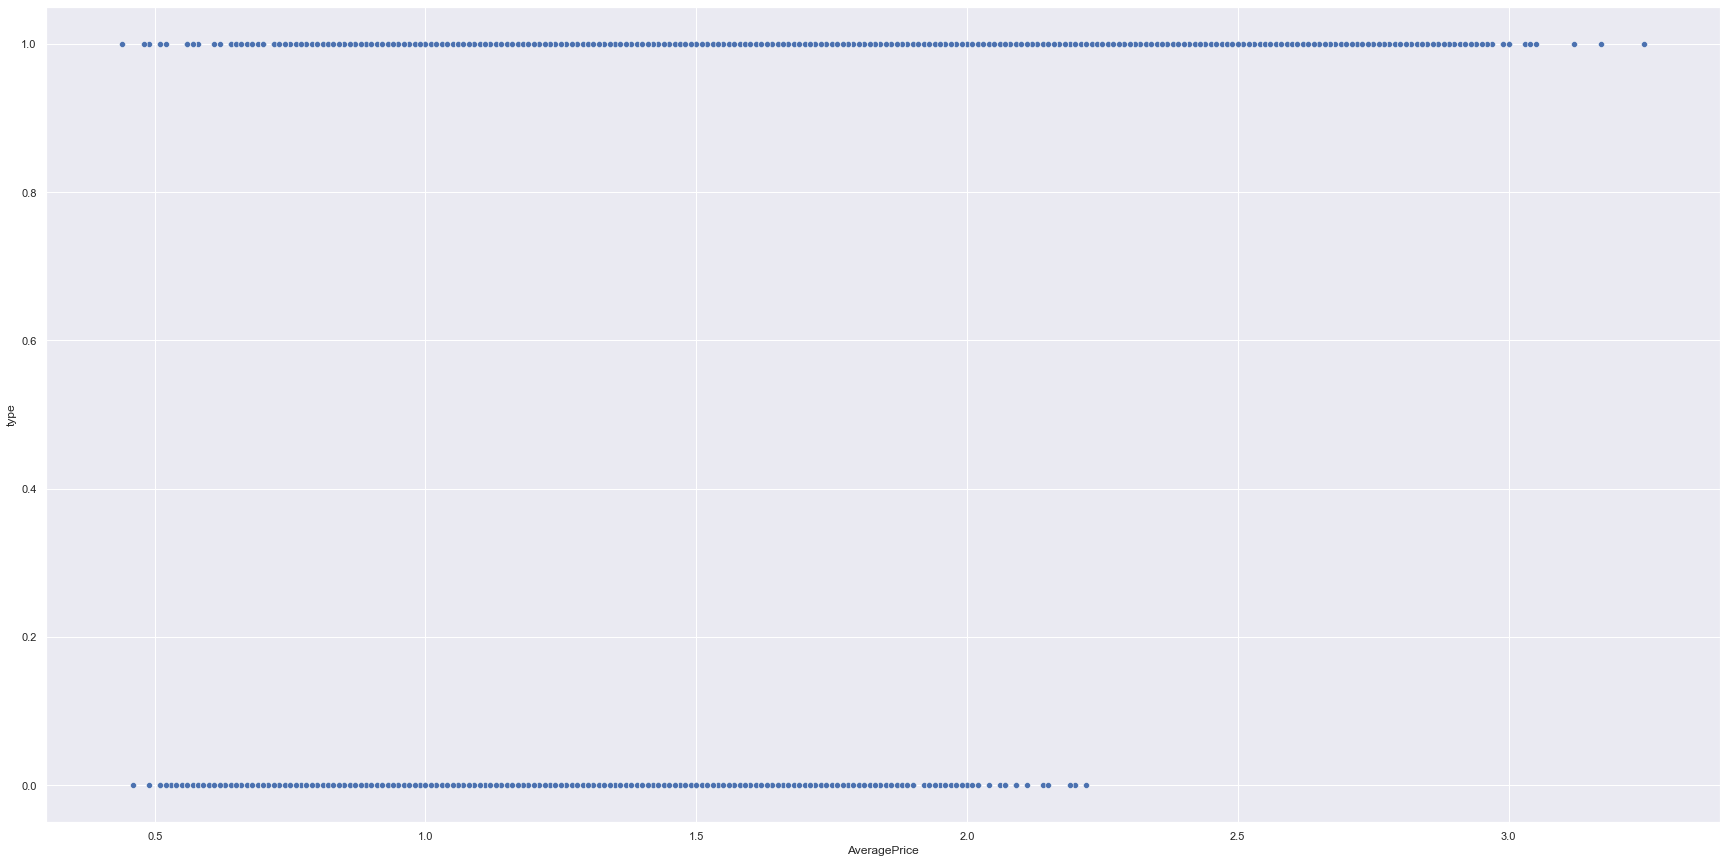

In [71]:
sns.scatterplot("AveragePrice","type" , data = data)
plt.show()

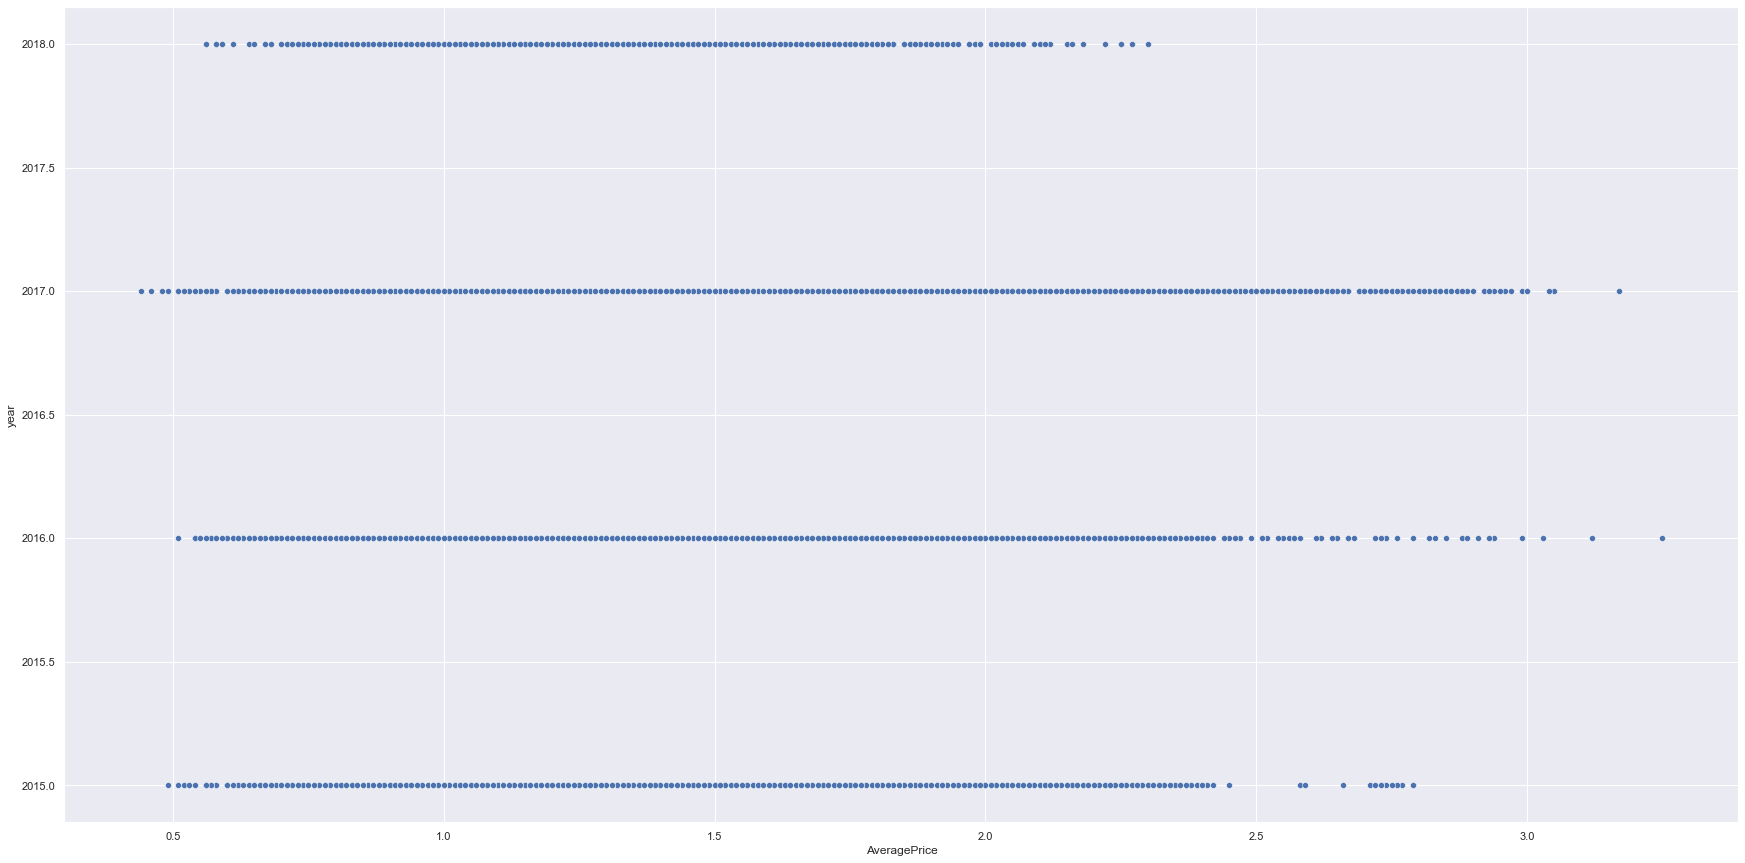

In [72]:
sns.scatterplot("AveragePrice","year" , data = data)
plt.show()

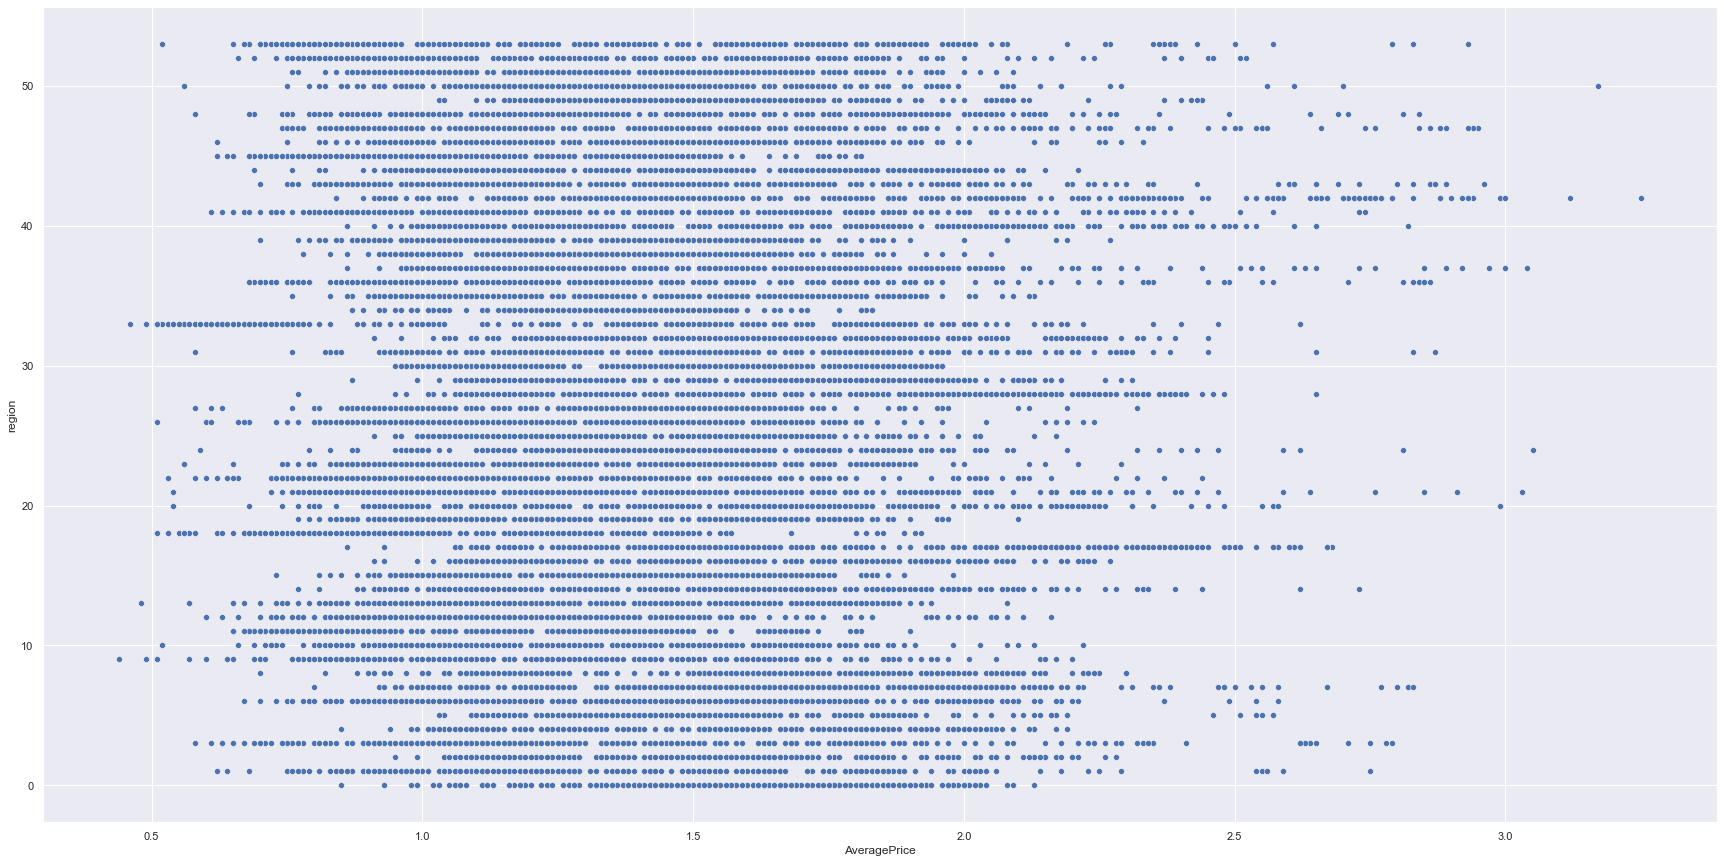

In [73]:
sns.scatterplot("AveragePrice","region" , data = data)
plt.show()

In [74]:
enc.categories_

[array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
        'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
        'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver',
        'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton',
        'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville',
        'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale',
        'Midsouth', 'Nashville', 'NewOrleansMobile', 'NewYork',
        'Northeast', 'NorthernNewEngland', 'Orlando', 'Philadelphia',
        'PhoenixTucson', 'Pittsburgh', 'Plains', 'Portland',
        'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke', 'Sacramento',
        'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
        'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
        'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'], dtype=object)]

# Univariate

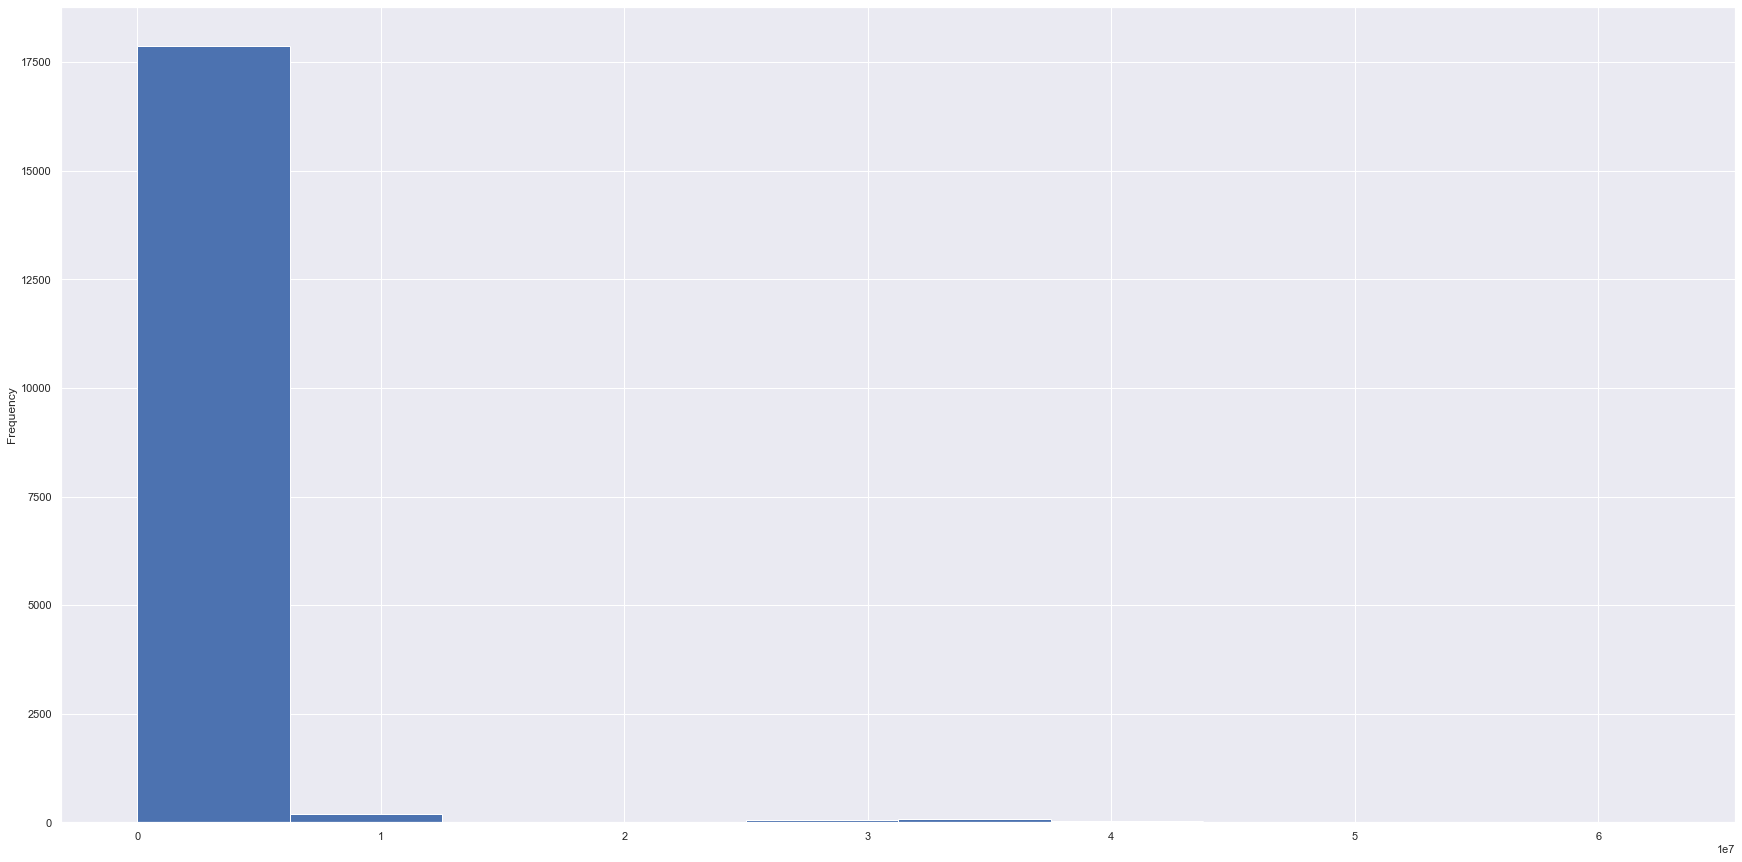

In [75]:
data["Total Volume"].plot(kind='hist' , grid = True)
plt.show()

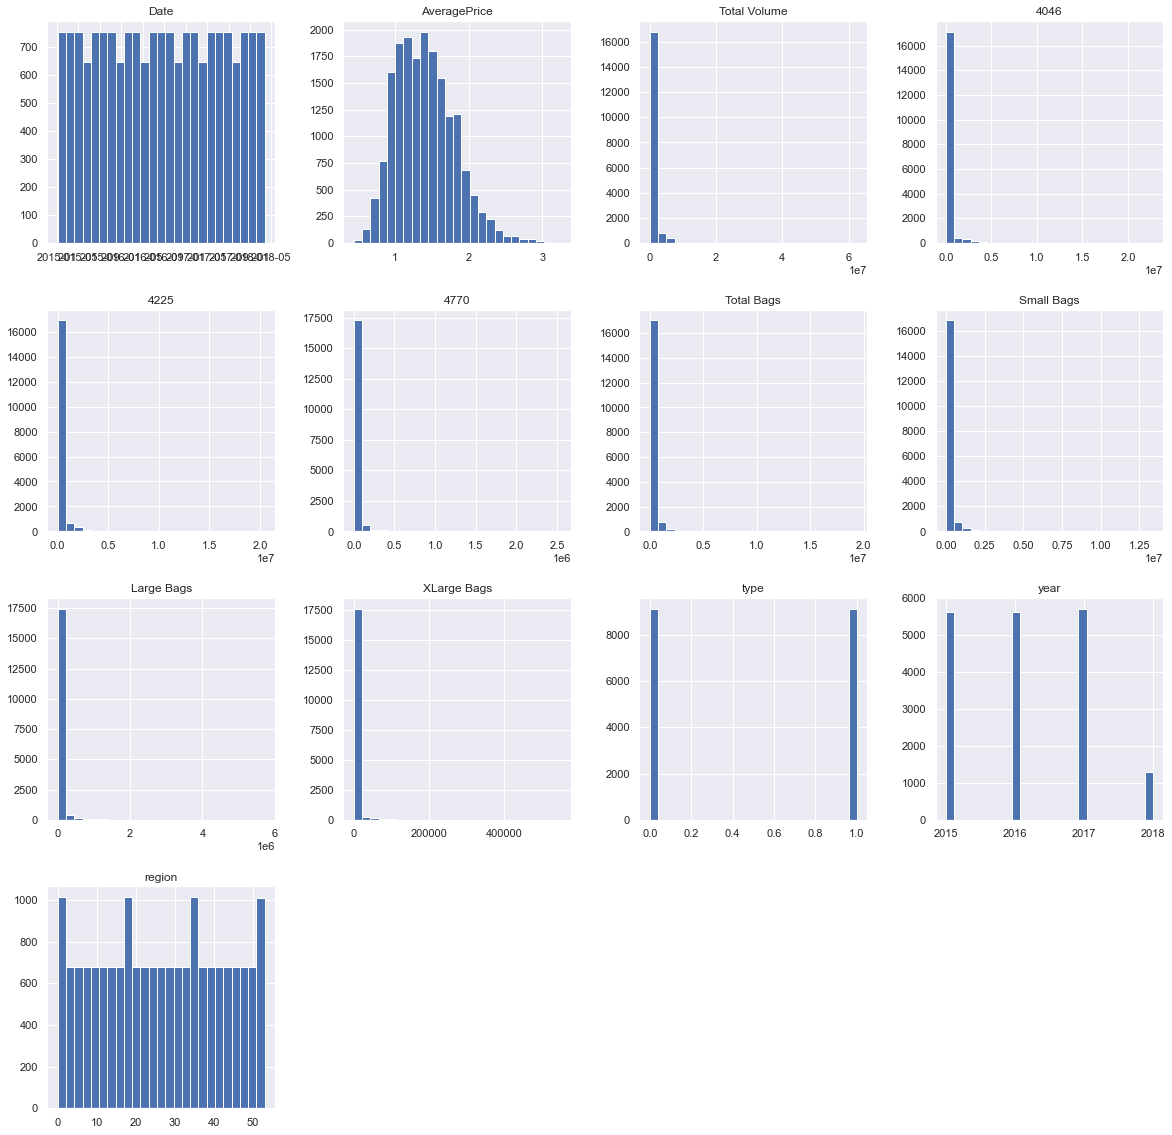

In [76]:
data.hist(bins=25,figsize=(20,20))
plt.show()

In [77]:
data["Date"].plot(kind='hist' , grid = True)
plt.show()

TypeError: The DTypes <class 'numpy.dtype[datetime64]'> and <class 'numpy.dtype[uint8]'> do not have a common DType. For example they cannot be stored in a single array unless the dtype is `object`.

In [ ]:
data["AveragePrice"].plot(kind='hist' , grid = True)
plt.show()

In [ ]:
data["Total Volume"].plot(kind='hist' , grid = True)
plt.show()

In [ ]:
data["4046"].plot(kind='hist' , grid = True)
plt.show()

In [ ]:
data["4225"].plot(kind='hist' , grid = True)
plt.show()

In [ ]:
data["4770"].plot(kind='hist' , grid = True)
plt.show()

In [ ]:
data["Total Bags"].plot(kind='hist' , grid = True)
plt.show()

In [ ]:
data["Small Bags"].plot(kind='hist' , grid = True)
plt.show()

In [ ]:
data["Large Bags"].plot(kind='hist' , grid = True)
plt.show()

In [ ]:
data["XLarge Bags"].plot(kind='hist' , grid = True)
plt.show()

In [ ]:
data["type"].plot(kind='hist' , grid = True)
plt.show()

In [ ]:
data["year"].plot(kind='hist' , grid = True)
plt.show()

In [ ]:
data["region"].plot(kind='hist' , grid = True)
plt.show()

# Checking  for skewness and distribution of data

<AxesSubplot:xlabel='AveragePrice', ylabel='Density'>

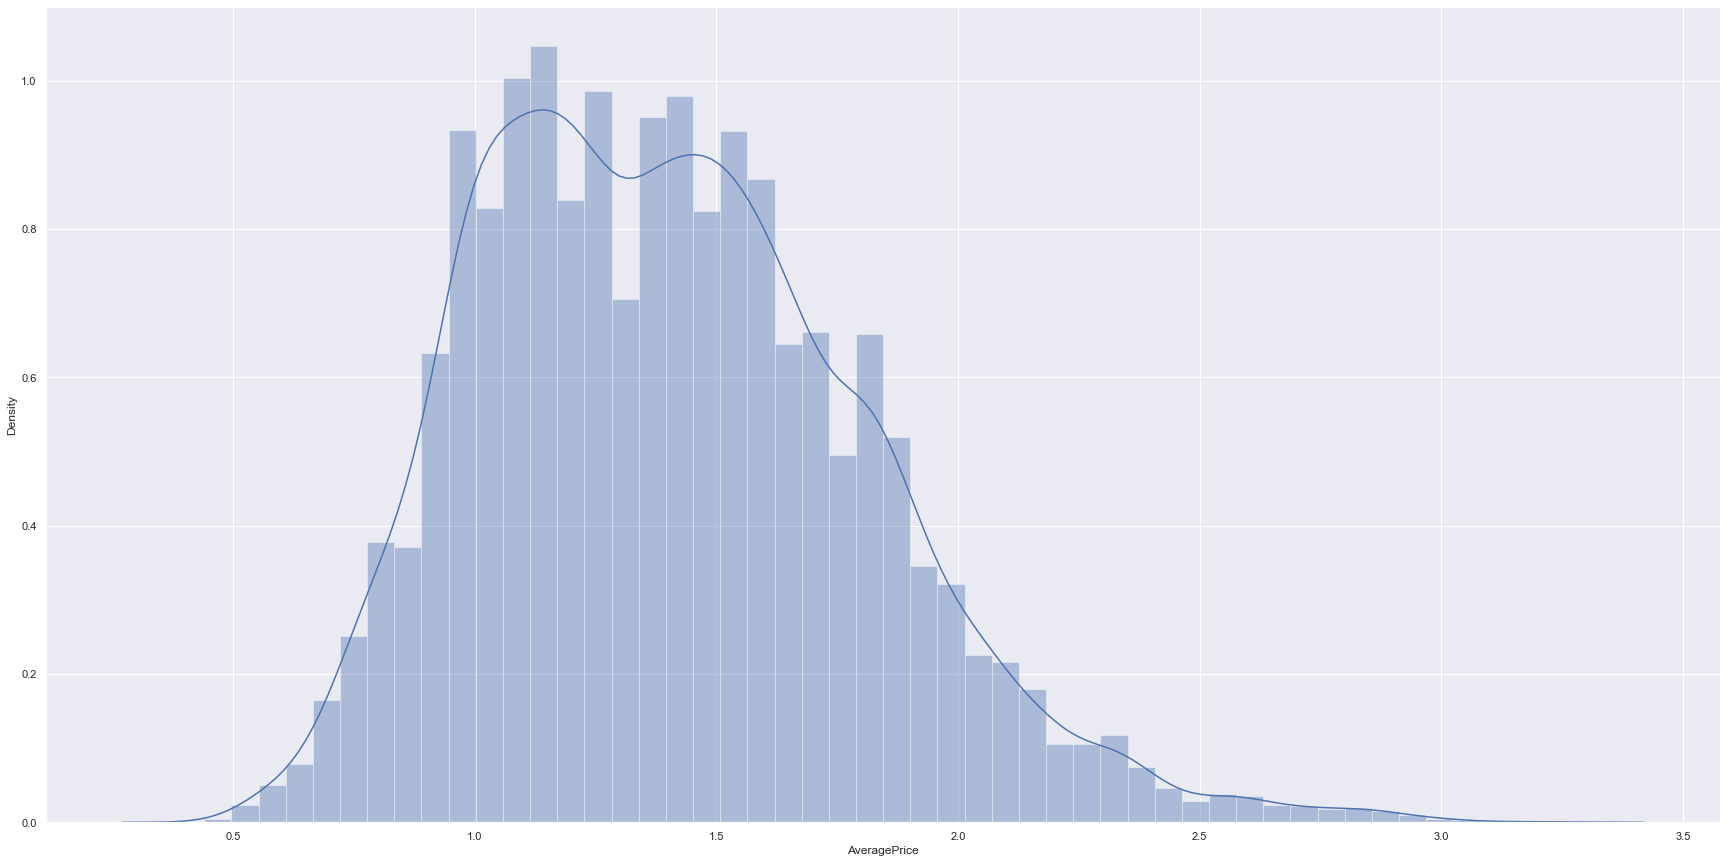

In [82]:
sns.distplot (data["AveragePrice"])

<AxesSubplot:xlabel='Total Volume', ylabel='Density'>

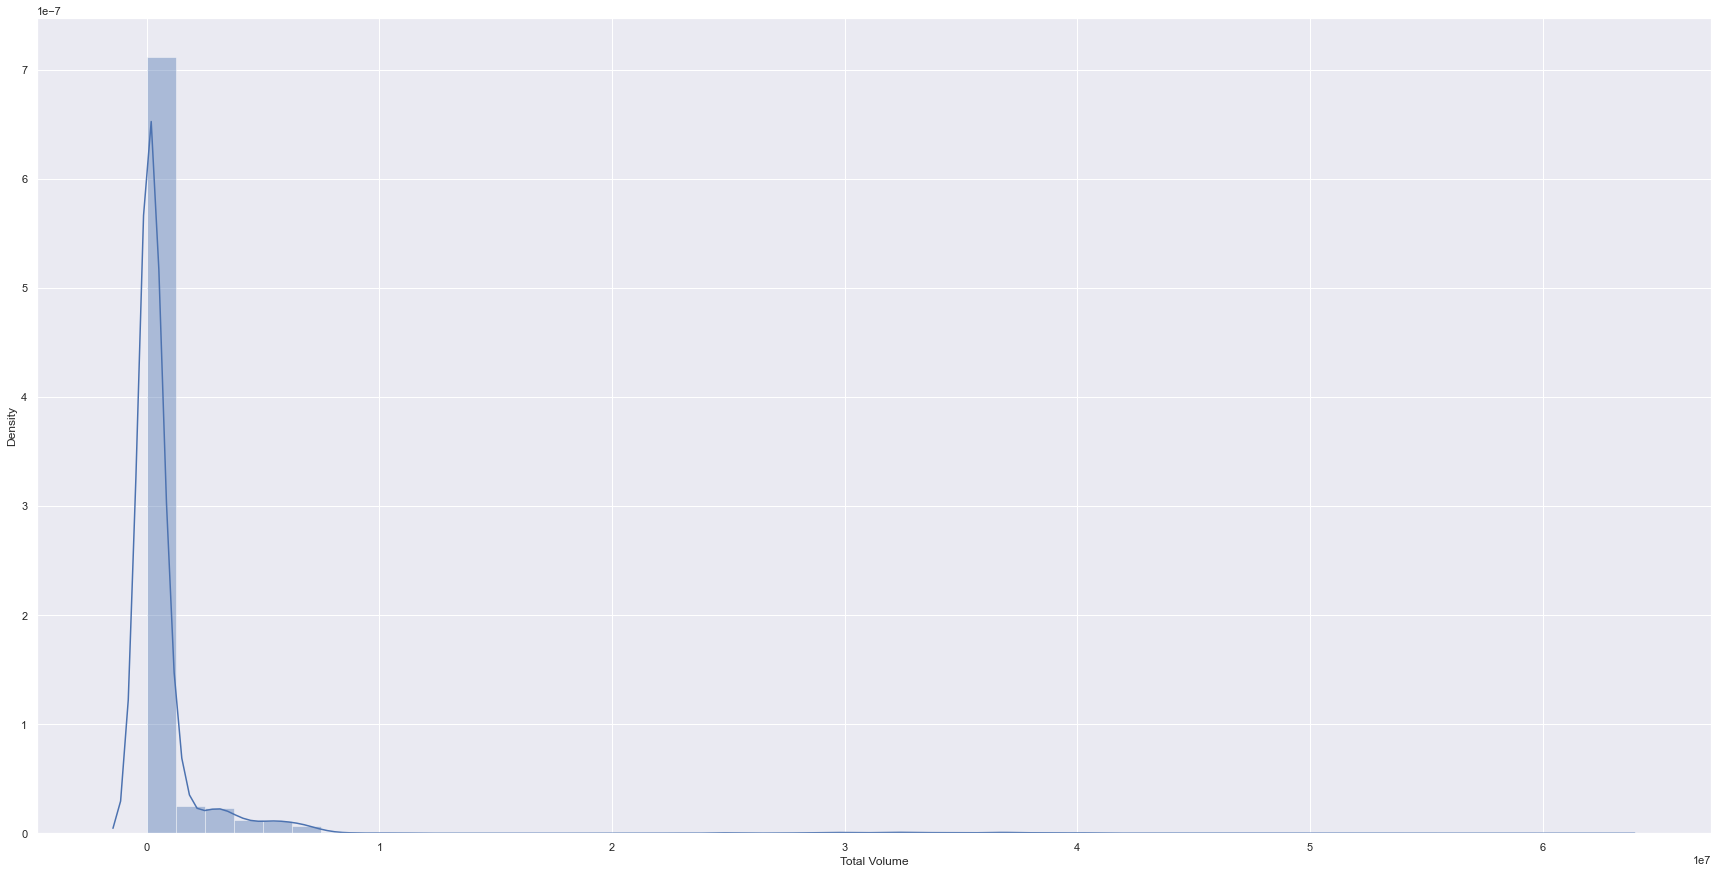

In [83]:
sns.distplot (data["Total Volume"])

<AxesSubplot:xlabel='4046', ylabel='Density'>

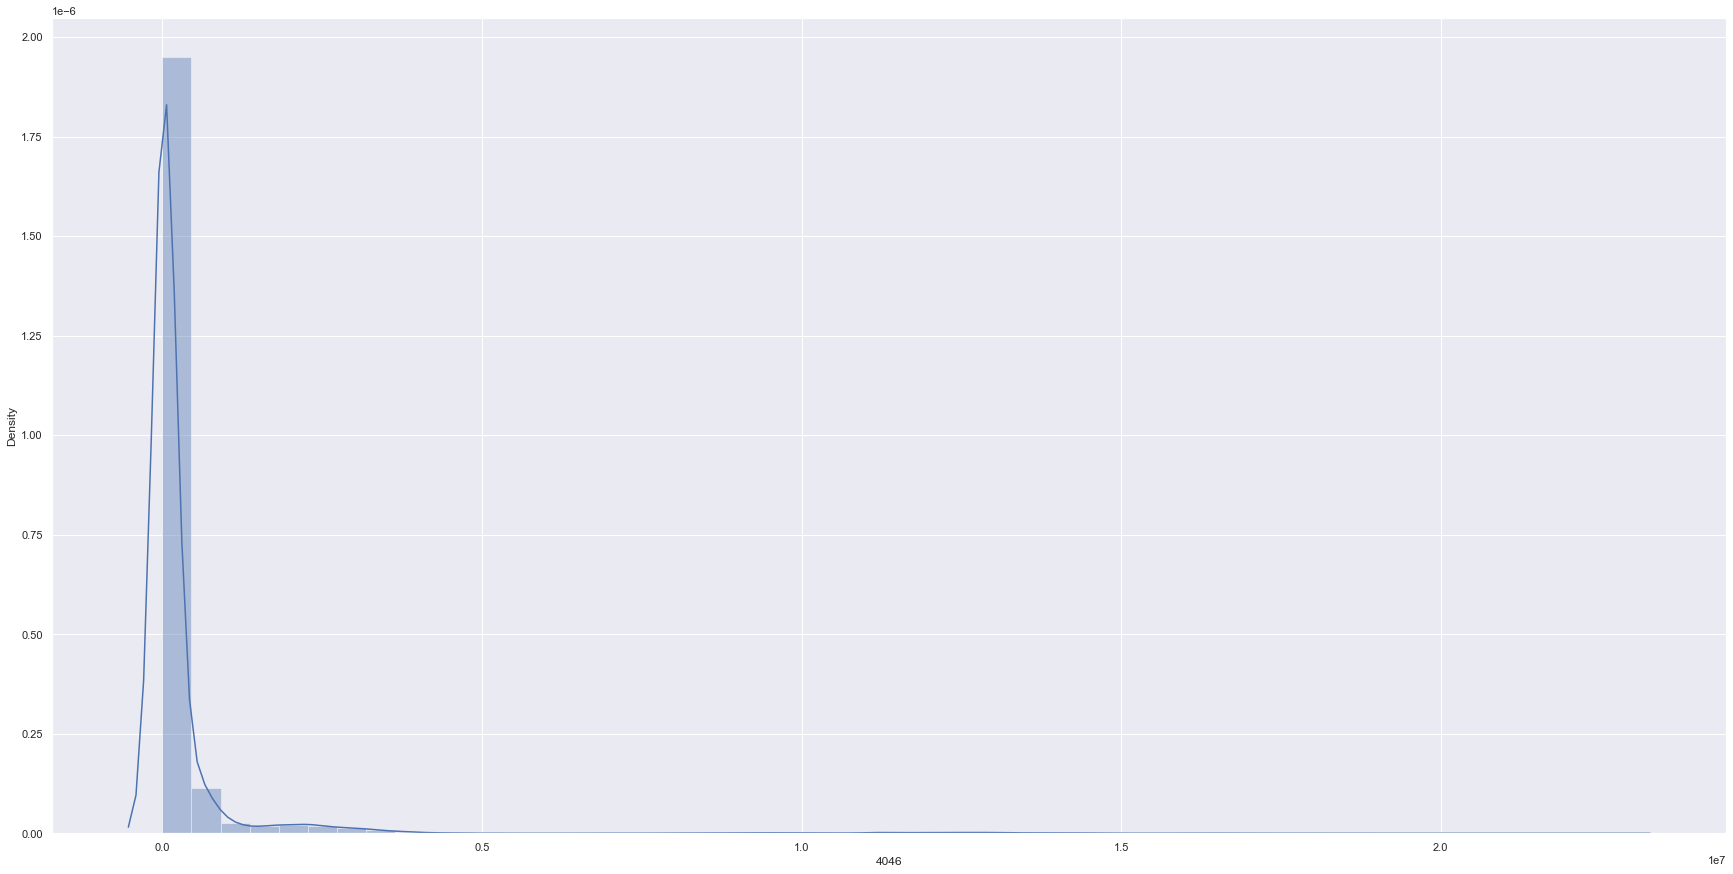

In [84]:
sns.distplot (data["4046"])

<AxesSubplot:xlabel='4225', ylabel='Density'>

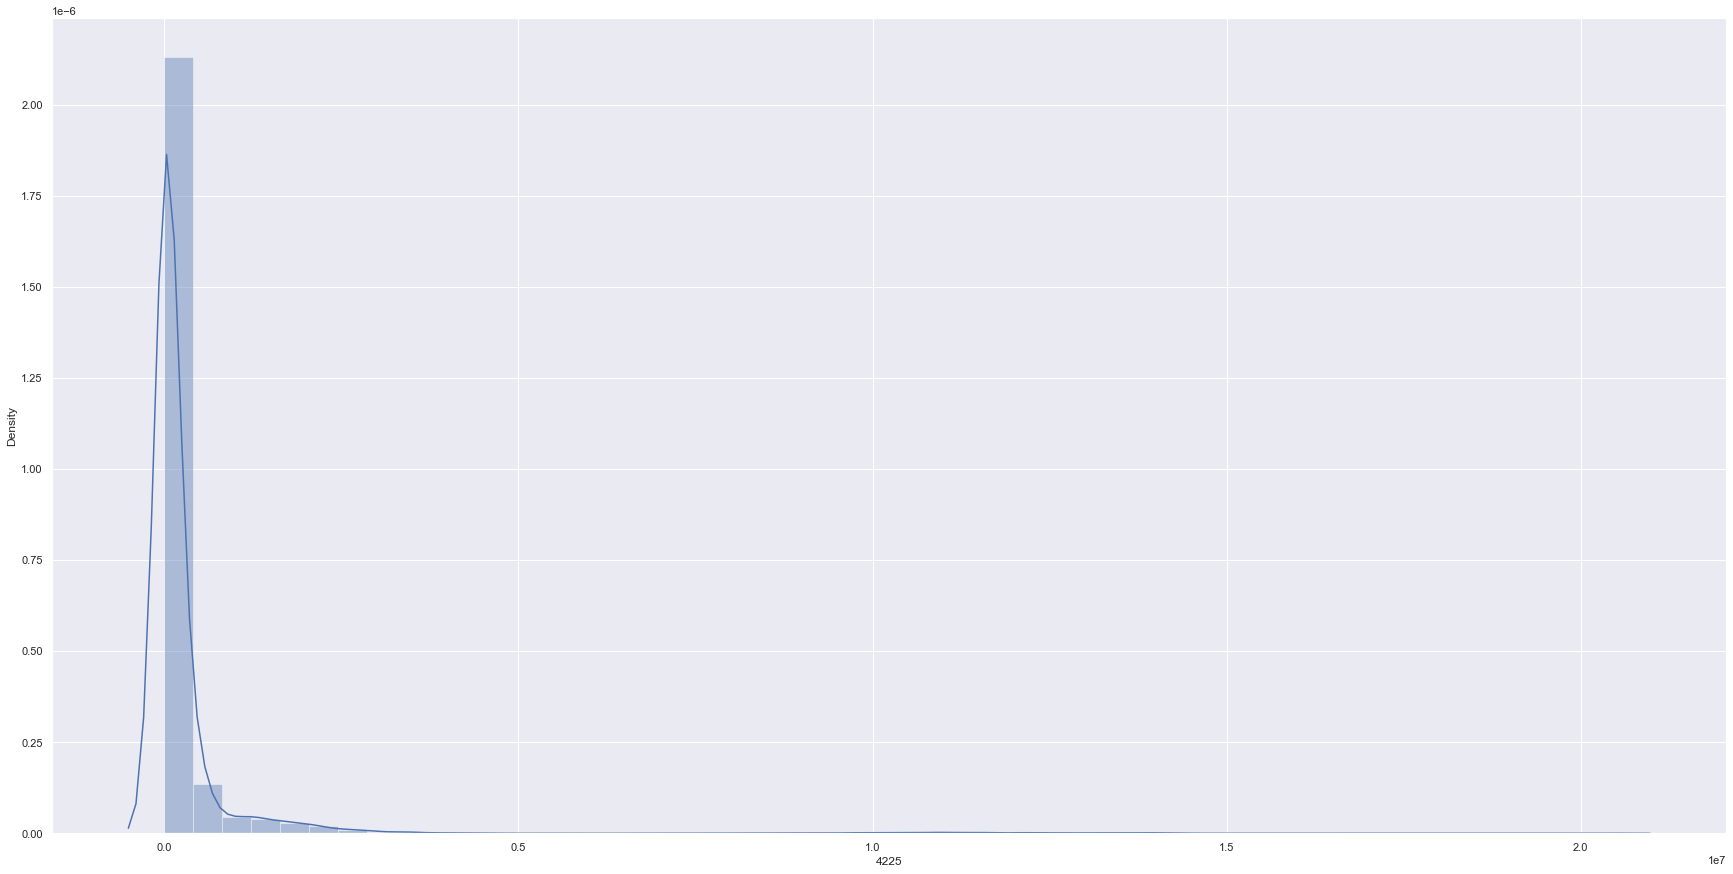

In [85]:
sns.distplot (data["4225"])

<AxesSubplot:xlabel='4770', ylabel='Density'>

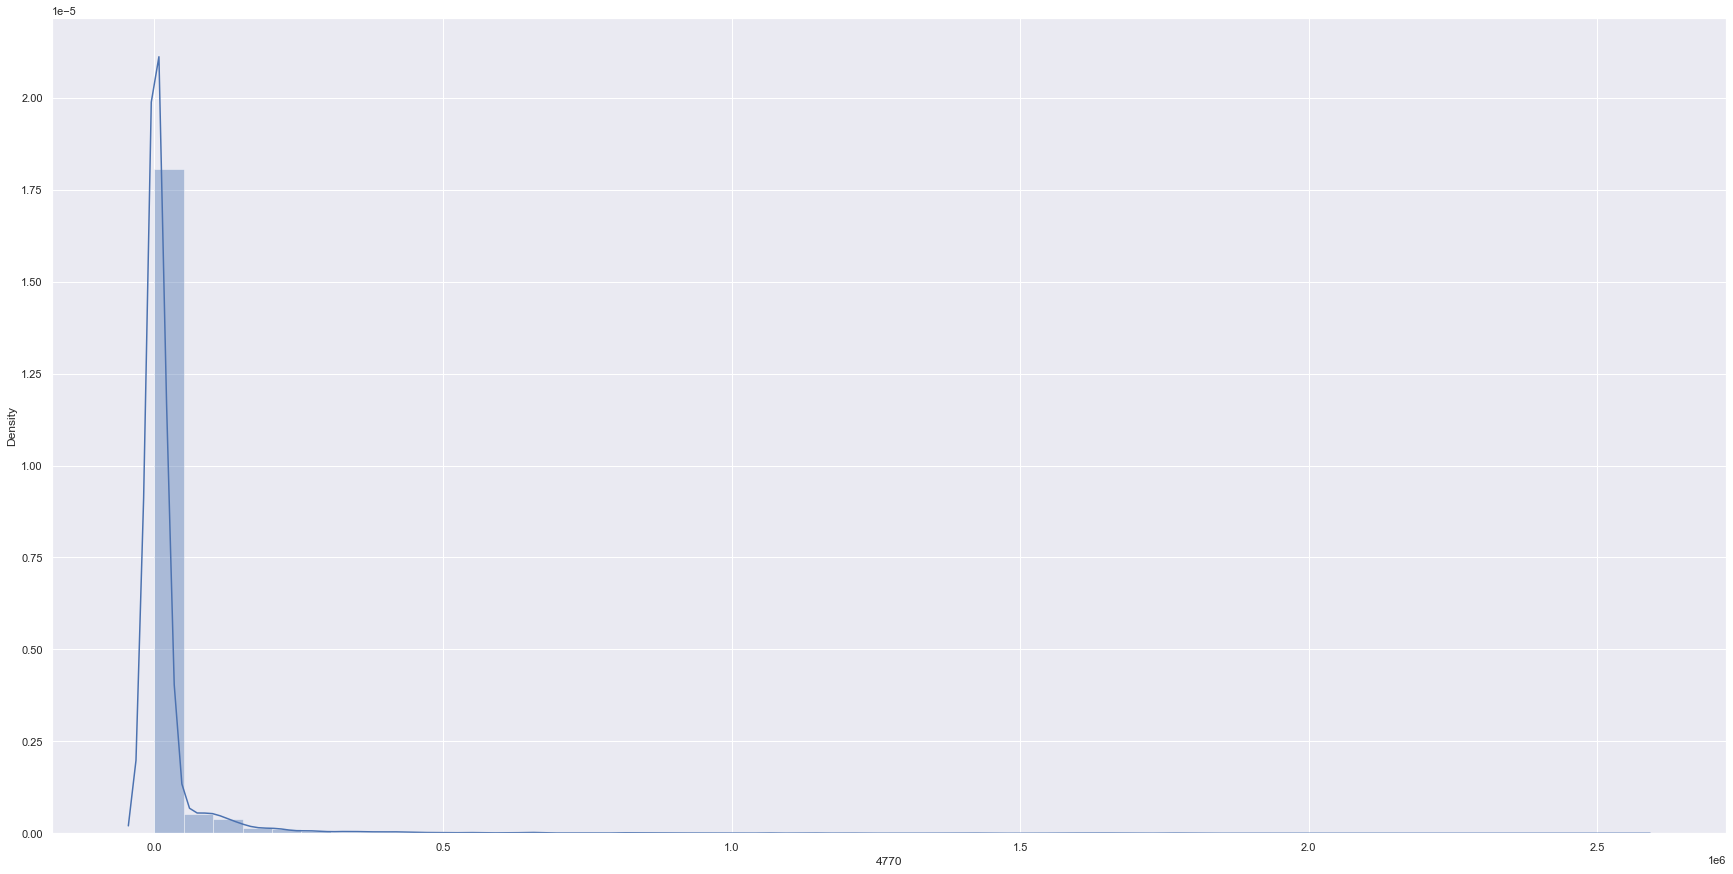

In [78]:
sns.distplot (data["4770"])

<AxesSubplot:xlabel='Total Bags', ylabel='Density'>

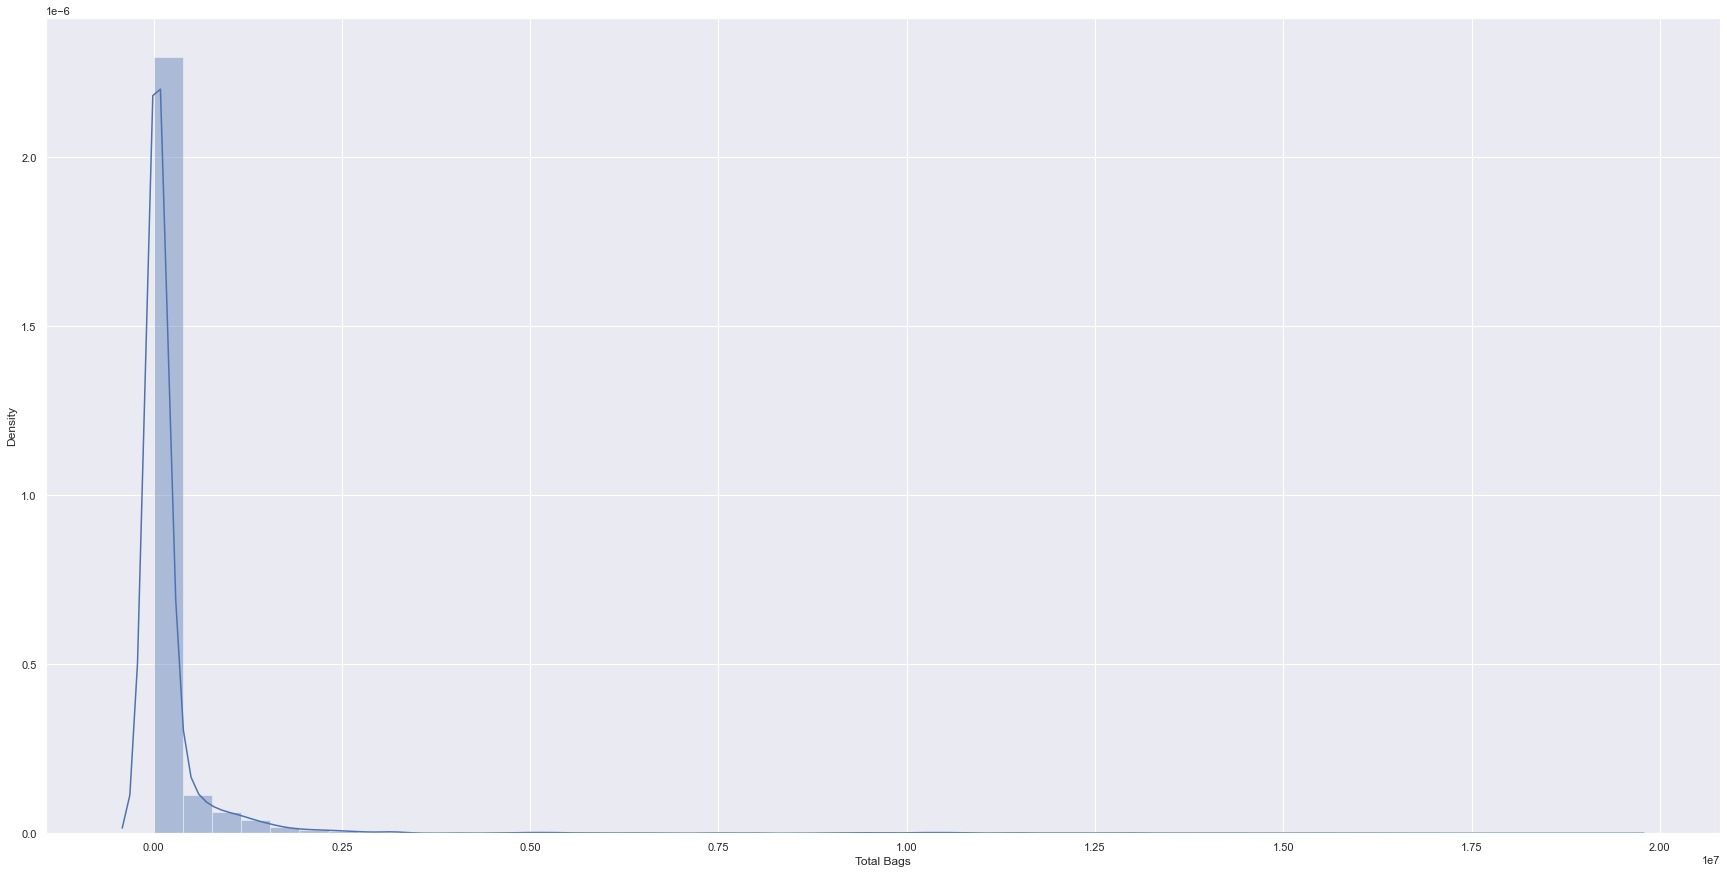

In [79]:
sns.distplot (data["Total Bags"])

<AxesSubplot:xlabel='Small Bags', ylabel='Density'>

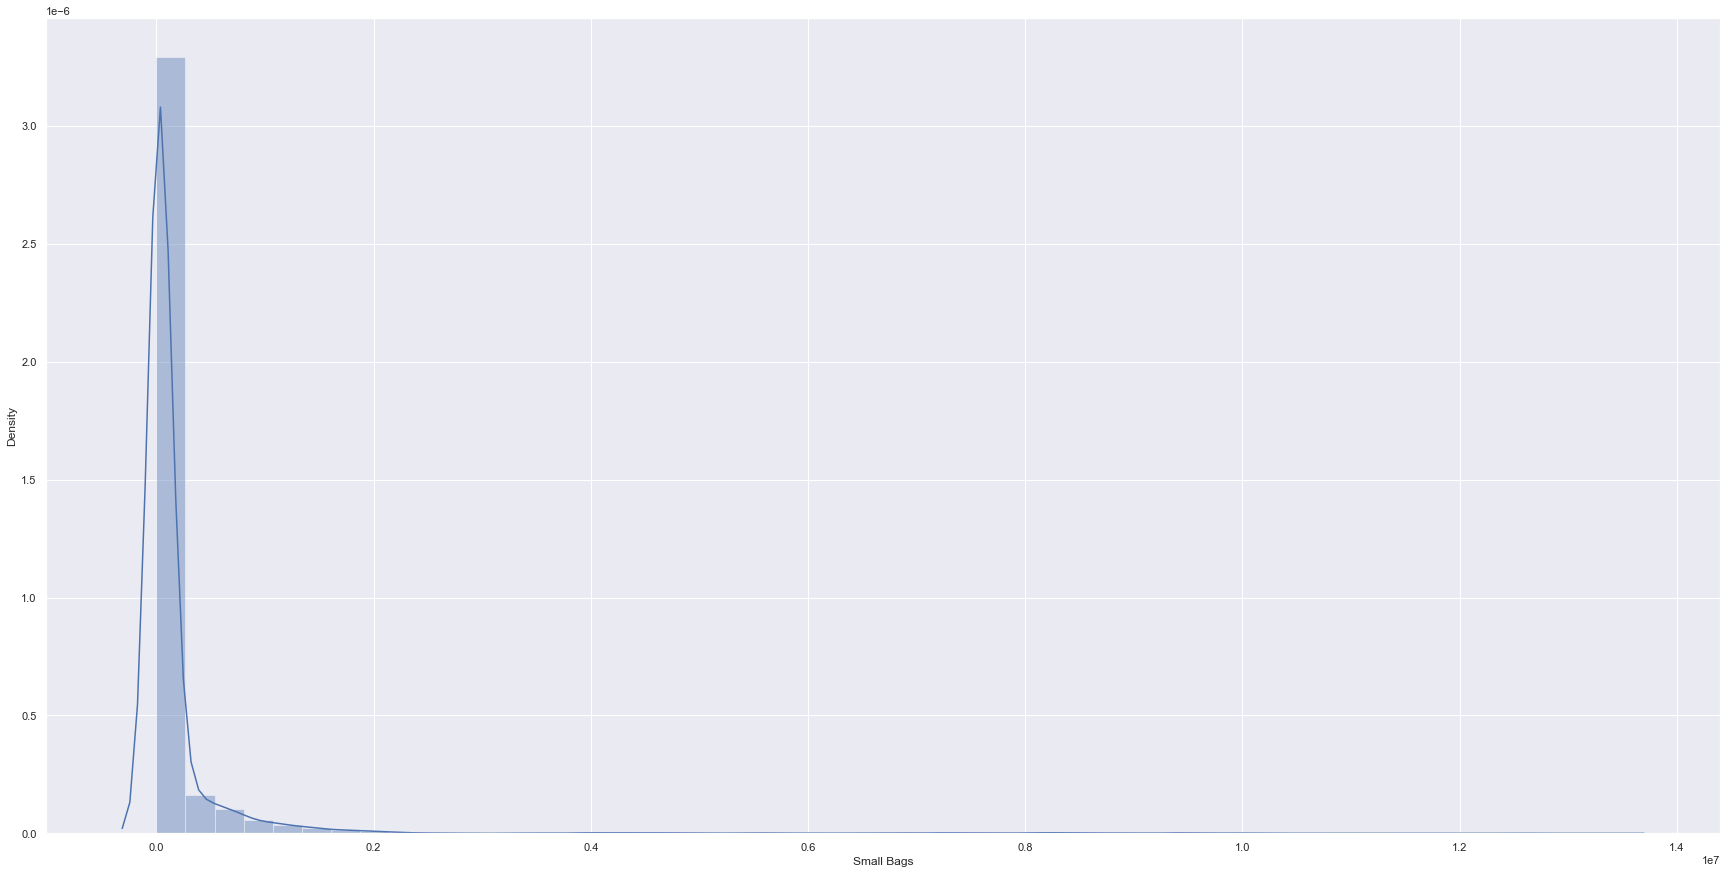

In [80]:
sns.distplot (data["Small Bags"])

<AxesSubplot:xlabel='Large Bags', ylabel='Density'>

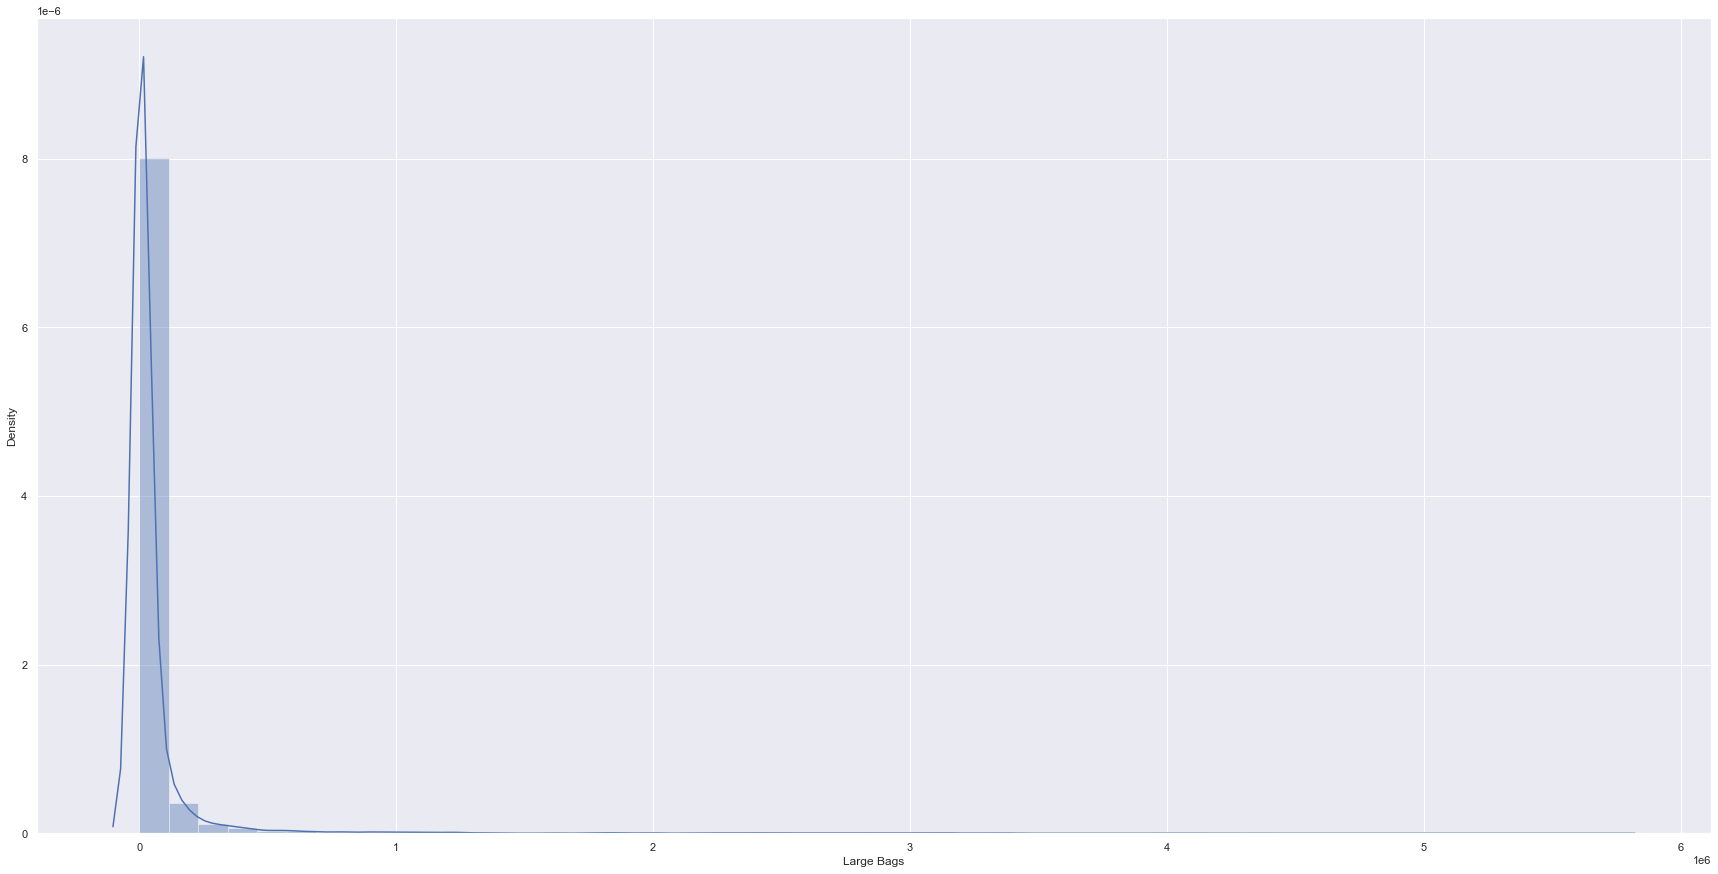

In [81]:
sns.distplot (data["Large Bags"])

<AxesSubplot:xlabel='XLarge Bags', ylabel='Density'>

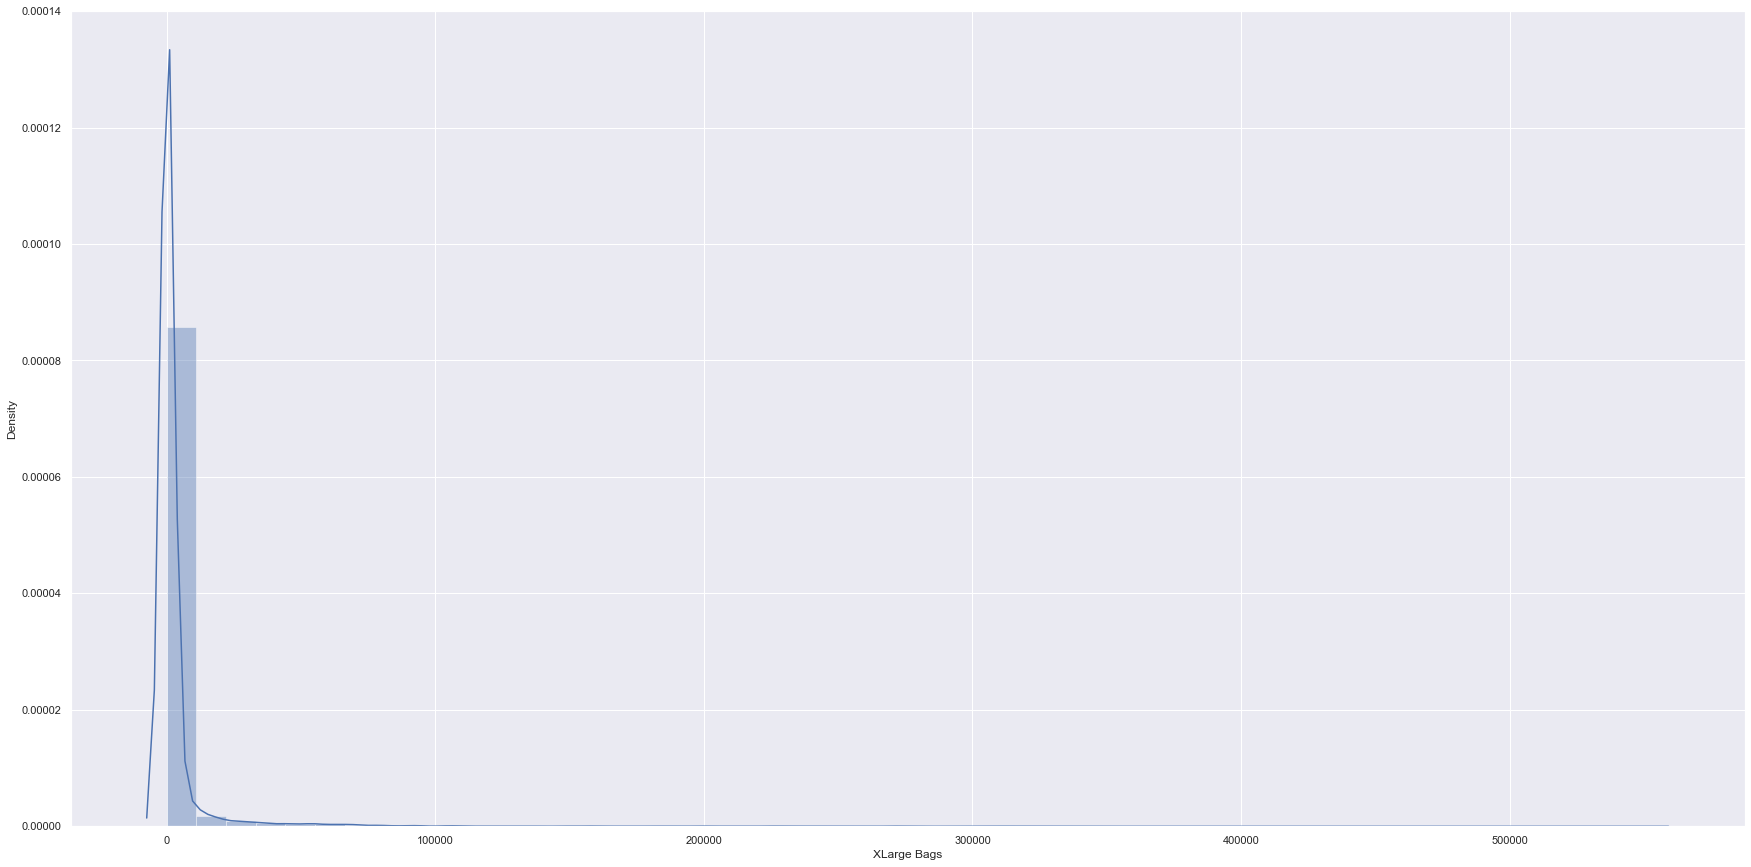

In [82]:
sns.distplot (data["XLarge Bags"])

<AxesSubplot:xlabel='year', ylabel='Density'>

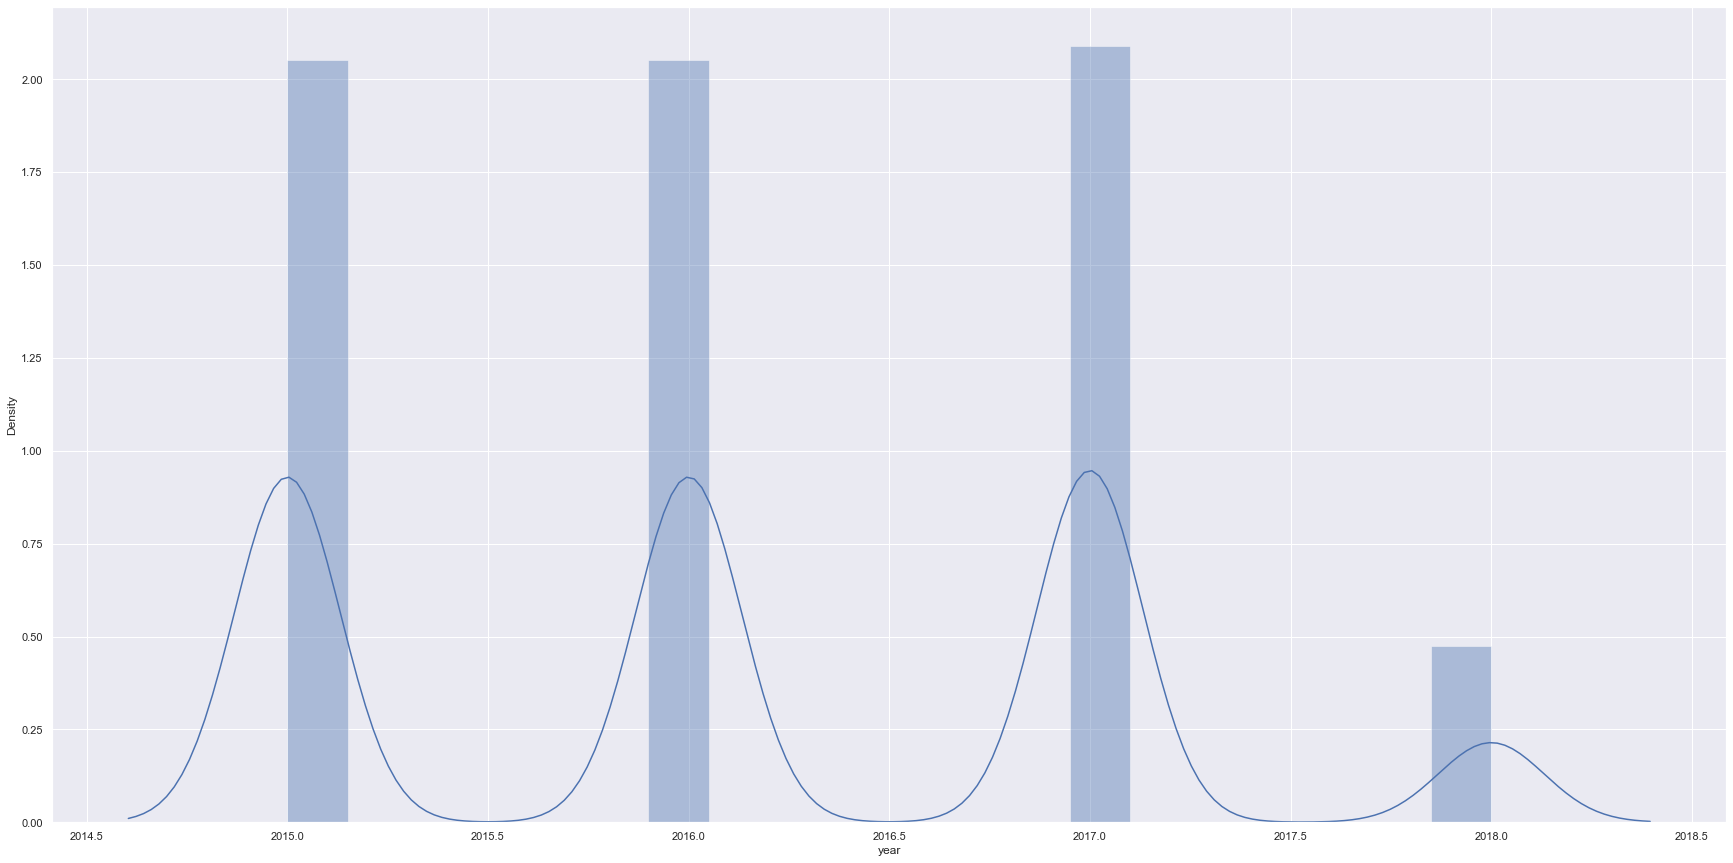

In [83]:
sns.distplot (data["year"])

# checking correlation

In [84]:
cor = data.corr()

In [85]:
cor

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
AveragePrice,1.000000,-0.192752,-0.208317,-0.172928,-0.179446,-0.177088,-0.174730,-0.172940,-0.117592,0.615845,0.093197,-0.011716
Total Volume,-0.192752,1.000000,0.977863,0.974181,0.872202,0.963047,0.967238,0.880640,0.747157,-0.232434,0.017193,0.174176
4046,-0.208317,0.977863,1.000000,0.926110,0.833389,0.920057,0.925280,0.838645,0.699377,-0.225819,0.003353,0.192073
4225,-0.172928,0.974181,0.926110,1.000000,0.887855,0.905787,0.916031,0.810015,0.688809,-0.232289,-0.009559,0.145726
4770,-0.179446,0.872202,0.833389,0.887855,1.000000,0.792314,0.802733,0.698471,0.679861,-0.210027,-0.036531,0.095252
Total Bags,-0.177088,0.963047,0.920057,0.905787,0.792314,1.000000,0.994335,0.943009,0.804233,-0.217788,0.071552,0.175256
Small Bags,-0.174730,0.967238,0.925280,0.916031,0.802733,0.994335,1.000000,0.902589,0.806845,-0.220535,0.063915,0.164702
Large Bags,-0.172940,0.880640,0.838645,0.810015,0.698471,0.943009,0.902589,1.000000,0.710858,-0.193177,0.087891,0.198768
XLarge Bags,-0.117592,0.747157,0.699377,0.688809,0.679861,0.804233,0.806845,0.710858,1.000000,-0.175483,0.081033,0.082281
type,0.615845,-0.232434,-0.225819,-0.232289,-0.210027,-0.217788,-0.220535,-0.193177,-0.175483,1.000000,-0.000032,-0.000280


<AxesSubplot:>

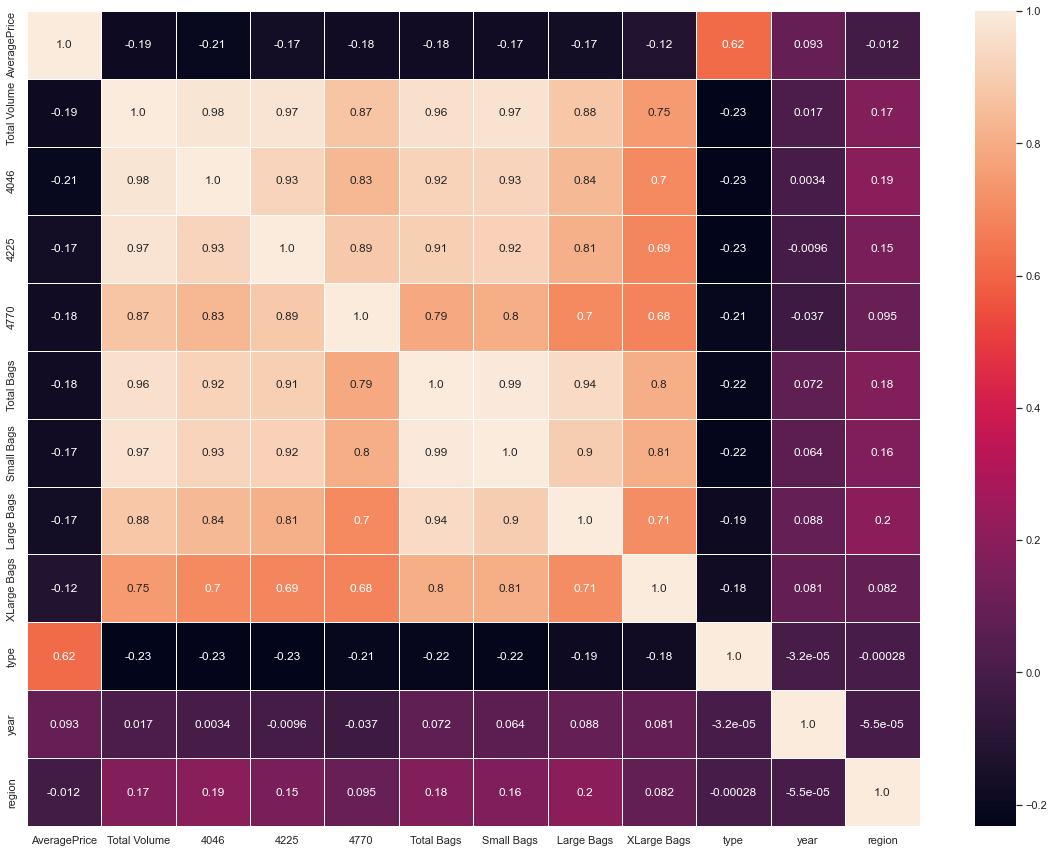

In [91]:
plt.figure(figsize =  (20,15))
sns.heatmap(cor,annot = True,linewidth = 0.5 ,linecolor = "white", fmt ='0.2')

In [87]:
for a in range(len(data.corr().columns)):
    for b in range(a):
        if (data.corr().iloc[a,b]) >0.7:
            name = data.corr().columns[a]
            print(name)

4046
4225
4225
4770
4770
4770
Total Bags
Total Bags
Total Bags
Total Bags
Small Bags
Small Bags
Small Bags
Small Bags
Small Bags
Large Bags
Large Bags
Large Bags
Large Bags
Large Bags
XLarge Bags
XLarge Bags
XLarge Bags
XLarge Bags


In [96]:
data_1 = data.drop(["Total Volume"], axis = 1)

In [97]:
cor = data_1.corr()

<AxesSubplot:>

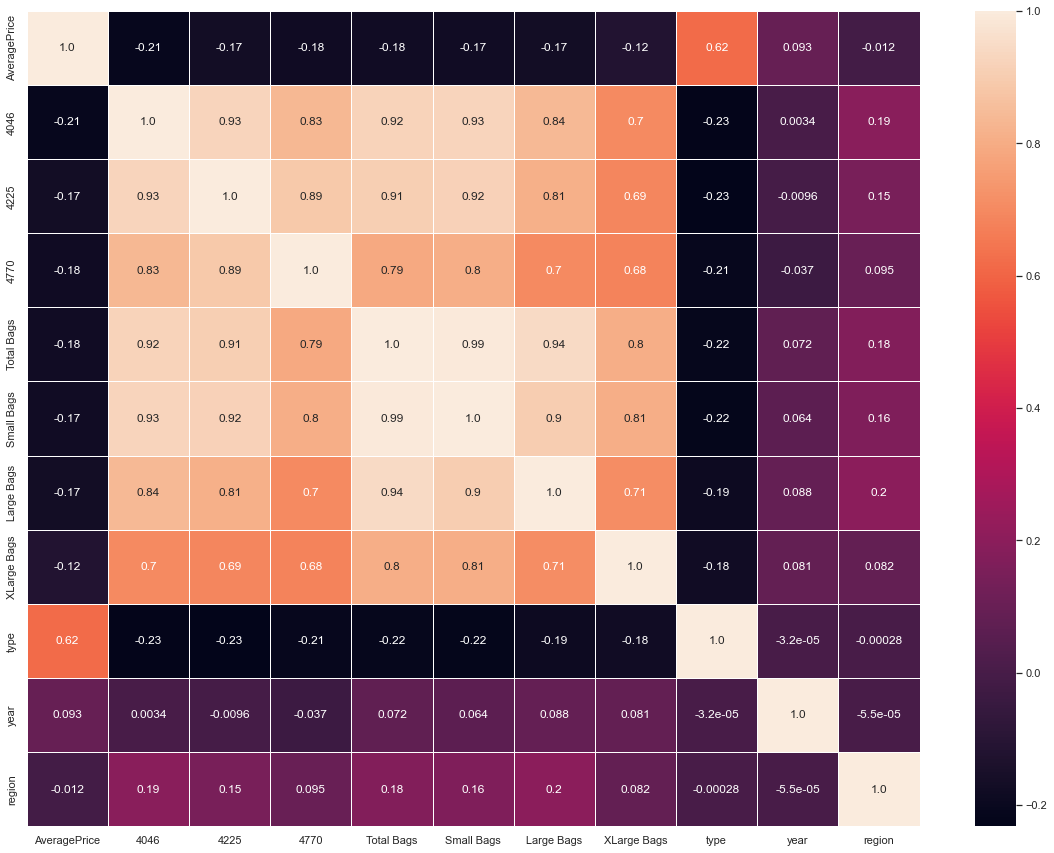

In [98]:
plt.figure(figsize =  (20,15))
sns.heatmap(cor,annot = True,linewidth = 0.5 ,linecolor = "white", fmt ='0.2')

In [99]:
for a in range(len(data_1.corr().columns)):
    for b in range(a):
        if (data_1.corr().iloc[a,b]) >0.7:
            name = data_1.corr().columns[a]
            print(name)

4225
4770
4770
Total Bags
Total Bags
Total Bags
Small Bags
Small Bags
Small Bags
Small Bags
Large Bags
Large Bags
Large Bags
Large Bags
XLarge Bags
XLarge Bags
XLarge Bags


In [113]:
x = data_1.drop(["region","Date"],axis = 1)

In [114]:
y = data_1["region"]

In [115]:
from statsmodels.stats.outliers_influence  import variance_inflation_factor

In [116]:
def calc_vif(x):
    vif= pd.DataFrame()
    vif["variables"] = x.columns
    vif["VIF"] = [variance_inflation_factor(x.values,i) for i in range(x.shape[1])]

    return(vif)

In [117]:
calc_vif(x)

,variables,VIF
0,AveragePrice,2.192435e+01
1,4046,1.060380e+01
2,4225,1.428329e+01
3,4770,5.612179e+00
4,Total Bags,2.502000e+14
5,Small Bags,1.429714e+14
6,Large Bags,1.521486e+13
7,XLarge Bags,7.855435e+10
8,type,3.336324e+00
9,year,1.617334e+01


In [118]:
data_1

,Date,AveragePrice,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0.0,2015,0.0
1,2015-12-20,1.35,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0.0,2015,0.0
2,2015-12-13,0.93,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0.0,2015,0.0
3,2015-12-06,1.08,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0.0,2015,0.0
4,2015-11-29,1.28,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0.0,2015,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2018-02-04,1.63,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1.0,2018,53.0
18245,2018-01-28,1.71,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1.0,2018,53.0
18246,2018-01-21,1.87,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1.0,2018,53.0
18247,2018-01-14,1.93,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1.0,2018,53.0


In [119]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          18249 non-null  datetime64[ns]
 1   AveragePrice  18249 non-null  float64       
 2   Total Volume  18249 non-null  float64       
 3   4046          18249 non-null  float64       
 4   4225          18249 non-null  float64       
 5   4770          18249 non-null  float64       
 6   Total Bags    18249 non-null  float64       
 7   Small Bags    18249 non-null  float64       
 8   Large Bags    18249 non-null  float64       
 9   XLarge Bags   18249 non-null  float64       
 10  type          18249 non-null  float64       
 11  year          18249 non-null  int64         
 12  region        18249 non-null  float64       
dtypes: datetime64[ns](1), float64(11), int64(1)
memory usage: 1.8 MB


# skewness check 

In [120]:
data.skew()

AveragePrice     0.580303
Total Volume     9.007687
4046             8.648220
4225             8.942466
4770            10.159396
Total Bags       9.756072
Small Bags       9.540660
Large Bags       9.796455
XLarge Bags     13.139751
type             0.000329
year             0.215339
region           0.000030
dtype: float64

In [121]:
from sklearn.preprocessing import  power_transform
data_1["4770"] =  power_transform(data_1["4770"].array.reshape(-1, 1),method = 'yeo-johnson')

In [122]:
data_1["4225"] =  power_transform(data_1["4225"].array.reshape(-1, 1),method = 'yeo-johnson')

In [123]:
data_1["4046"] =  power_transform(data_1["4046"].array.reshape(-1, 1),method = 'yeo-johnson')

In [124]:
data_1["XLarge Bags"] =  power_transform(data_1["XLarge Bags"].array.reshape(-1, 1),method = 'yeo-johnson')

In [126]:
data_1["Total Bags"] =  power_transform(data_1["Total Bags"].array.reshape(-1, 1),method = 'yeo-johnson')

In [127]:
data_1["Small Bags"] =  power_transform(data_1["Small Bags"].array.reshape(-1, 1),method = 'yeo-johnson')

In [128]:
data_1["Large Bags"] =  power_transform(data_1["Large Bags"].array.reshape(-1, 1),method = 'yeo-johnson')

In [129]:
data_1.skew()

AveragePrice    0.580303
4046           -0.022679
4225           -0.017740
4770            0.032184
Total Bags     -0.001626
Small Bags      0.007058
Large Bags     -0.073809
XLarge Bags     0.793520
type            0.000329
year            0.215339
region          0.000030
dtype: float64

# skewness has been  checked and  cleared 

#  checking for outliers in data 

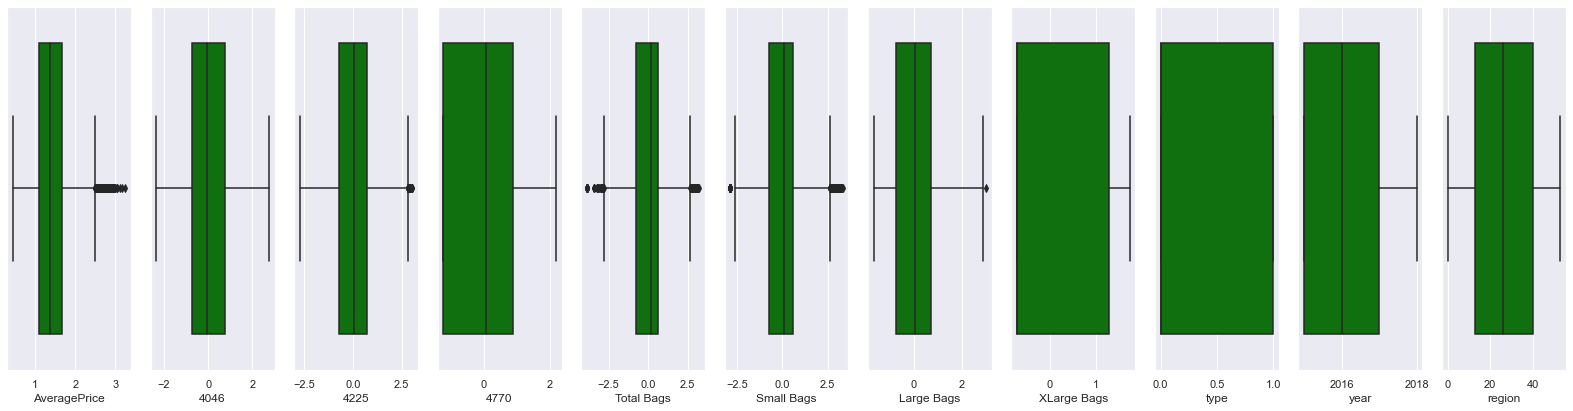

In [133]:
column = data_1.drop(["Date"],axis = 1).columns.values
ncol = 12
nrows = 158
plt.figure(figsize = (2*ncol,75*ncol))
for i in range ( 0 ,len(column)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(data_1[column[i]],color ="green",orient = "h")    
    plt.tight_layout()

In [142]:
from scipy.stats import zscore
import numpy as np
z = np.abs(zscore(data_1.drop(["Date"],axis = 1)))
data_1.shape

(18249, 12)

In [143]:
threshold = 3
print(np.where(z>3))

(array([ 2699,  5462,  5475,  5476,  5477,  5478,  5479,  5480,  5481,
        5482,  5483,  5484,  5485,  5486,  5487,  5488,  5489,  5490,
        5491,  5492,  5493,  5494,  5495,  5496,  5497,  5506,  5506,
        8319,  8322,  8344,  8344,  8345,  8345,  8346,  8346,  8347,
        8347,  8348,  8348,  8349,  8349,  8350,  8351,  8352,  8352,
        8353,  8353,  8354,  8354,  8355,  8356,  8357,  8358,  8359,
        8360,  8361,  8362,  8363,  8364,  8365,  8365,  8366,  8366,
        8366,  8367,  8367,  8368,  8369,  8370,  8371,  9090,  9090,
        9091,  9091,  9092,  9092,  9093,  9093,  9094,  9094,  9095,
        9096,  9096,  9097,  9097,  9097,  9097,  9098,  9098,  9099,
        9099,  9100,  9101,  9212,  9894, 11024, 11320, 11320, 11321,
       11321, 11322, 11323, 11324, 11325, 11325, 11326, 11326, 11327,
       11328, 11329, 11330, 11331, 11332, 11332, 11333, 11336, 11338,
       11340, 11342, 11347, 11348, 11349, 11350, 11354, 11387, 11388,
       11594, 11595

In [144]:
len(np.where(z>3)[0])

253

In [145]:
df = data_1[(z<3).all(axis=1)]

In [146]:
df.shape

(18026, 12)

In [147]:
df

,Date,AveragePrice,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,-0.658619,0.307313,-0.247250,-0.524004,-0.340627,-0.773351,-0.699849,0.0,2015,0.0
1,2015-12-20,1.35,-0.776870,0.231647,-0.201041,-0.485890,-0.306425,-0.763435,-0.699849,0.0,2015,0.0
2,2015-12-13,0.93,-0.731947,0.579503,-0.007072,-0.552018,-0.366303,-0.750820,-0.699849,0.0,2015,0.0
3,2015-12-06,1.08,-0.634200,0.415100,-0.148322,-0.695449,-0.496853,-0.691865,-0.699849,0.0,2015,0.0
4,2015-11-29,1.28,-0.685293,0.224806,-0.137918,-0.669157,-0.477201,-0.600975,-0.699849,0.0,2015,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2018-02-04,1.63,-0.467366,-0.919470,-1.238310,-0.334466,-0.178839,-0.410859,-0.699849,1.0,2018,53.0
18245,2018-01-28,1.71,-0.619883,-0.665372,-1.238310,-0.496897,-0.325977,-0.481465,-0.699849,1.0,2018,53.0
18246,2018-01-21,1.87,-0.619831,-0.772496,0.401546,-0.490952,-0.308728,-0.943486,-0.699849,1.0,2018,53.0
18247,2018-01-14,1.93,-0.550282,-0.710543,0.401246,-0.424252,-0.248932,-0.908510,-0.699849,1.0,2018,53.0


# separating x / input and y / output data

In [291]:
x = df.drop(["region","Date","XLarge Bags"], axis = 1)

In [292]:
y = df["region"]

In [293]:
x

,AveragePrice,4046,4225,4770,Total Bags,Small Bags,Large Bags,type,year,Month,Day
0,1.33,-0.658619,0.307313,-0.247250,-0.524004,-0.340627,-0.773351,0.0,2015,12,27
1,1.35,-0.776870,0.231647,-0.201041,-0.485890,-0.306425,-0.763435,0.0,2015,12,20
2,0.93,-0.731947,0.579503,-0.007072,-0.552018,-0.366303,-0.750820,0.0,2015,12,13
3,1.08,-0.634200,0.415100,-0.148322,-0.695449,-0.496853,-0.691865,0.0,2015,12,6
4,1.28,-0.685293,0.224806,-0.137918,-0.669157,-0.477201,-0.600975,0.0,2015,11,29
...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,-0.467366,-0.919470,-1.238310,-0.334466,-0.178839,-0.410859,1.0,2018,2,4
18245,1.71,-0.619883,-0.665372,-1.238310,-0.496897,-0.325977,-0.481465,1.0,2018,1,28
18246,1.87,-0.619831,-0.772496,0.401546,-0.490952,-0.308728,-0.943486,1.0,2018,1,21
18247,1.93,-0.550282,-0.710543,0.401246,-0.424252,-0.248932,-0.908510,1.0,2018,1,14


In [294]:
y

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
18244    53.0
18245    53.0
18246    53.0
18247    53.0
18248    53.0
Name: region, Length: 18026, dtype: float64

 # scaling data

In [295]:
df['Month']=df['Date'].apply(lambda x:x.month)
df['Day']=df['Date'].apply(lambda x:x.day)

In [296]:

from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler ()
x = mms.fit_transform(x) 

# splitting data for tesing and training 

In [299]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score
from sklearn.model_selection  import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
import warnings
warnings.filterwarnings("ignore")

In [300]:
from sklearn.model_selection import  train_test_split
RFC =  RandomForestClassifier()

In [301]:
for i in range (0,100):
    x_train,x_test,y_train,y_test = train_test_split( x , y , random_state = i , test_size = .30)
    RFC.fit(x_train,y_train)
    pred_train = RFC.predict(x_train)
    pred_test = RFC.predict(x_test)
    print("at random state",i,"model preforms best")
    print("at random_state =  " ,i)
    print("training score at" ,i, "is " ,accuracy_score(y_train, pred_train)*100)
    print(" testing  score is " ,i, "is" , accuracy_score(y_test, pred_test)*100,"\n")


at random state 0 model preforms best
at random_state =   0
training score at 0 is  100.0
 testing  score is  0 is 90.625 

at random state 1 model preforms best
at random_state =   1
training score at 1 is  100.0
 testing  score is  1 is 90.31065088757396 

at random state 2 model preforms best
at random_state =   2
training score at 2 is  100.0
 testing  score is  2 is 91.27218934911244 

at random state 3 model preforms best
at random_state =   3
training score at 3 is  100.0
 testing  score is  3 is 90.51405325443787 

at random state 4 model preforms best
at random_state =   4
training score at 4 is  100.0
 testing  score is  4 is 90.38461538461539 

at random state 5 model preforms best
at random_state =   5
training score at 5 is  100.0
 testing  score is  5 is 90.51405325443787 

at random state 6 model preforms best
at random_state =   6
training score at 6 is  100.0
 testing  score is  6 is 90.69896449704143 

at random state 7 model preforms best
at random_state =   7
traini

at random state 60 model preforms best
at random_state =   60
training score at 60 is  100.0
 testing  score is  60 is 90.47707100591717 

at random state 61 model preforms best
at random_state =   61
training score at 61 is  100.0
 testing  score is  61 is 90.4585798816568 

at random state 62 model preforms best
at random_state =   62
training score at 62 is  100.0
 testing  score is  62 is 90.53254437869822 

at random state 63 model preforms best
at random_state =   63
training score at 63 is  100.0
 testing  score is  63 is 89.8853550295858 

at random state 64 model preforms best
at random_state =   64
training score at 64 is  100.0
 testing  score is  64 is 90.47707100591717 

at random state 65 model preforms best
at random_state =   65
training score at 65 is  100.0
 testing  score is  65 is 91.10576923076923 

at random state 66 model preforms best
at random_state =   66
training score at 66 is  100.0
 testing  score is  66 is 90.9578402366864 

at random state 67 model prefo

In [303]:
x_train,x_test,y_train,y_test = train_test_split(x,y ,random_state = 7,test_size = .30)

In [307]:
RFC.fit(x_train,y_train)
pred_train = RFC.predict(x_train)

In [310]:
from  sklearn.model_selection import cross_val_score
from  sklearn.model_selection import  KFold
pred_test = RFC.predict(x_test)
ls = accuracy_score(y_test, pred_test)
ls

0.9105029585798816

In [311]:
for j in range(2,15):
    ls_score = cross_val_score(RFC,x,y,cv = j)
    lsc =  ls_score.mean()
    print("at cv :" , j)
    print("cross validation score is :" , lsc*100)
    print("accuracy is  = ", ls *100)
    print("\n")

at cv : 2
cross validation score is : 6.7735493176522805
accuracy is  =  91.05029585798816


at cv : 3
cross validation score is : 54.870119366002044
accuracy is  =  91.05029585798816


at cv : 4
cross validation score is : 63.32435632257598
accuracy is  =  91.05029585798816


at cv : 5
cross validation score is : 68.17958049575257
accuracy is  =  91.05029585798816


at cv : 6
cross validation score is : 68.98327465763896
accuracy is  =  91.05029585798816


at cv : 7
cross validation score is : 76.42847666715484
accuracy is  =  91.05029585798816


at cv : 8
cross validation score is : 76.9215309292825
accuracy is  =  91.05029585798816


at cv : 9
cross validation score is : 76.67784869482324
accuracy is  =  91.05029585798816


at cv : 10
cross validation score is : 77.37566812742112
accuracy is  =  91.05029585798816


at cv : 11
cross validation score is : 79.20683478950714
accuracy is  =  91.05029585798816


at cv : 12
cross validation score is : 79.39041284201829
accuracy is  =  91.0

In [323]:
cross_val = cross_val_score(RFC,x,y,cv = 14).mean()
cross_val

0.9373116962402677

In [203]:
classifiers = []
model0 = LogisticRegression()
classifiers.append(model0)

model1 = KNeighborsClassifier()
classifiers.append(model1)
model2 = SVC()
classifiers.append(model2)

model4 = RandomForestClassifier()
classifiers.append(model4)

In [204]:
results = []
names = []
for clf in classifiers:
    clf.fit(x_train, y_train)
    y_pred= clf.predict(x_test)
    acc = accuracy_score(y_test, y_pred)
    print("Accuracy of %s is %s"%(clf, acc))
   
    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix of %s is %s"%(clf, cm))

Accuracy of LogisticRegression() is 0.3985024958402662
Confusion Matrix of LogisticRegression() is [[30  0  0 ...  0  0  0]
 [ 0 35  0 ...  0  0  0]
 [ 0  0 35 ...  0  0  0]
 ...
 [ 0  0  0 ... 57  0  0]
 [ 0  0  0 ...  0 55  0]
 [ 0  2  0 ...  0  0  2]]
Accuracy of KNeighborsClassifier() is 0.4617304492512479
Confusion Matrix of KNeighborsClassifier() is [[45  0  0 ...  0  0  0]
 [ 0 32  0 ...  0  0  1]
 [ 0  0 52 ...  0  0  1]
 ...
 [ 0  0  0 ... 57  0  0]
 [ 0  0  0 ...  0 43  0]
 [ 0  1  0 ...  0  0 16]]
Accuracy of SVC() is 0.7124237382140877
Confusion Matrix of SVC() is [[58  0  0 ...  0  0  0]
 [ 0 39  0 ...  0  0  3]
 [ 0  0 61 ...  0  0  0]
 ...
 [ 0  0  0 ... 57  0  0]
 [ 0  0  0 ...  0 58  0]
 [ 0  1  0 ...  0  0 31]]
Accuracy of RandomForestClassifier() is 0.9132002218524681
Confusion Matrix of RandomForestClassifier() is [[64  0  0 ...  0  0  0]
 [ 0 58  0 ...  0  0  3]
 [ 0  0 67 ...  0  0  0]
 ...
 [ 0  0  0 ... 57  0  0]
 [ 0  0  0 ...  0 59  0]
 [ 0  0  0 ...  0  0 42]

In [228]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
 
from sklearn import model_selection
from sklearn.utils import class_weight
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import numpy as np
import pandas as pd
def run_exps(x_train: pd.DataFrame , y_train: pd.DataFrame, x_test: pd.DataFrame, y_test: pd.DataFrame) -> pd.DataFrame:

    dfs = []
    models = [
          ('LogReg', LogisticRegression()), 
          ('RF', RandomForestClassifier()),
          ('KNN', KNeighborsClassifier()),
          ('SVM', SVC()), 
          
        ]
results = []
names = []
scoring = ['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted', 'roc_auc']
target_names = ['malignant', 'benign']
for name, model in models:
        kfold = model_selection.KFold(n_splits=5, shuffle=True, random_state=90210 ,)
        cv_results = model_selection.cross_validate(model, x_train, y_train, cv=kfold, scoring=scoring)
        clf = model.fit(x_train, y_train)
        y_pred = clf.predict(x_test)
        print(name)
        print(classification_report(y_test, y_pred))



LogReg
              precision    recall  f1-score   support

         0.0       0.38      0.52      0.44        97
         1.0       0.16      0.50      0.24        90
         2.0       0.43      0.41      0.42       106
         3.0       0.49      0.40      0.44       111
         4.0       0.33      0.37      0.35       106
         5.0       0.54      0.35      0.42        95
         6.0       0.58      0.82      0.68        98
         7.0       0.33      0.69      0.44        89
         8.0       0.46      0.42      0.44       107
         9.0       0.33      0.67      0.44       100
        10.0       0.26      0.08      0.13       108
        11.0       0.31      0.60      0.41        85
        12.0       0.30      0.54      0.39       105
        13.0       0.00      0.00      0.00       100
        14.0       0.59      0.26      0.36        91
        15.0       0.49      0.47      0.48       107
        16.0       0.58      0.34      0.43        98
        17.0       0

SVM
              precision    recall  f1-score   support

         0.0       0.56      0.93      0.70        97
         1.0       0.33      0.57      0.42        90
         2.0       0.86      0.87      0.86       106
         3.0       0.70      0.55      0.62       111
         4.0       0.89      0.71      0.79       106
         5.0       0.73      0.63      0.68        95
         6.0       0.94      0.95      0.94        98
         7.0       0.68      0.83      0.75        89
         8.0       0.93      0.99      0.96       107
         9.0       0.49      0.78      0.60       100
        10.0       0.42      0.51      0.46       108
        11.0       0.57      0.93      0.71        85
        12.0       0.80      0.94      0.86       105
        13.0       0.62      0.38      0.47       100
        14.0       0.81      0.79      0.80        91
        15.0       0.95      0.86      0.90       107
        16.0       0.91      0.86      0.88        98
        17.0       0.87

 #  ROC _ AUC curve

In [315]:
from sklearn.metrics  import roc_curve,auc

In [316]:
y_precict_proba = ln.predict_proba(x_test)[:,1]

In [317]:
fpr , tpr , threshold = roc_curve(y_test,y_precict_proba , pos_label = 1)

In [318]:
roc_auc  =  auc(fpr,tpr)

In [319]:
roc_auc

0.9989831322211404

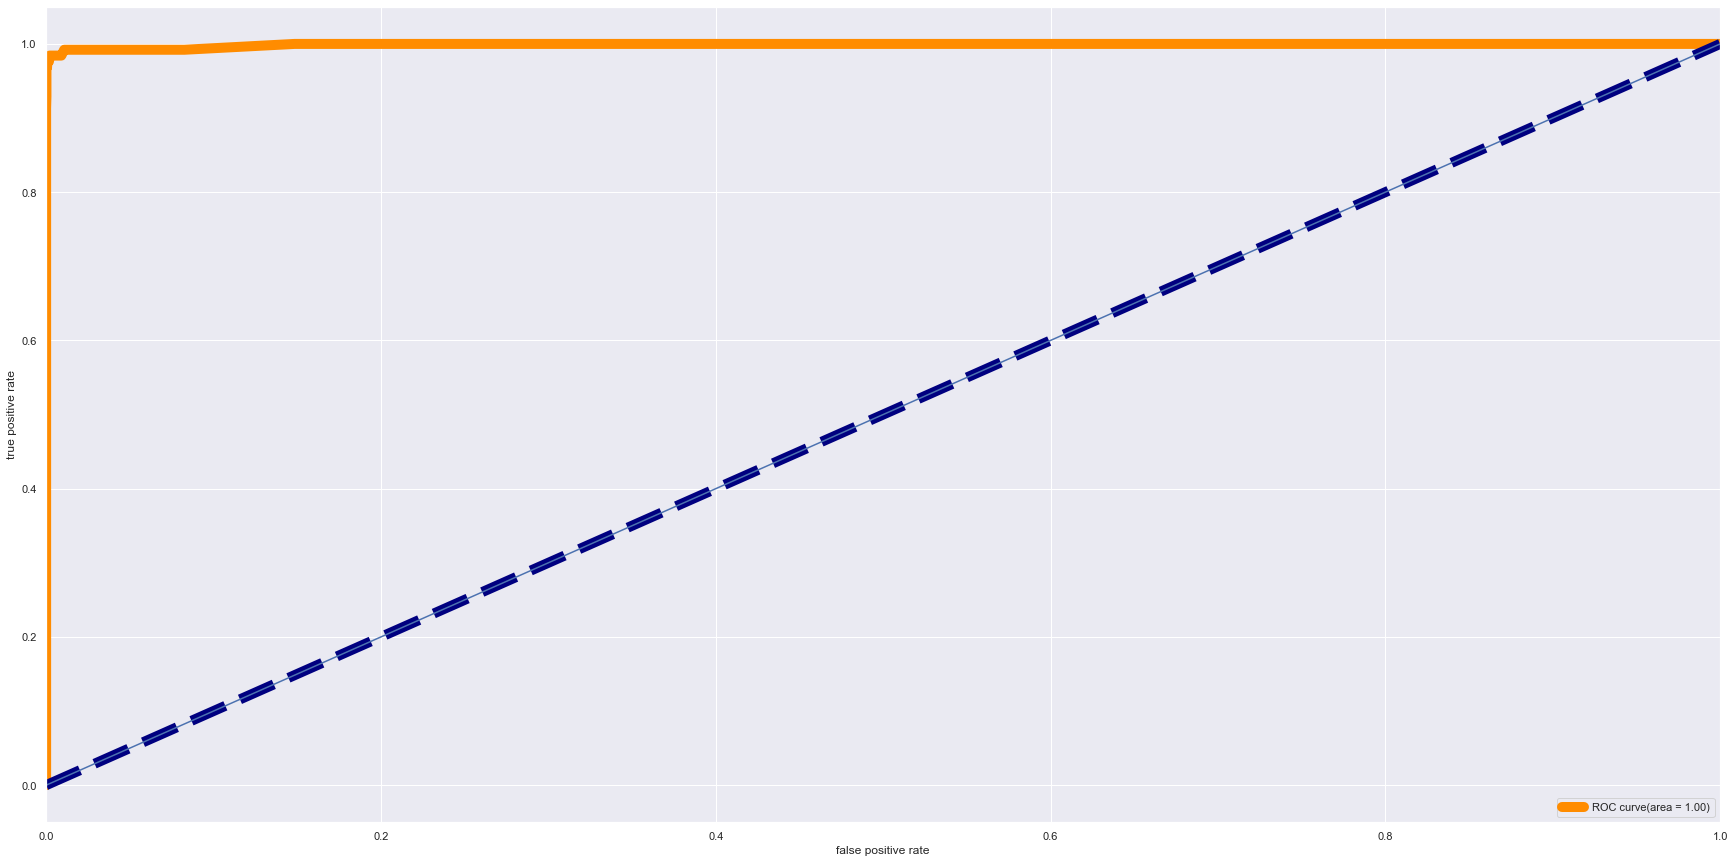

In [322]:
plt.figure()
plt.plot(fpr,tpr,color ="darkorange",lw = 10, label = "ROC curve(area = %0.2f)"%roc_auc)
plt.plot([0,1],[0,1]  , color = "navy" , lw = 10 ,  linestyle = "--" )
plt.xlim ([0.0 ,1.0] )
plt.plot([0.0 , 1.0])
plt.xlabel("false positive rate" )
plt.ylabel("true positive rate" )

plt.legend(loc="lower right")


plt.show()

# random forest  classifier is the best fit model which is giving accuracy  of  0.9105029585798816

# saving model

In [324]:
import joblib

In [327]:
joblib.dump(RFC,"Avocado.obj")

['Avocado.obj']

In [328]:
RFC_from_joblib = joblib.load("Avocado.obj")

In [329]:
RFC_from_joblib.predict(x_test)

array([14., 26., 45., ..., 12., 43.,  9.])

# regression analysis 

In [338]:
x = df.drop(["AveragePrice","Date","region"] , axis = 1 )

In [339]:
y =  df["AveragePrice"]

In [340]:
x

,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,Month,Day
0,-0.658619,0.307313,-0.247250,-0.524004,-0.340627,-0.773351,-0.699849,0.0,2015,12,27
1,-0.776870,0.231647,-0.201041,-0.485890,-0.306425,-0.763435,-0.699849,0.0,2015,12,20
2,-0.731947,0.579503,-0.007072,-0.552018,-0.366303,-0.750820,-0.699849,0.0,2015,12,13
3,-0.634200,0.415100,-0.148322,-0.695449,-0.496853,-0.691865,-0.699849,0.0,2015,12,6
4,-0.685293,0.224806,-0.137918,-0.669157,-0.477201,-0.600975,-0.699849,0.0,2015,11,29
...,...,...,...,...,...,...,...,...,...,...,...
18244,-0.467366,-0.919470,-1.238310,-0.334466,-0.178839,-0.410859,-0.699849,1.0,2018,2,4
18245,-0.619883,-0.665372,-1.238310,-0.496897,-0.325977,-0.481465,-0.699849,1.0,2018,1,28
18246,-0.619831,-0.772496,0.401546,-0.490952,-0.308728,-0.943486,-0.699849,1.0,2018,1,21
18247,-0.550282,-0.710543,0.401246,-0.424252,-0.248932,-0.908510,-0.699849,1.0,2018,1,14


In [341]:

from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler ()
x = mms.fit_transform(x) 

In [342]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import  train_test_split
from sklearn.metrics  import    mean_absolute_error,mean_squared_error
from sklearn.metrics import r2_score

In [343]:
ln = LinearRegression()
ln

LinearRegression()

In [344]:
for i in range (0,100):
    x_train,x_test,y_train,y_test = train_test_split( x , y , random_state = i , test_size = .20)
    ln.fit(x_train,y_train)
    pred_train = ln.predict(x_train)
    pred_test = ln.predict(x_test)
    print("at random state",i,"model preforms best")
    print("at random_state =  " ,i)
    print("training score at" ,i, "is " ,r2_score(y_train, pred_train)*100)
    print(" testing  score is " ,i, "is" , r2_score(y_test, pred_test)*100,"\n")


at random state 0 model preforms best
at random_state =   0
training score at 0 is  56.268885325794635
 testing  score is  0 is 54.295636081915724 

at random state 1 model preforms best
at random_state =   1
training score at 1 is  55.766652237871426
 testing  score is  1 is 56.24524724571434 

at random state 2 model preforms best
at random_state =   2
training score at 2 is  56.31489049716492
 testing  score is  2 is 54.10858487961352 

at random state 3 model preforms best
at random_state =   3
training score at 3 is  56.10175570224091
 testing  score is  3 is 54.95247528222518 

at random state 4 model preforms best
at random_state =   4
training score at 4 is  55.6411641619573
 testing  score is  4 is 56.72821500236268 

at random state 5 model preforms best
at random_state =   5
training score at 5 is  56.05935195575229
 testing  score is  5 is 55.12704535555809 

at random state 6 model preforms best
at random_state =   6
training score at 6 is  55.76891834207374
 testing  scor

training score at 56 is  55.934258940202334
 testing  score is  56 is 55.60659721098221 

at random state 57 model preforms best
at random_state =   57
training score at 57 is  56.10873472445576
 testing  score is  57 is 54.92825099137677 

at random state 58 model preforms best
at random_state =   58
training score at 58 is  55.89683401174111
 testing  score is  58 is 55.78445478646147 

at random state 59 model preforms best
at random_state =   59
training score at 59 is  55.96993512210442
 testing  score is  59 is 55.48685785835929 

at random state 60 model preforms best
at random_state =   60
training score at 60 is  55.337138397058474
 testing  score is  60 is 57.80005157569905 

at random state 61 model preforms best
at random_state =   61
training score at 61 is  55.86994409671606
 testing  score is  61 is 55.88854257941639 

at random state 62 model preforms best
at random_state =   62
training score at 62 is  55.30914786065488
 testing  score is  62 is 57.96327322721297 

at 

In [351]:
x_train,x_test,y_train,y_test = train_test_split(x,y ,random_state = 36,test_size = .20)

In [352]:
ln.fit(x_train,y_train)

LinearRegression()

In [353]:
pred_train = ln.predict(x_train)

In [354]:
pred_test = ln.predict(x_test)

In [355]:
lss =r2_score(y_test, pred_test)

In [356]:
print('R2 score is ',lss)

R2 score is  0.5607146125236265


In [357]:
from  sklearn.model_selection import cross_val_score
from  sklearn.model_selection import  KFold


In [359]:
pred_train = ln.predict(x_train)
pred_test = ln.predict(x_test)

In [361]:
kn = KFold(5,shuffle = True)
for j in range(2,10):
    ls_score = (cross_val_score(ln,x,y,cv = kn))
    lsc =  ls_score.mean()
    print("at cv :" , j)
    print("cross validation score is :" , lsc*100)
    print("r 2 score = ", lss *100)
    print("\n")

at cv : 2
cross validation score is : 55.7963461529629
r 2 score =  56.07146125236265


at cv : 3
cross validation score is : 55.81773735184269
r 2 score =  56.07146125236265


at cv : 4
cross validation score is : 55.74134359216654
r 2 score =  56.07146125236265


at cv : 5
cross validation score is : 55.797281618589444
r 2 score =  56.07146125236265


at cv : 6
cross validation score is : 55.81533281999194
r 2 score =  56.07146125236265


at cv : 7
cross validation score is : 55.80634689383655
r 2 score =  56.07146125236265


at cv : 8
cross validation score is : 55.7793506138197
r 2 score =  56.07146125236265


at cv : 9
cross validation score is : 55.769227121126264
r 2 score =  56.07146125236265




In [374]:
kn = KFold(5 , shuffle = True)
l = cross_val_score(ln,x,y,cv = kn)
cros_val_score = l.mean()

In [375]:
cros_val_score

0.5576358923983218

Text(0.5, 1.0, 'linear regression')

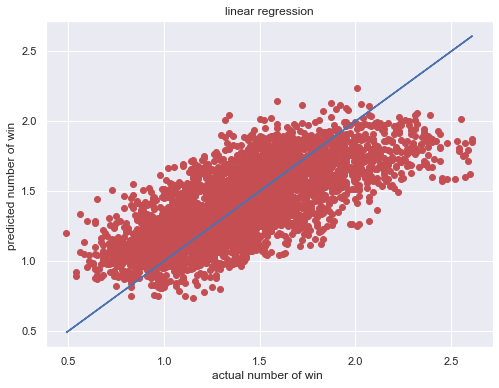

In [376]:
plt.figure(figsize = (8,6))
plt.scatter( x =  y_test , y  = pred_test , color = "r")
plt.plot(y_test, y_test , color = "b")
plt.xlabel("actual number of win ")
plt.ylabel("predicted number of win ")
plt.title("linear regression")

# regularization 

In [377]:

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import  Ridge

In [378]:
parameters = { "alpha" :[0.0001,0.001,0.01,0.1,1,10], "random_state" : list(range(0,10))}
ls = Lasso()
cls =   GridSearchCV(ls,parameters)
cls. fit(x_train,y_train)
cls.best_params_

{'alpha': 0.0001, 'random_state': 0}

In [384]:
ls = Lasso(alpha = 0.0001, random_state = 0)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)
pred_ls =  ls.predict(x_test)
lss = r2_score(y_test,pred_ls)
lss

0.5604110925877561

In [388]:
kn = KFold(5 , shuffle = True)
l = cross_val_score(ls,x,y,cv = kn)
cros_val_score = l.mean()

In [395]:
cros_val_score

0.5578165560857965

In [390]:
parameters = { "alpha" :[0.0001,0.001,0.01,0.1,1,10], "random_state" : list(range(0,10))}
Rg =  Ridge()
cls =   GridSearchCV(ls,parameters)
cls. fit(x_train,y_train)
cls.best_params_

{'alpha': 0.0001, 'random_state': 0}

In [392]:
Rg = Ridge(alpha = 0.0001, random_state = 0)
Rg.fit(x_train,y_train)
Rg.score(x_train,y_train)
pred_ls =  Rg.predict(x_test)
lss = r2_score(y_test,pred_ls)
lss

0.5607146008243913

In [394]:
kn = KFold(5 , shuffle = True)
l = cross_val_score(Rg,x,y,cv = kn)
cros_val_score = l.mean()

In [396]:
cros_val_score

0.5578165560857965

# saving model 

In [397]:
import joblib

In [400]:
joblib.dump(ln,"Avocado.obj")

['Avocado.obj']

In [401]:
ln_fromj_oblib = joblib.load("Avocado.obj")

In [402]:
ln_fromj_oblib.predict(x_test)

array([1.7659296 , 1.11948776, 1.08928314, ..., 1.68141192, 1.72766772,
       1.51829682])